<a href="https://colab.research.google.com/github/AnkanaSonowal/Opinion-Based-Community-Detection-in-Online-Social-Networks/blob/main/KMEANSandDBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.cluster import DBSCAN 
import math
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

#IF UPLOADING DATASET FROM GOOGLE DRIVE

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
 id = '118-9VDRYtms5g-eWw1SX4R6wBw4FVVEf'
print (id) # Verify that you have everything after '='

118-9VDRYtms5g-eWw1SX4R6wBw4FVVEf


#UPLOAD DATASET ALL PARAMETERS IN finalValuesUpdated.csv

In [ ]:
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('finalValuesUpdated.csv')  
my_data = pd.read_csv('finalValuesUpdated.csv',index_col=0)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
my_data.head(10)

user_id  initial_opinion  ...      bias  convincing_power_changed
0  3610511         0.192474  ...  0.928372                  0.747510
1  5656162         0.043894  ...  0.071074                  0.239313
2  5682702        -0.013099  ...  0.138611                  0.130166
3  6015122         0.321966  ...  0.345125                  0.176563
4  6067292        -0.022954  ...  0.256579                  0.838597
5  6134312         0.367970  ...  0.505754                  0.064320
6  6140012         0.032493  ...  0.126480                  0.815821
7  6684602         0.318297  ...  0.342607                  0.225524
8  7046912         0.216096  ...  0.284009                  0.990509
9  8072492         0.194265  ...  0.048864                  0.215302

[10 rows x 6 columns]

In [ ]:
bs=my_data['bias']
v=my_data['convincing_power_changed']

In [ ]:
w1=[]
for i in range(len(my_data)):
  w1.append(my_data['initial_opinion'][i])

#NOW DETECT COMMUNITIES USING  DBSCAN IN DIFFERENCE MODEL 
#CODE STARTS  RUN EVERY CELL SERIALLY**

In [ ]:
def dbscan(X, eps, min_samples):
   
    db_default = DBSCAN(eps = 0.0375, min_samples = 4).fit(X) 
    # print(type(db_default))
    labels = db_default.labels_ 
    core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool) 
    core_samples_mask[db_default.core_sample_indices_] = True
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
  
    
    unique_labels = set(labels) 
    colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
   

    plt.figure(figsize =(20, 5)) 
    plt.rc('xtick',labelsize=15,color='black')
    plt.rc('ytick',labelsize=15,color='black')
    
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.xlabel('Updated Opinion',fontsize=20,color='red')
    # plt.ylabel('Updated Opinion',fontsize=20,color='orange')
    plt.grid(True)
    for k, col in zip(unique_labels, colors): 
          if k == -1: 
              # Black used for noise. 
              col = [0, 0, 0, 1]
        
          class_member_mask = (labels == k) 
          # print(type(X))
          xy = X[class_member_mask & core_samples_mask] 
          # print(xy)
          plt.plot(xy.iloc[:, 0], len(xy)*[0], 'o', markerfacecolor=col,markersize=6) 
        
          xy = X[class_member_mask & ~core_samples_mask] 
          # dataset.iloc[:,:-1].values
          plt.plot(xy.iloc[:, 0],len(xy)*[0], 'o', markerfacecolor=col,markersize=6)
    
    plt.title('number of clusters: %d' %n_clusters_,fontsize=20,color='red') 
    plt.show() 
    print('Silhouette Co-efficient: %0.3f' %metrics.silhouette_score(X,labels))

In [ ]:
opinion=w1[:]
bias=bs[:]
convin=v[:]

In [ ]:
print(opinion) #must be same as w1[] check

[0.192473822, 0.043894036, -0.013099236, 0.321965538, -0.022953515, 0.36797032, 0.03249269, 0.31829728399999996, 0.21609568399999998, 0.19426516100000002, 0.33768462200000005, 0.025069112999999997, 0.472983957, 0.134556984, 0.276018991, 0.141037791, 0.206367711, 0.271908394, 0.48705149600000003, 0.308199245, 0.136033504, 0.094091044, -0.28515718, -0.045097411, -0.0038569359999999996, 0.062066592999999996, 0.25622608, 0.160526327, -0.06604927599999999, -0.8365, 0.142333238, 0.227136735, 0.079523024, 0.07978104, 0.194576, 0.098898901, 0.147287644, -0.06468774599999999, 0.051753923, 0.115078094, 0.115078094, 0.112742636, 0.25810604800000003, 0.227528605, -0.015328372, 0.228495027, 0.217712475, 0.048540384000000006, 0.278606712, 0.05338163, 0.281246079, 0.253457696, 0.38175578600000004, 0.24559457699999998, 0.083227722, 0.32965760899999996, 0.08901656599999999, 0.056611863, 0.189087662, 0.55801628, -0.041121436000000004, 0.275051609, 0.365664228, 0.269104092, 0.242005215, 0.275159283000000

In [ ]:
idarr=[]
for i in range (0,484):
  idarr.append(i+1)

# updated opinion in w2 = [ ]
# Formula with Opinion Difference opinion(-1,1) convin(0,1) bias(0,1)
# user id VS opinion in iteration x

old_color=None stores cluster color in prev iteration

new_color=None stores cluster color in current iteration

after every iteration old_color = new_color

colorOur=[] stores percentage of users changing cluster

ss=[] stores silhouette score after every iteration 

iteration  0
scale of w2:  [ -0.7887266554219914 , 0.771704137787773 ]


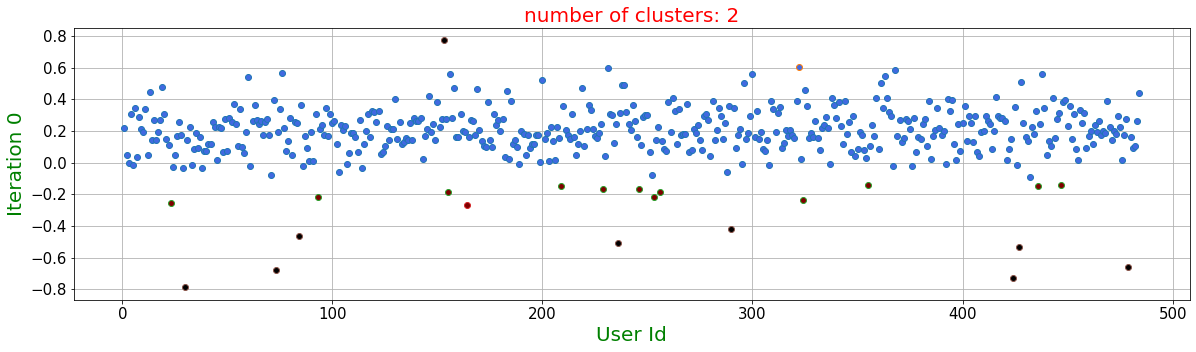

Silhouette Co-efficient:  0.592
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 62.1900826446281 %
----------------------------------------------------------
484
iteration  1
scale of w2:  [ -0.7432438913386514 , 0.6626263976533107 ]


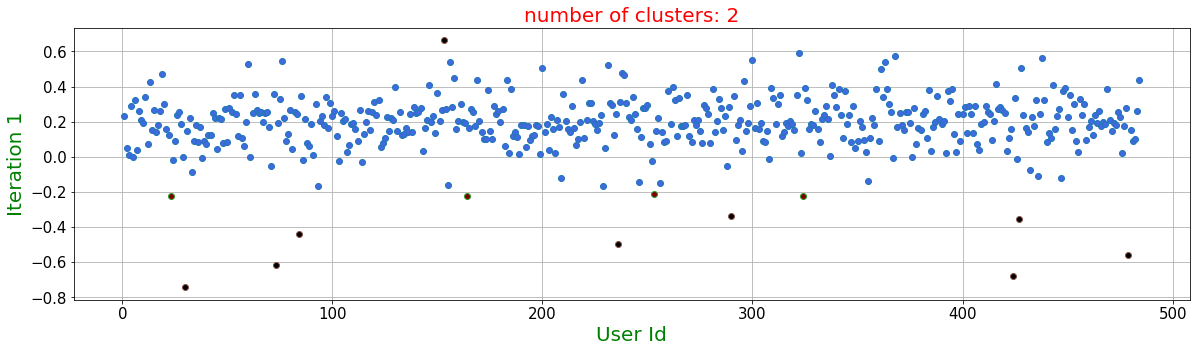

Silhouette Co-efficient:  0.614
No of users changing color :  9
Percentage of users changing color :  1.859504132231405
----------------------------------------------------------


percentage difference: 60.537190082644635 %
----------------------------------------------------------
484
iteration  2
scale of w2:  [ -0.6999250205035682 , 0.576654280061109 ]


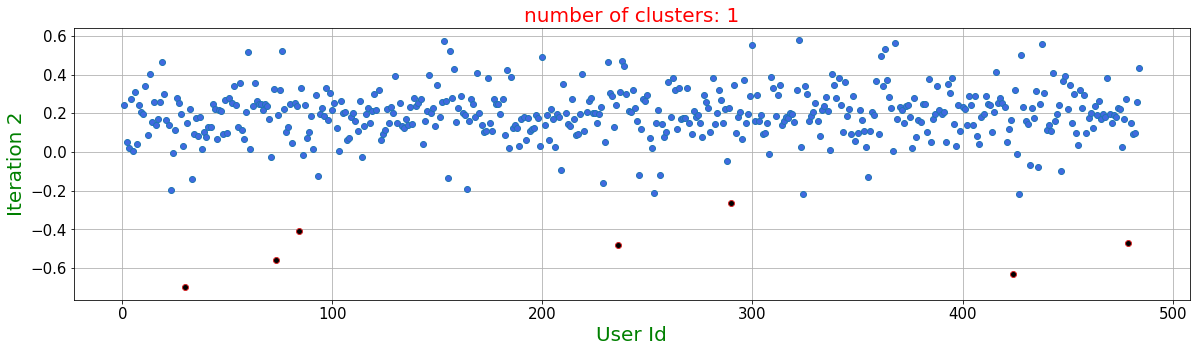

Silhouette Co-efficient:  0.786
No of users changing color :  6
Percentage of users changing color :  1.2396694214876034
----------------------------------------------------------


percentage difference: 54.958677685950406 %
----------------------------------------------------------
484
iteration  3
scale of w2:  [ -0.6586524110815831 , 0.5645298150498017 ]


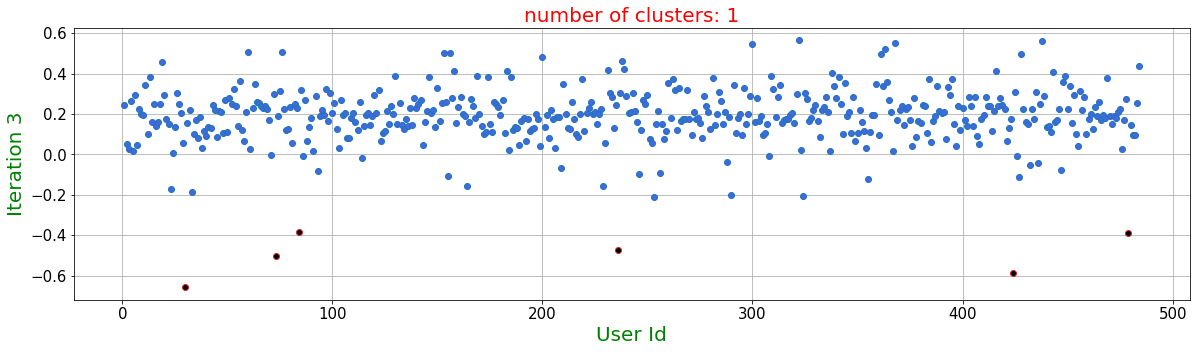

Silhouette Co-efficient:  0.797
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 51.2396694214876 %
----------------------------------------------------------
484
iteration  4
scale of w2:  [ -0.6193167138926398 , 0.5586720032362881 ]


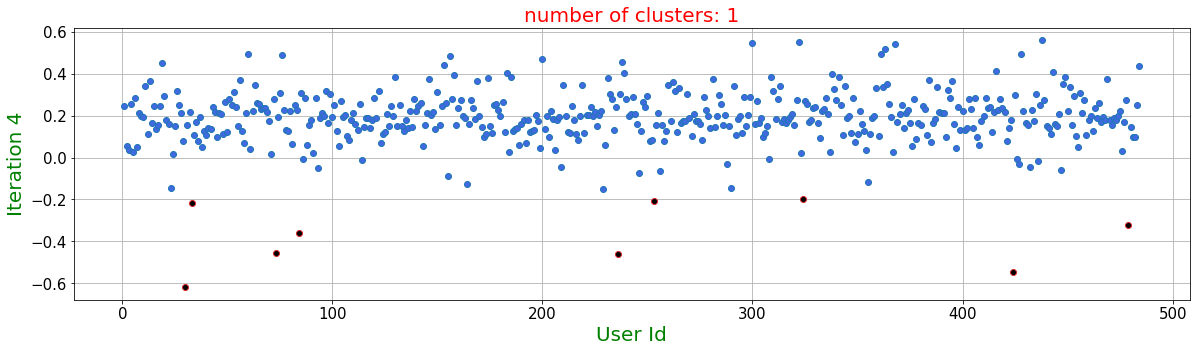

Silhouette Co-efficient:  0.773
No of users changing color :  3
Percentage of users changing color :  0.6198347107438017
----------------------------------------------------------


percentage difference: 52.892561983471076 %
----------------------------------------------------------
484
iteration  5
scale of w2:  [ -0.5818161123234713 , 0.558045198104204 ]


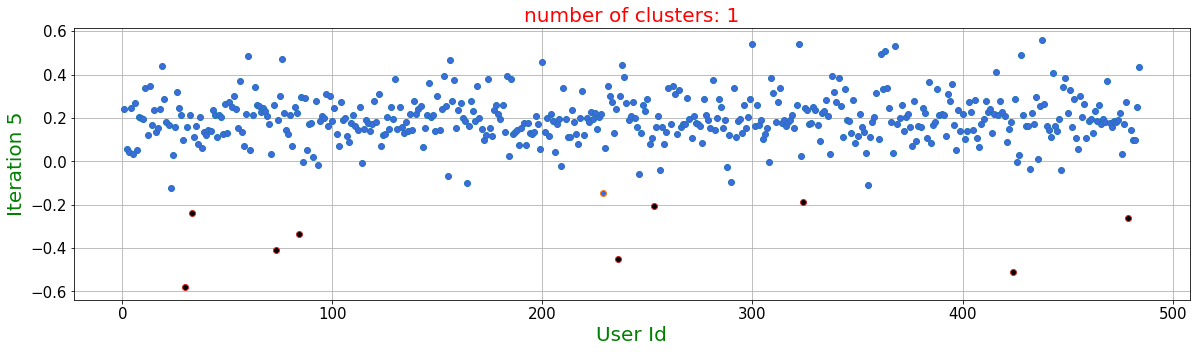

Silhouette Co-efficient:  0.777
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 48.553719008264466 %
----------------------------------------------------------
484
iteration  6
scale of w2:  [ -0.5460556335409954 , 0.5574281658465855 ]


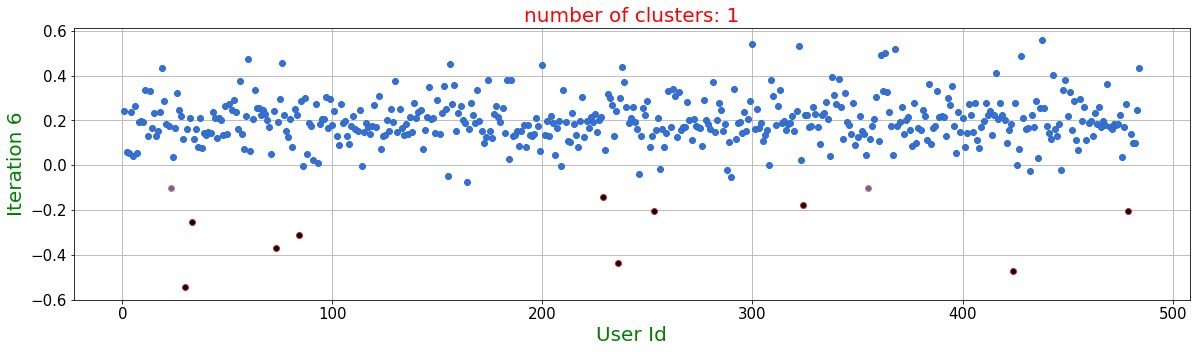

Silhouette Co-efficient:  0.774
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 42.768595041322314 %
----------------------------------------------------------
484
iteration  7
scale of w2:  [ -0.5119465300605867 , 0.556819900166078 ]


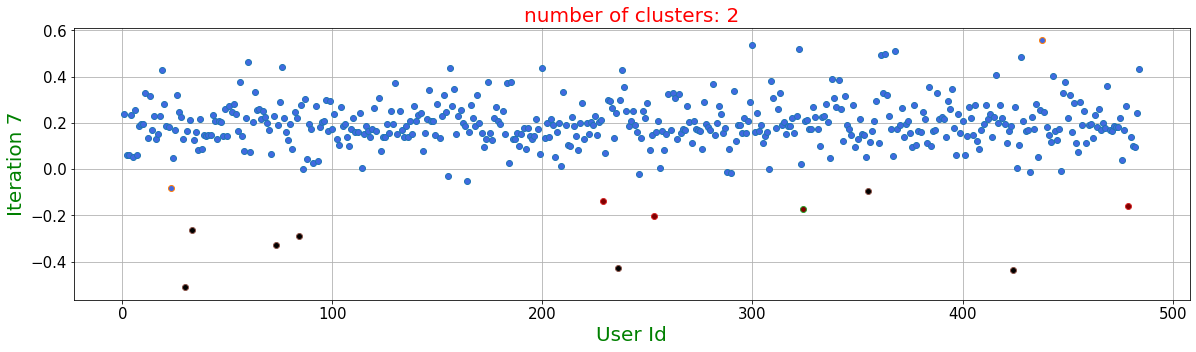

Silhouette Co-efficient:  0.687
No of users changing color :  5
Percentage of users changing color :  1.0330578512396695
----------------------------------------------------------


percentage difference: 42.14876033057851 %
----------------------------------------------------------
484
iteration  8
scale of w2:  [ -0.47940572910062546 , 0.5562195029534178 ]


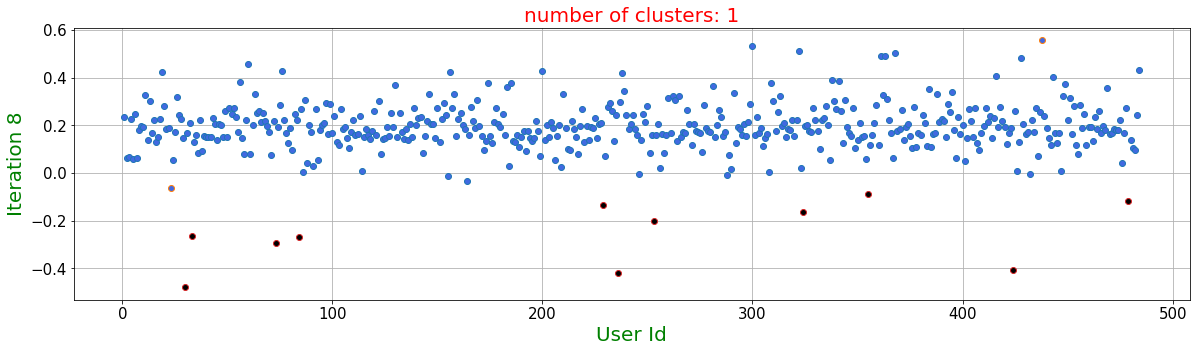

Silhouette Co-efficient:  0.772
No of users changing color :  4
Percentage of users changing color :  0.8264462809917356
----------------------------------------------------------


percentage difference: 37.1900826446281 %
----------------------------------------------------------
484
iteration  9
scale of w2:  [ -0.44835534321796944 , 0.555626170670206 ]


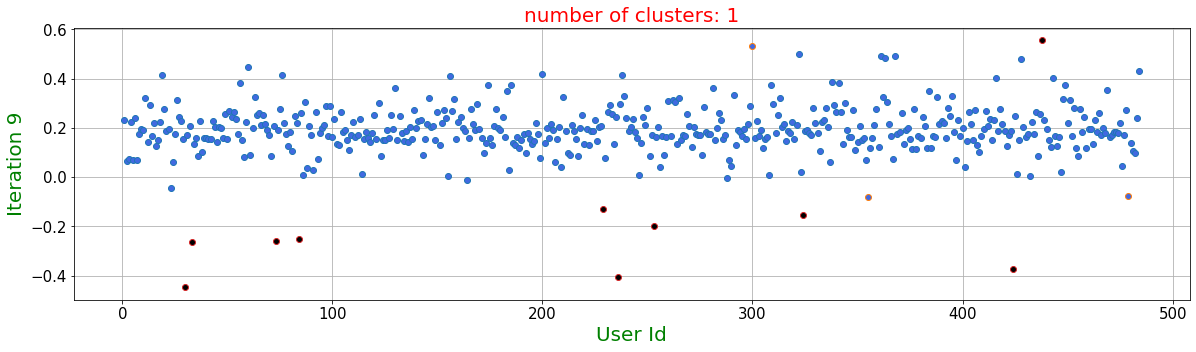

Silhouette Co-efficient:  0.781
No of users changing color :  3
Percentage of users changing color :  0.6198347107438017
----------------------------------------------------------


percentage difference: 34.710743801652896 %
----------------------------------------------------------
484
iteration  10
scale of w2:  [ -0.41872223494240896 , 0.5550391827113642 ]


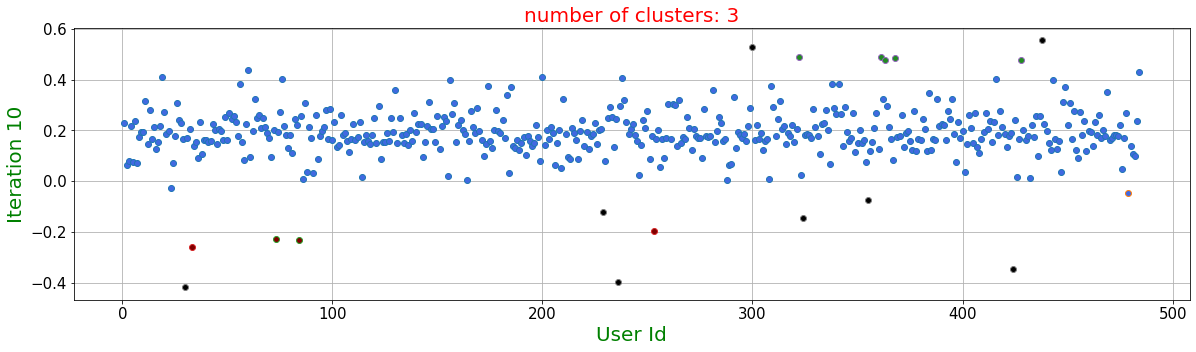

Silhouette Co-efficient:  0.627
No of users changing color :  11
Percentage of users changing color :  2.272727272727273
----------------------------------------------------------


percentage difference: 32.438016528925615 %
----------------------------------------------------------
484
iteration  11
scale of w2:  [ -0.39043762855023306 , 0.5544578914543916 ]


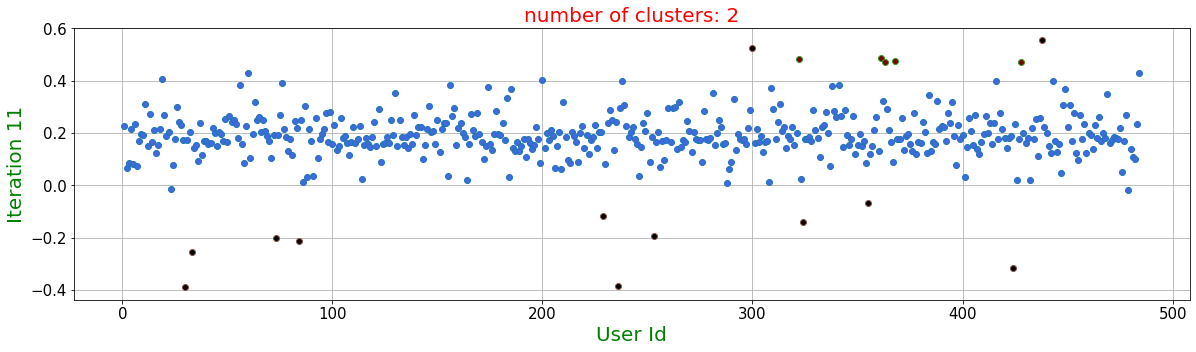

Silhouette Co-efficient:  0.651
No of users changing color :  9
Percentage of users changing color :  1.859504132231405
----------------------------------------------------------


percentage difference: 29.75206611570248 %
----------------------------------------------------------
484
iteration  12
scale of w2:  [ -0.37699379382470144 , 0.5538817137379858 ]


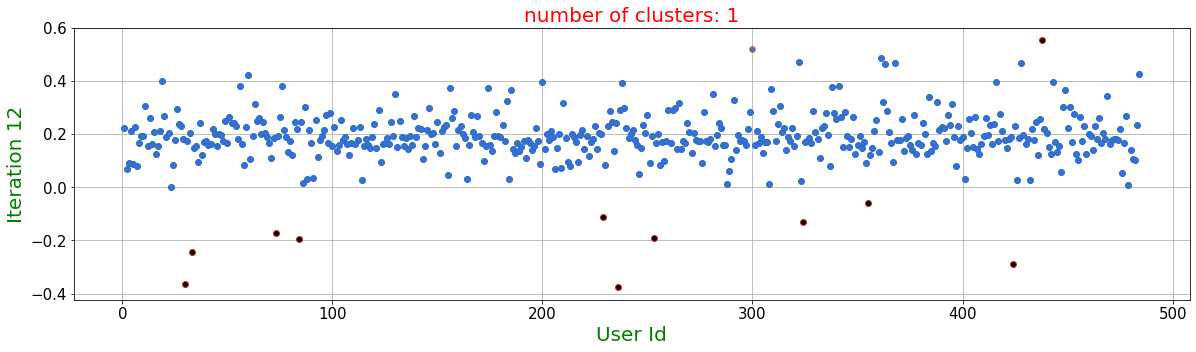

Silhouette Co-efficient:  0.781
No of users changing color :  6
Percentage of users changing color :  1.2396694214876034
----------------------------------------------------------


percentage difference: 27.685950413223143 %
----------------------------------------------------------
484
iteration  13
scale of w2:  [ -0.36733295859926707 , 0.5533101235479936 ]


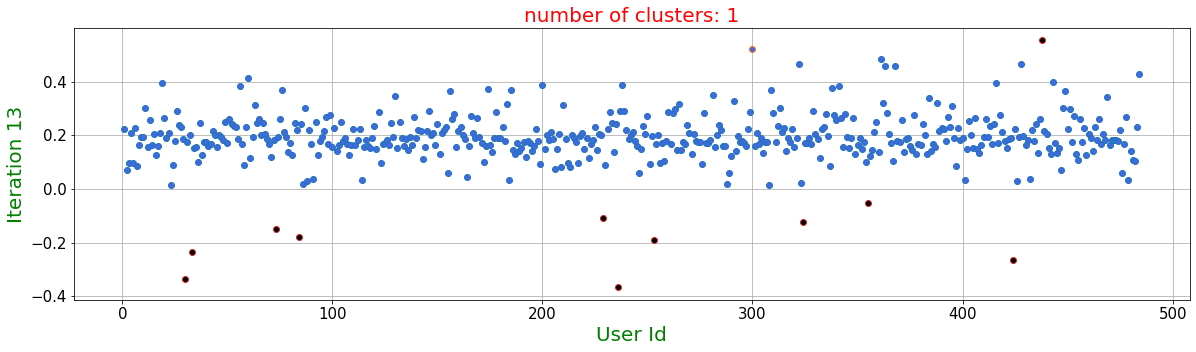

Silhouette Co-efficient:  0.782
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 25.206611570247933 %
----------------------------------------------------------
484
iteration  14
scale of w2:  [ -0.3578220866321449 , 0.5527426457214188 ]


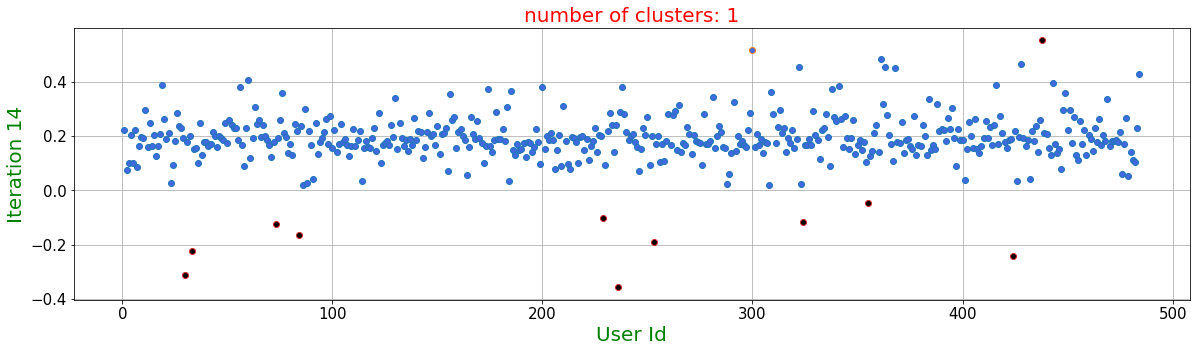

Silhouette Co-efficient:  0.783
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 23.553719008264462 %
----------------------------------------------------------
484
iteration  15
scale of w2:  [ -0.34845904276302586 , 0.5521788505083588 ]


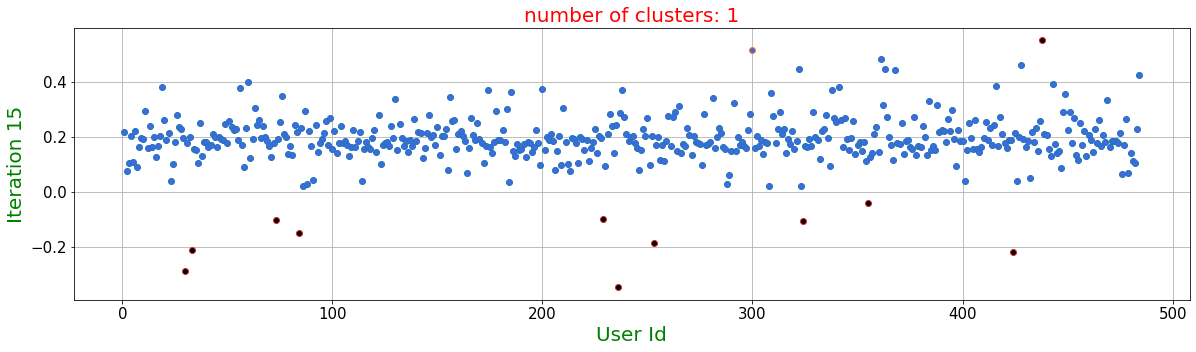

Silhouette Co-efficient:  0.784
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 25.413223140495866 %
----------------------------------------------------------
484
iteration  16
scale of w2:  [ -0.3392417719848225 , 0.5516183488570929 ]


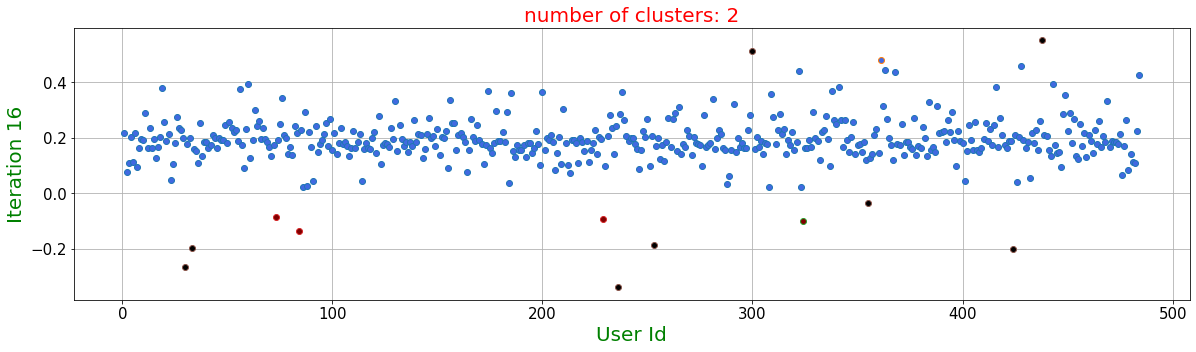

Silhouette Co-efficient:  0.722
No of users changing color :  5
Percentage of users changing color :  1.0330578512396695
----------------------------------------------------------


percentage difference: 18.181818181818183 %
----------------------------------------------------------
484
iteration  17
scale of w2:  [ -0.3301682820109932 , 0.5510607883093005 ]


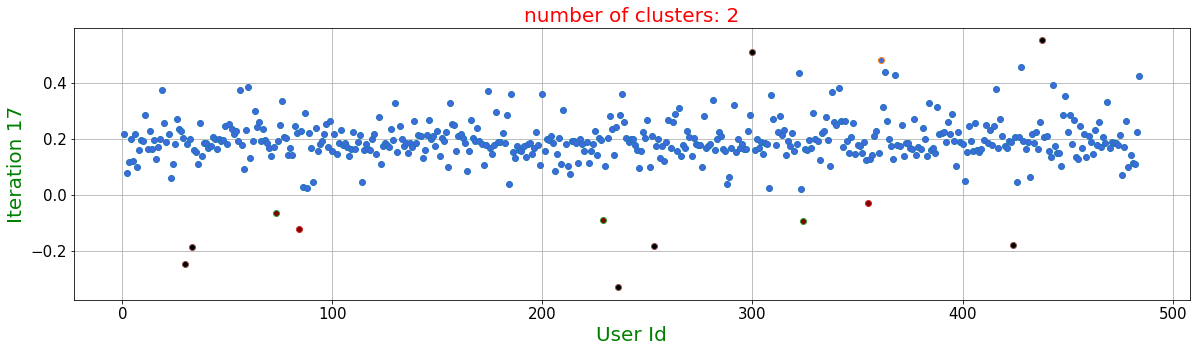

Silhouette Co-efficient:  0.711
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 22.31404958677686 %
----------------------------------------------------------
484
iteration  18
scale of w2:  [ -0.32123663120002277 , 0.5505058494108631 ]


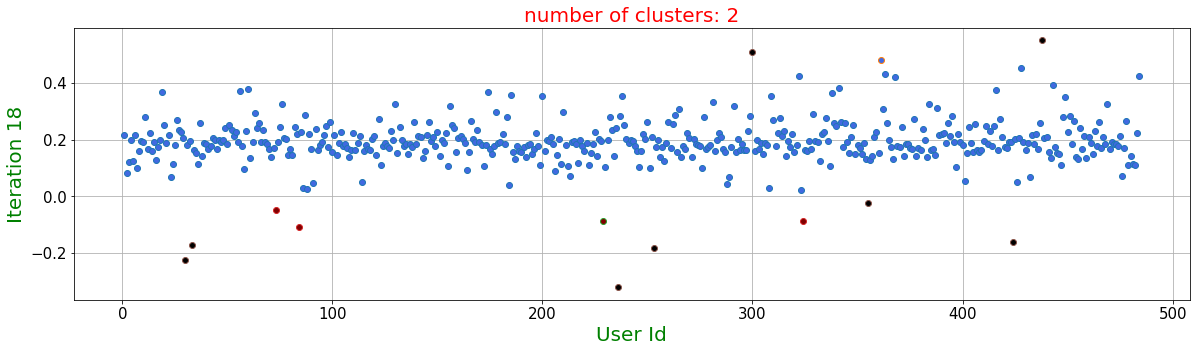

Silhouette Co-efficient:  0.719
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 19.421487603305785 %
----------------------------------------------------------
484
iteration  19
scale of w2:  [ -0.31244492013430986 , 0.5499532425593099 ]


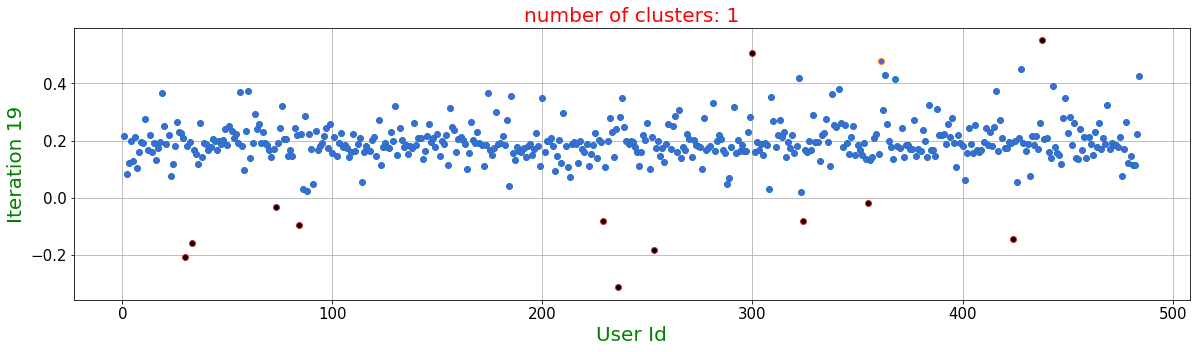

Silhouette Co-efficient:  0.781
No of users changing color :  4
Percentage of users changing color :  0.8264462809917356
----------------------------------------------------------


percentage difference: 16.735537190082646 %
----------------------------------------------------------
484
iteration  20
scale of w2:  [ -0.30379128566127606 , 0.549402705222063 ]


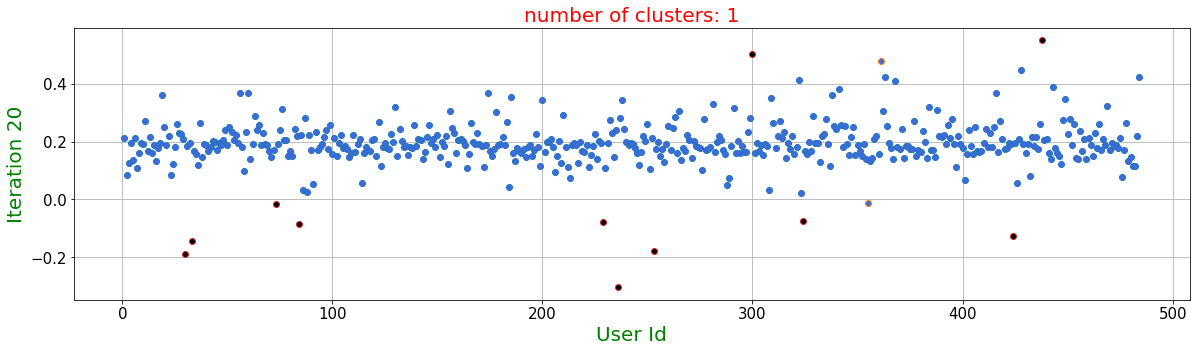

Silhouette Co-efficient:  0.786
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 16.528925619834713 %
----------------------------------------------------------
484
iteration  21
scale of w2:  [ -0.2952738965720316 , 0.5488539994706021 ]


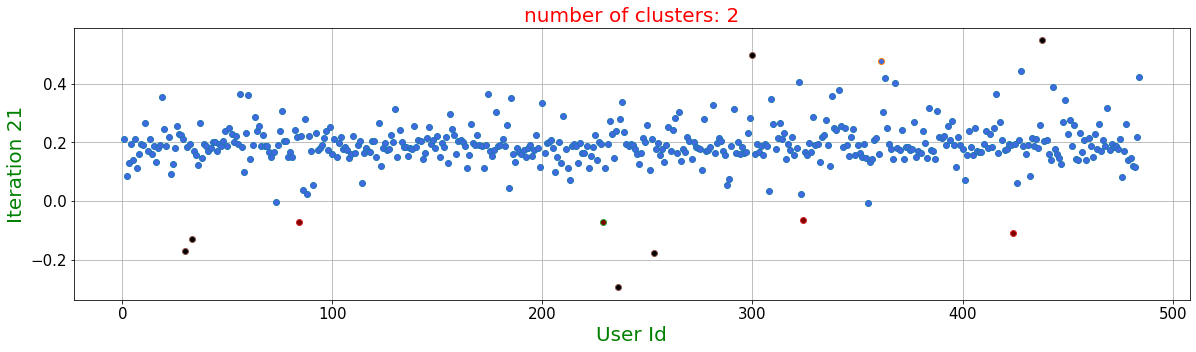

Silhouette Co-efficient:  0.737
No of users changing color :  5
Percentage of users changing color :  1.0330578512396695
----------------------------------------------------------


percentage difference: 14.049586776859504 %
----------------------------------------------------------
484
iteration  22
scale of w2:  [ -0.28689095035559004 , 0.5483069097848021 ]


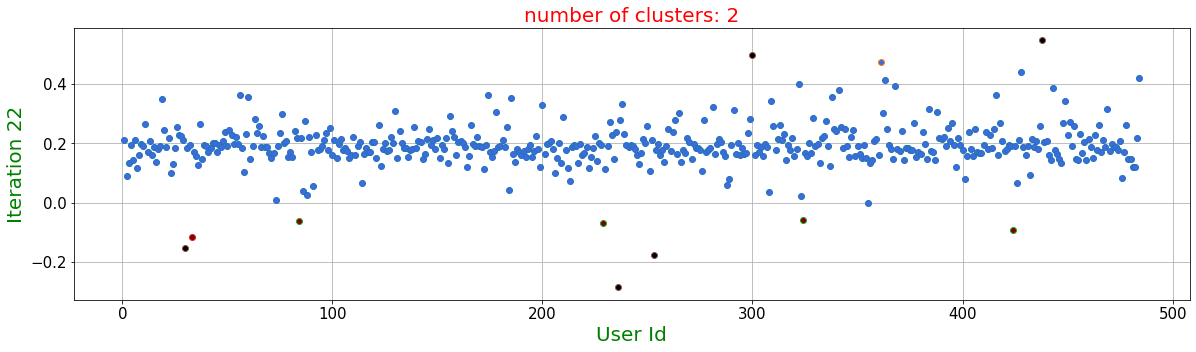

Silhouette Co-efficient:  0.746
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 16.94214876033058 %
----------------------------------------------------------
484
iteration  23
scale of w2:  [ -0.2786406706526764 , 0.5477612410893001 ]


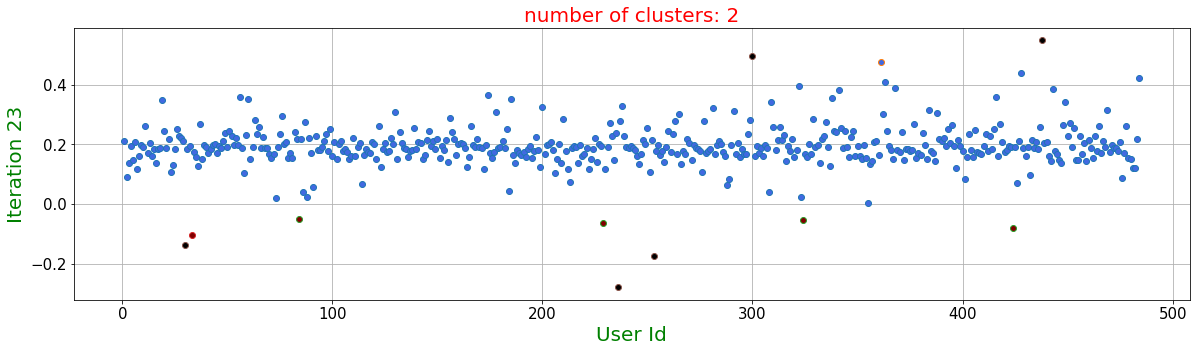

Silhouette Co-efficient:  0.744
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 15.495867768595042 %
----------------------------------------------------------
484
iteration  24
scale of w2:  [ -0.2705213051635006 , 0.5472168169900498 ]


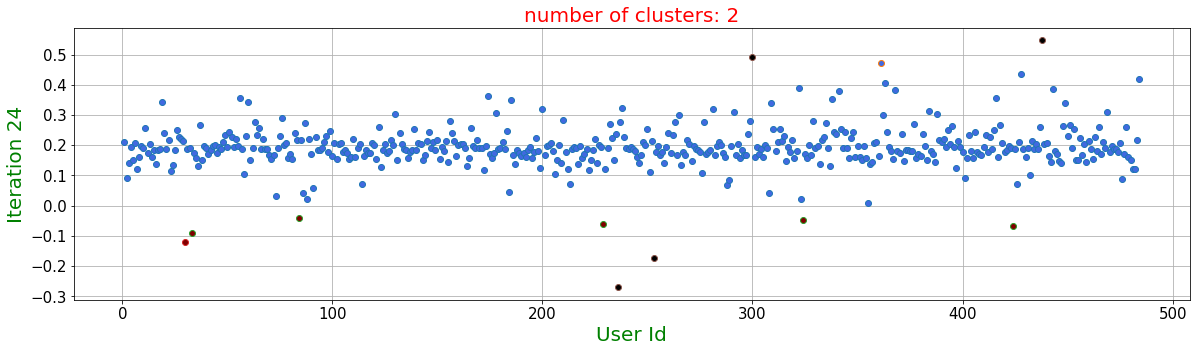

Silhouette Co-efficient:  0.753
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 14.669421487603307 %
----------------------------------------------------------
484
iteration  25
scale of w2:  [ -0.26253112385388416 , 0.546673478184449 ]


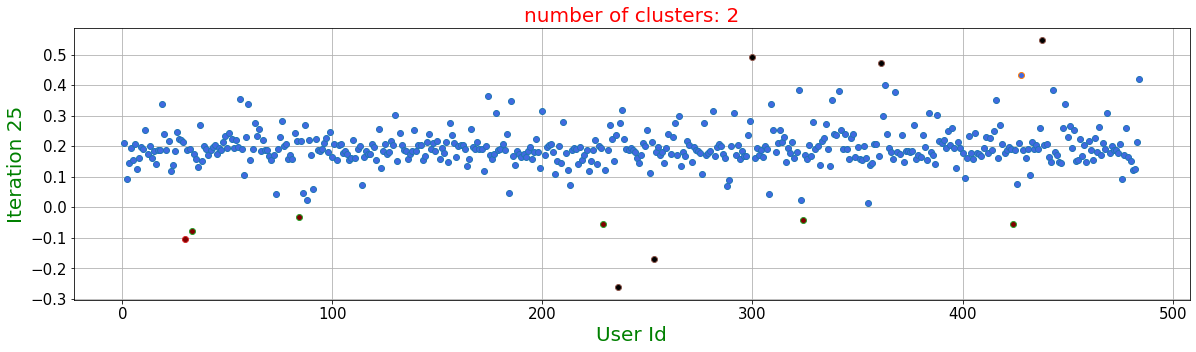

Silhouette Co-efficient:  0.748
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 9.710743801652892 %
----------------------------------------------------------
484
iteration  26
scale of w2:  [ -0.2546684173651888 , 0.5461310810227449 ]


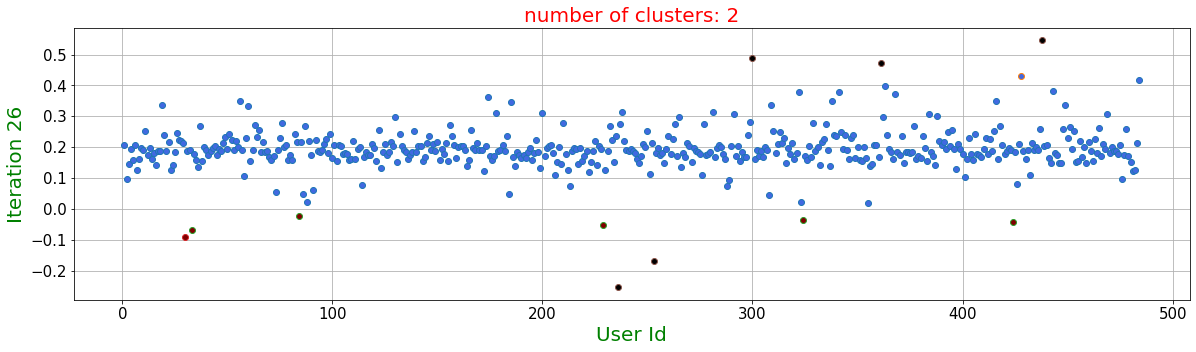

Silhouette Co-efficient:  0.746
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 14.46280991735537 %
----------------------------------------------------------
484
iteration  27
scale of w2:  [ -0.2469314955739366 , 0.54558949620199 ]


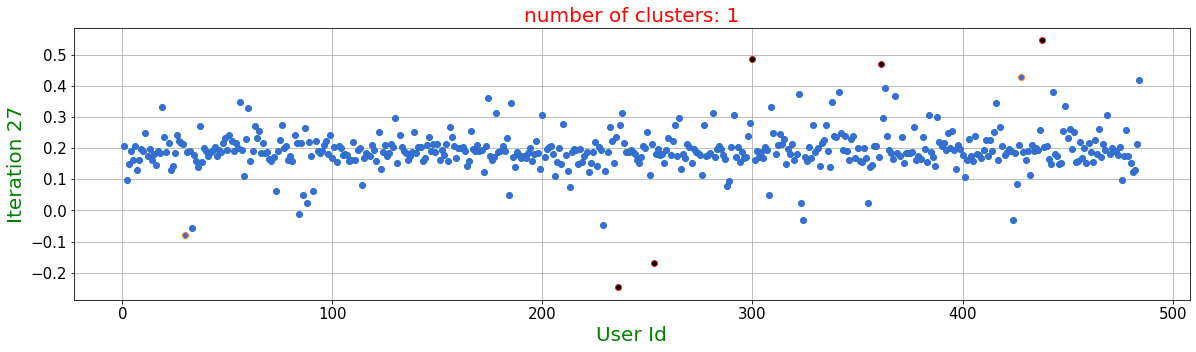

Silhouette Co-efficient:  0.817
No of users changing color :  6
Percentage of users changing color :  1.2396694214876034
----------------------------------------------------------


percentage difference: 10.330578512396695 %
----------------------------------------------------------
484
iteration  28
scale of w2:  [ -0.23931868627293526 , 0.5450486075767745 ]


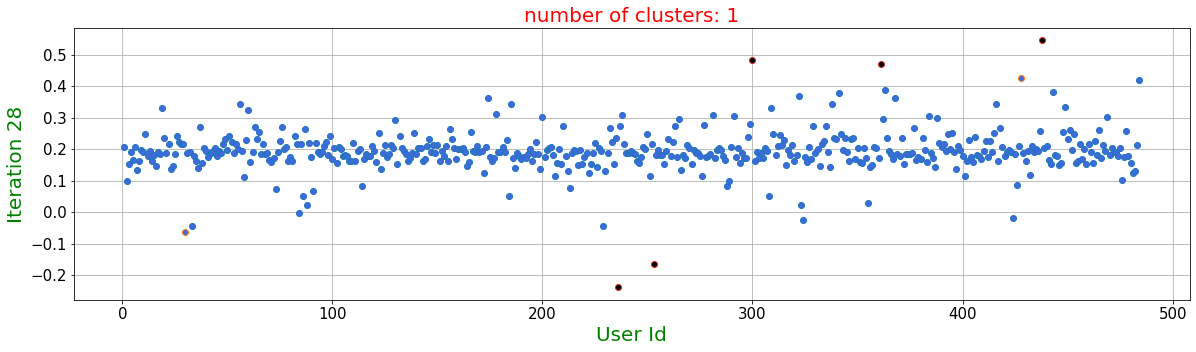

Silhouette Co-efficient:  0.82
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 14.049586776859504 %
----------------------------------------------------------
484
iteration  29
scale of w2:  [ -0.23182833396156563 , 0.5445083110733895 ]


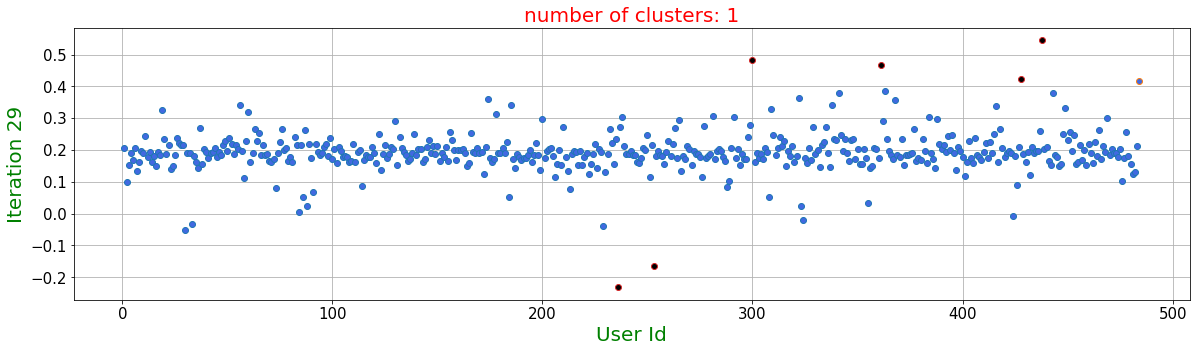

Silhouette Co-efficient:  0.814
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 10.950413223140496 %
----------------------------------------------------------
484
iteration  30
scale of w2:  [ -0.22445879874186694 , 0.5439685136960888 ]


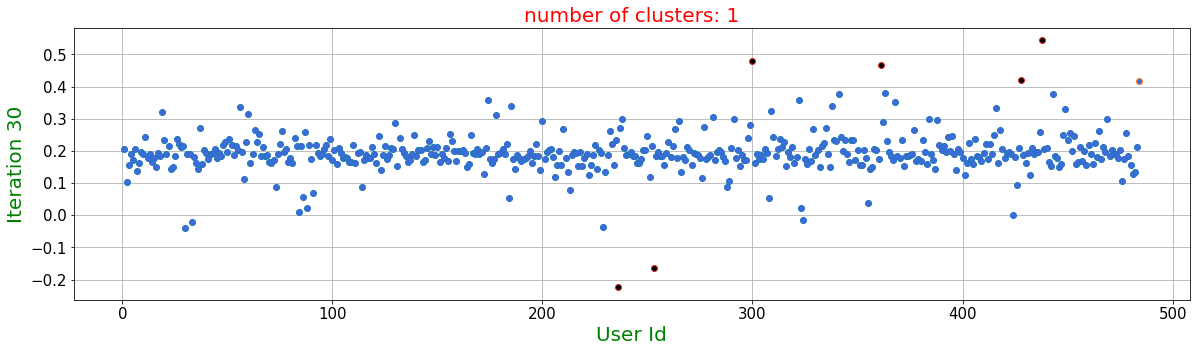

Silhouette Co-efficient:  0.817
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 12.190082644628099 %
----------------------------------------------------------
484
iteration  31
scale of w2:  [ -0.21720845532147148 , 0.5434291326157746 ]


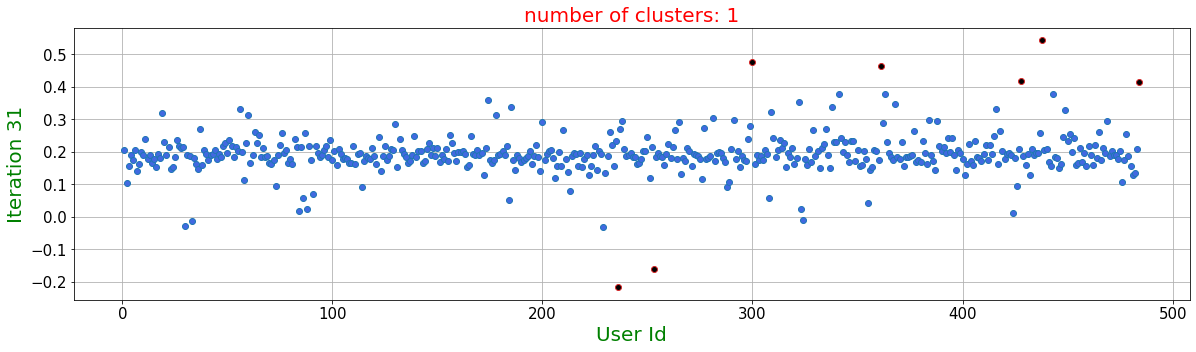

Silhouette Co-efficient:  0.813
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 11.15702479338843 %
----------------------------------------------------------
484
iteration  32
scale of w2:  [ -0.21007569212592966 , 0.5428900943328054 ]


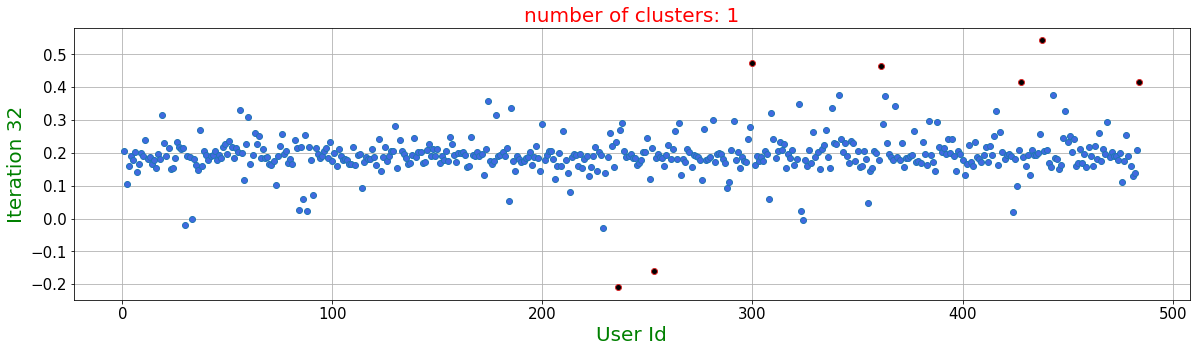

Silhouette Co-efficient:  0.816
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 9.50413223140496 %
----------------------------------------------------------
484
iteration  33
scale of w2:  [ -0.2030589105226791 , 0.5423513339067608 ]


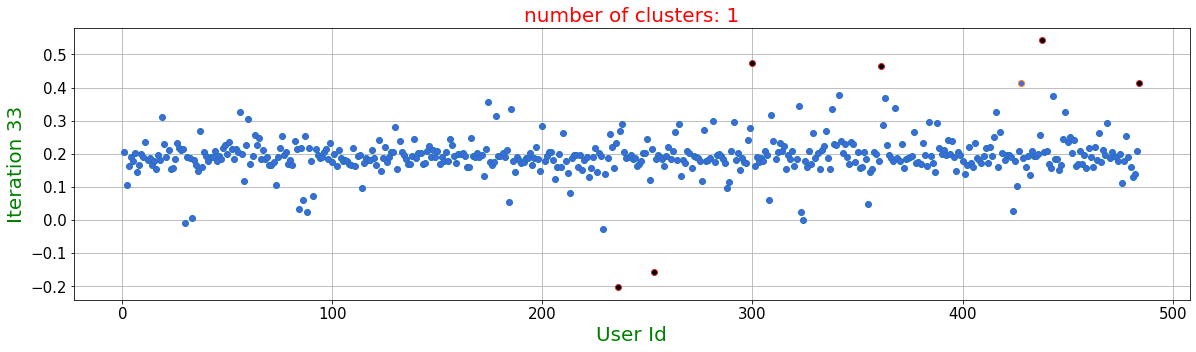

Silhouette Co-efficient:  0.825
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 11.983471074380166 %
----------------------------------------------------------
484
iteration  34
scale of w2:  [ -0.19615652415763477 , 0.5418127942469432 ]


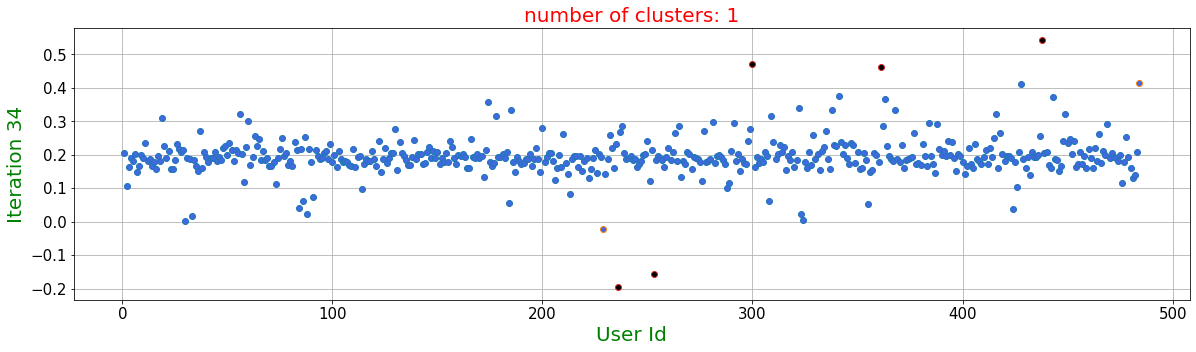

Silhouette Co-efficient:  0.836
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 8.677685950413224 %
----------------------------------------------------------
484
iteration  35
scale of w2:  [ -0.18936695840364592 , 0.5412744254581792 ]


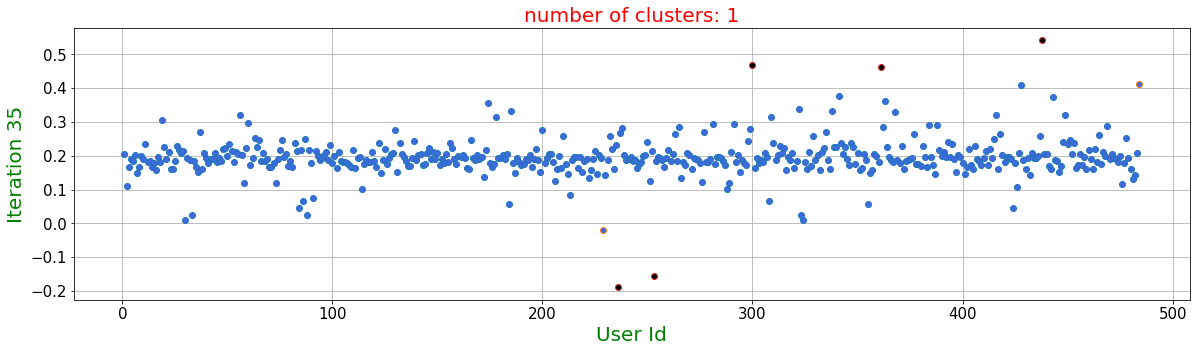

Silhouette Co-efficient:  0.838
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 6.40495867768595 %
----------------------------------------------------------
484
iteration  36
scale of w2:  [ -0.18268864991822528 , 0.5407361842371412 ]


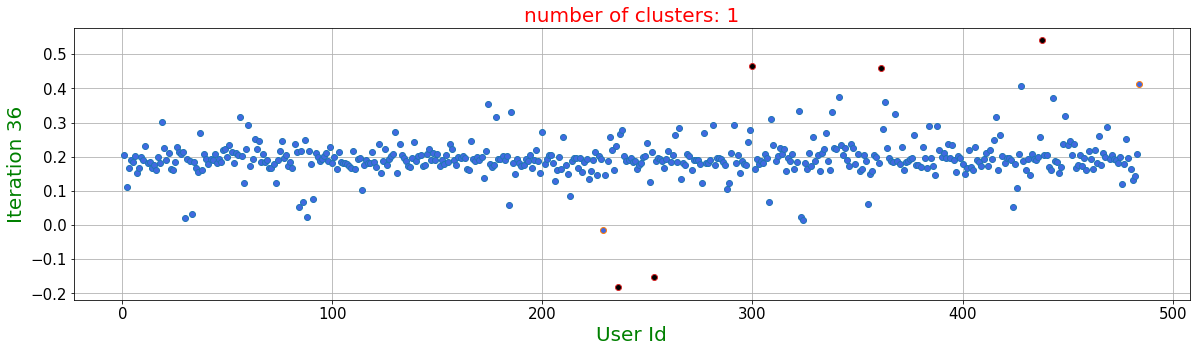

Silhouette Co-efficient:  0.84
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 9.710743801652892 %
----------------------------------------------------------
484
iteration  37
scale of w2:  [ -0.17612004630622205 , 0.5401980333149599 ]


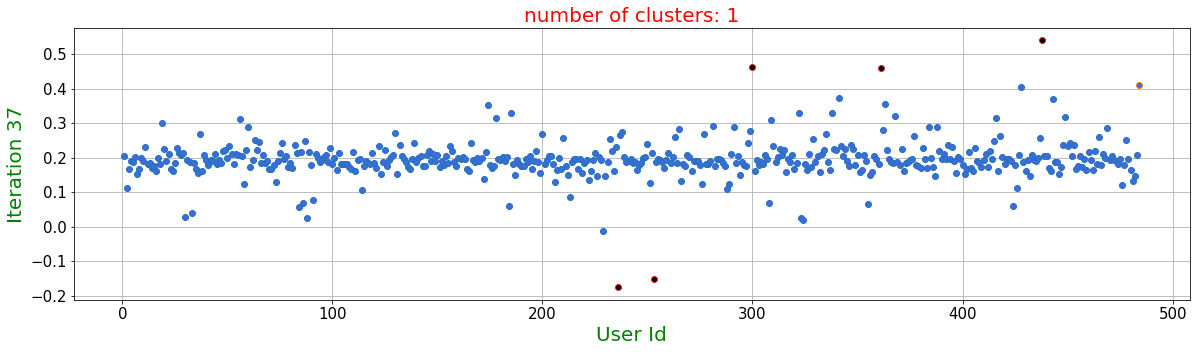

Silhouette Co-efficient:  0.842
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 9.50413223140496 %
----------------------------------------------------------
484
iteration  38
scale of w2:  [ -0.16965960588160767 , 0.5396599409423607 ]


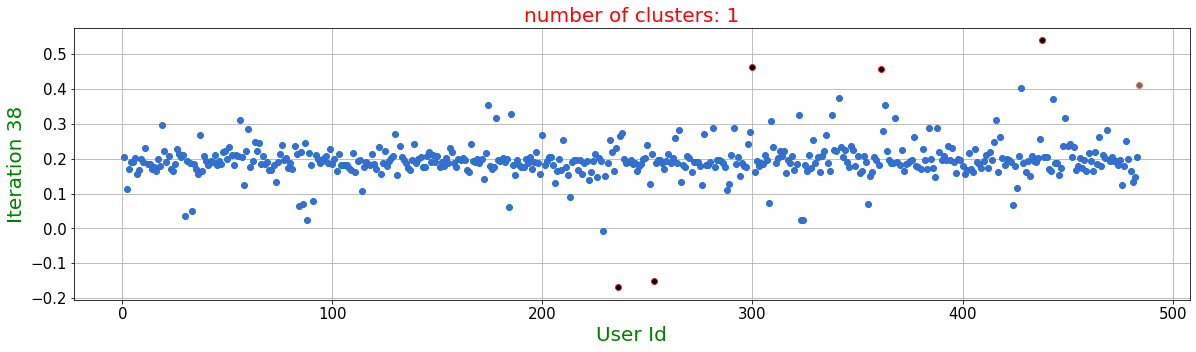

Silhouette Co-efficient:  0.844
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 6.8181818181818175 %
----------------------------------------------------------
484
iteration  39
scale of w2:  [ -0.16330579752133068 , 0.539121880413952 ]


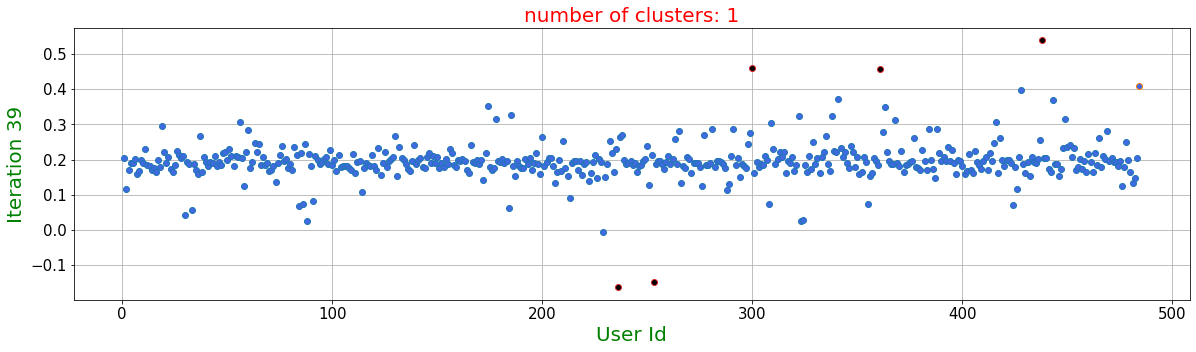

Silhouette Co-efficient:  0.846
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 7.231404958677685 %
----------------------------------------------------------
484
iteration  40
scale of w2:  [ -0.15705710060329411 , 0.5385838296286272 ]


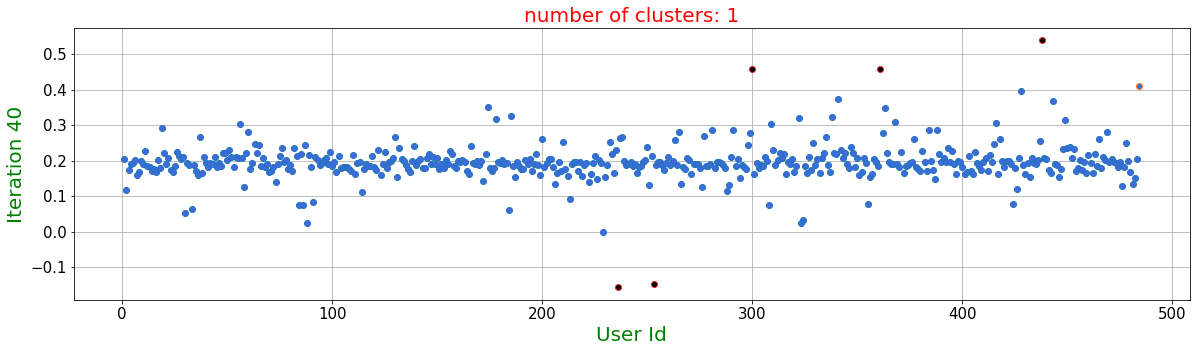

Silhouette Co-efficient:  0.848
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 6.40495867768595 %
----------------------------------------------------------
484
iteration  41
scale of w2:  [ -0.15091200501990631 , 0.5380457706833286 ]


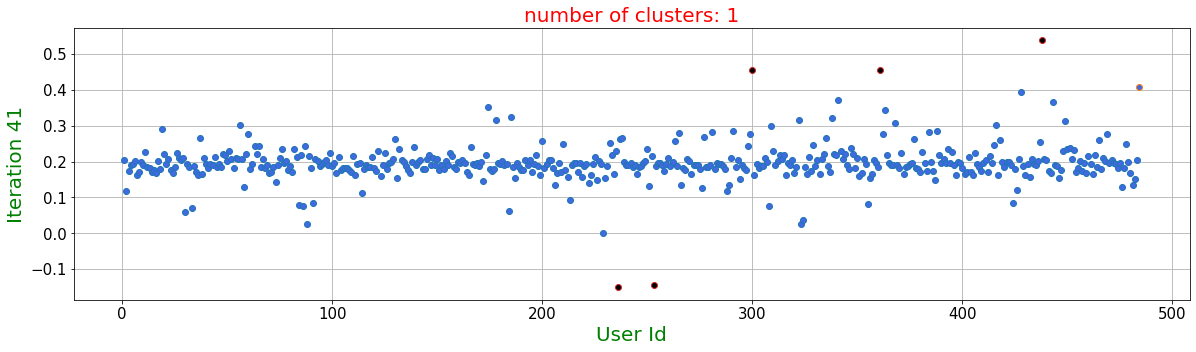

Silhouette Co-efficient:  0.85
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 7.644628099173553 %
----------------------------------------------------------
484
iteration  42
scale of w2:  [ -0.14486901125832968 , 0.537507689497675 ]


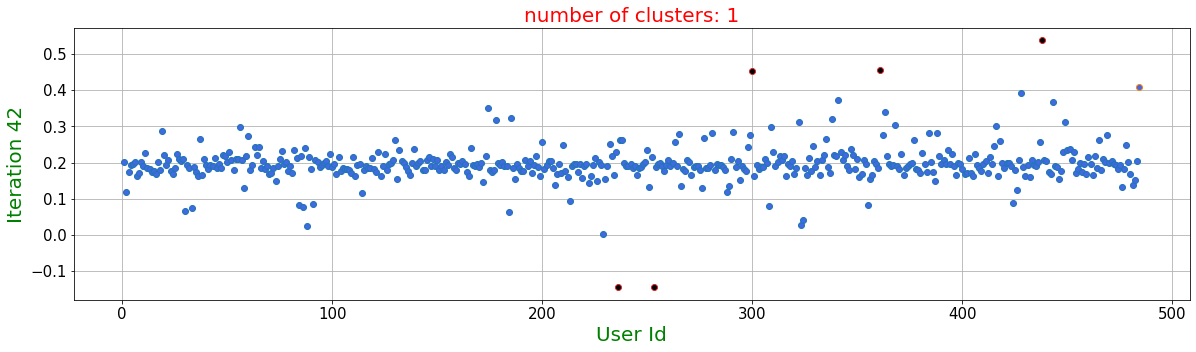

Silhouette Co-efficient:  0.852
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 8.057851239669422 %
----------------------------------------------------------
484
iteration  43
scale of w2:  [ -0.14237274738107772 , 0.536969575467164 ]


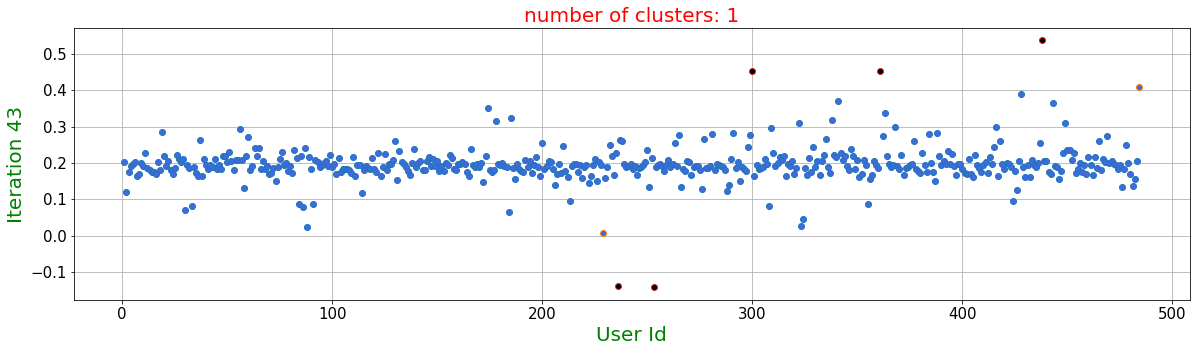

Silhouette Co-efficient:  0.853
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.545454545454546 %
----------------------------------------------------------
484
iteration  44
scale of w2:  [ -0.14084728269144312 , 0.5364314211428565 ]


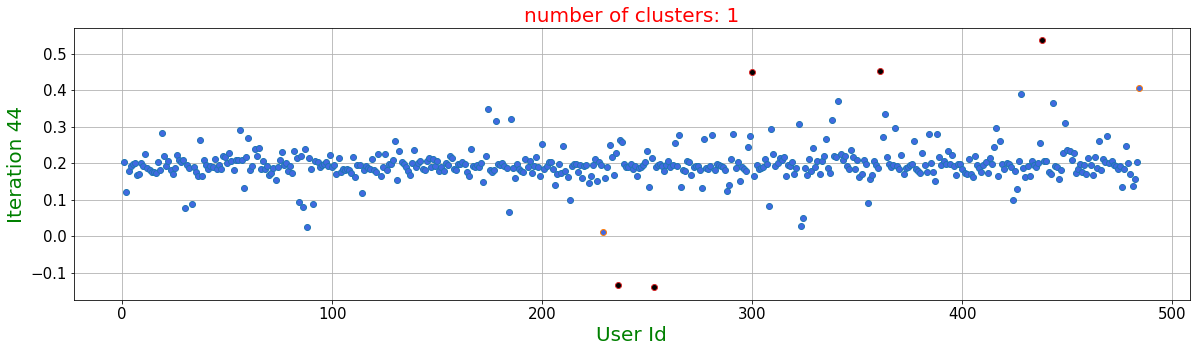

Silhouette Co-efficient:  0.855
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 7.231404958677685 %
----------------------------------------------------------
484
iteration  45
scale of w2:  [ -0.13932676681092399 , 0.5358932219356166 ]


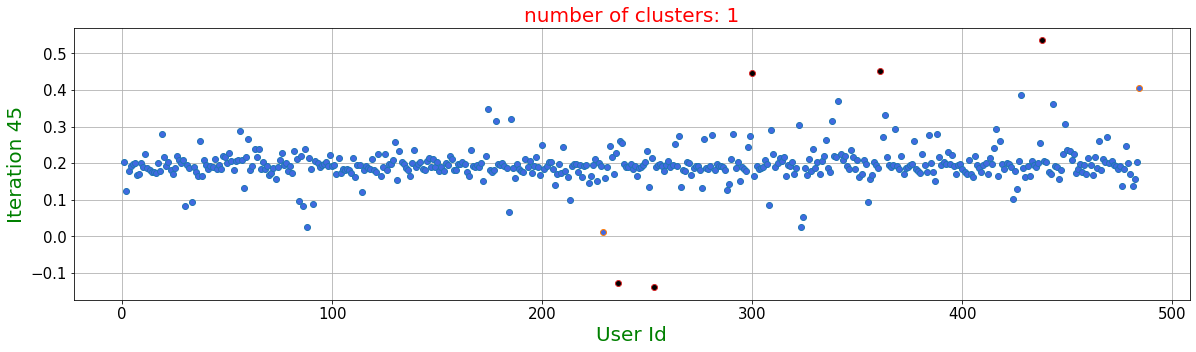

Silhouette Co-efficient:  0.857
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 7.644628099173553 %
----------------------------------------------------------
484
iteration  46
scale of w2:  [ -0.13781119537764325 , 0.5353549758431285 ]


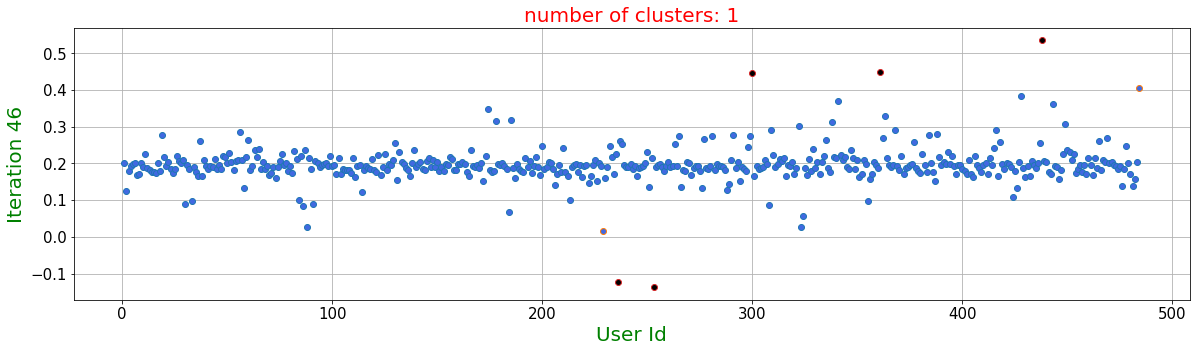

Silhouette Co-efficient:  0.858
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 6.6115702479338845 %
----------------------------------------------------------
484
iteration  47
scale of w2:  [ -0.1363005674528307 , 0.5348166831980475 ]


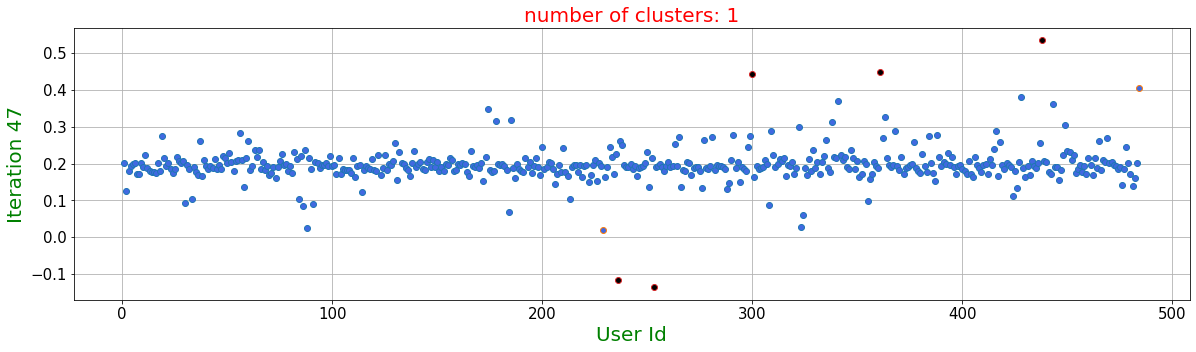

Silhouette Co-efficient:  0.86
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 5.991735537190083 %
----------------------------------------------------------
484
iteration  48
scale of w2:  [ -0.13479488509580617 , 0.5342783464357652 ]


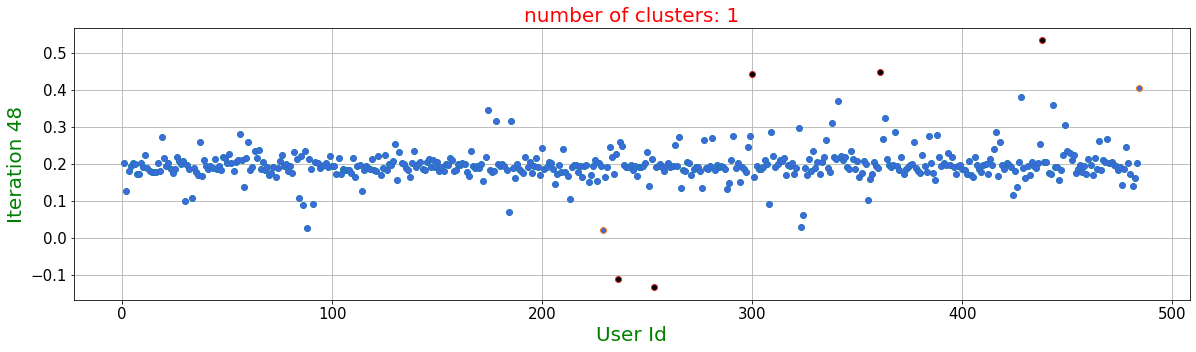

Silhouette Co-efficient:  0.861
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 6.40495867768595 %
----------------------------------------------------------
484
iteration  49
scale of w2:  [ -0.13329415297628858 , 0.5337399698803748 ]


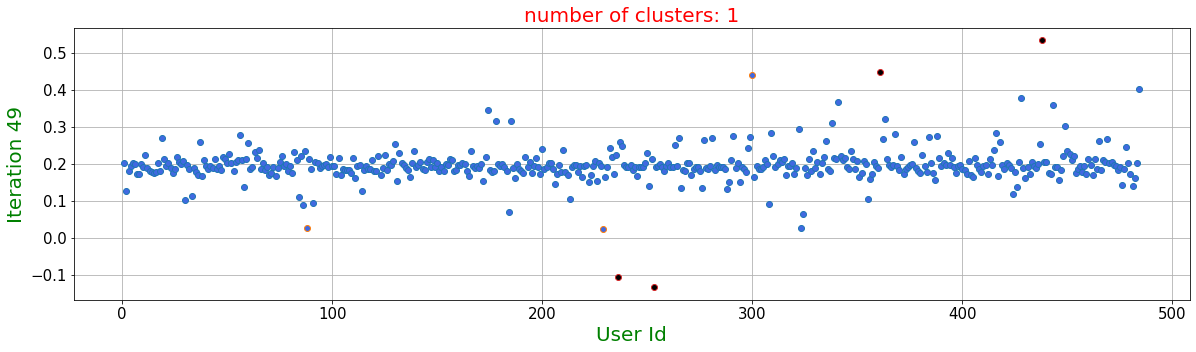

Silhouette Co-efficient:  0.867
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 6.40495867768595 %
----------------------------------------------------------
484
iteration  50
scale of w2:  [ -0.13179837802098285 , 0.5332015595475271 ]


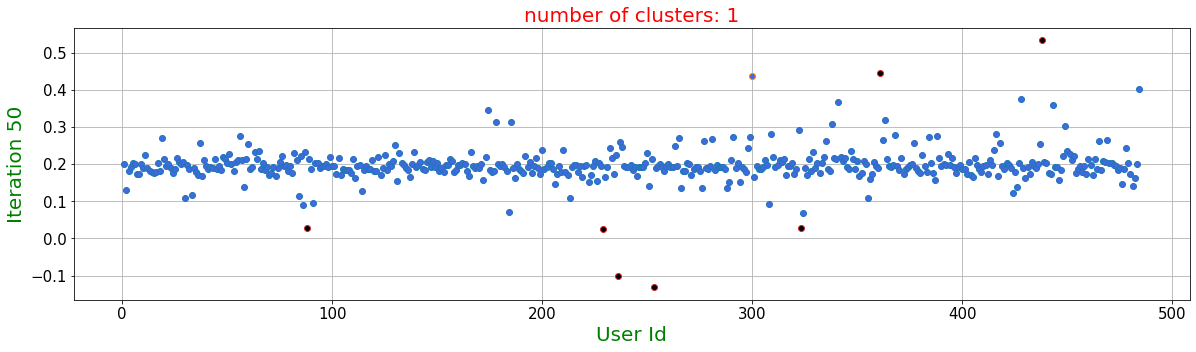

Silhouette Co-efficient:  0.844
No of users changing color :  3
Percentage of users changing color :  0.6198347107438017
----------------------------------------------------------


percentage difference: 5.1652892561983474 %
----------------------------------------------------------
484
iteration  51
scale of w2:  [ -0.13030756909166455 , 0.5326631229629584 ]


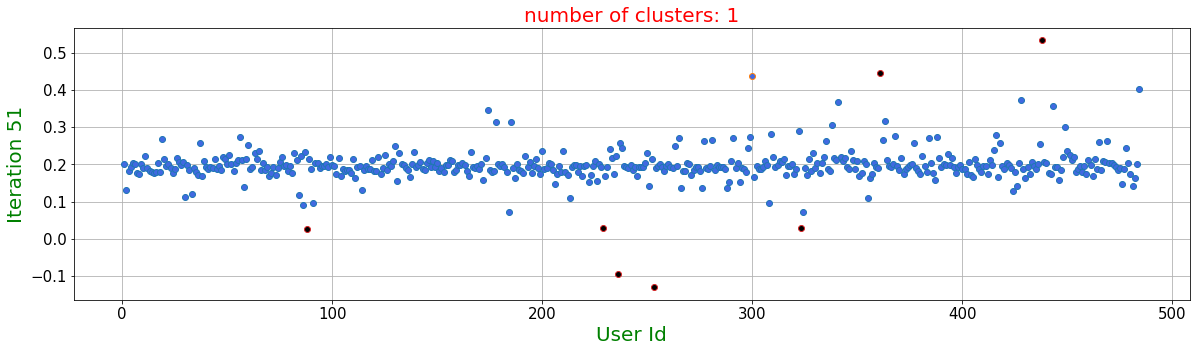

Silhouette Co-efficient:  0.846
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.958677685950414 %
----------------------------------------------------------
484
iteration  52
scale of w2:  [ -0.1288217366922209 , 0.532124668995554 ]


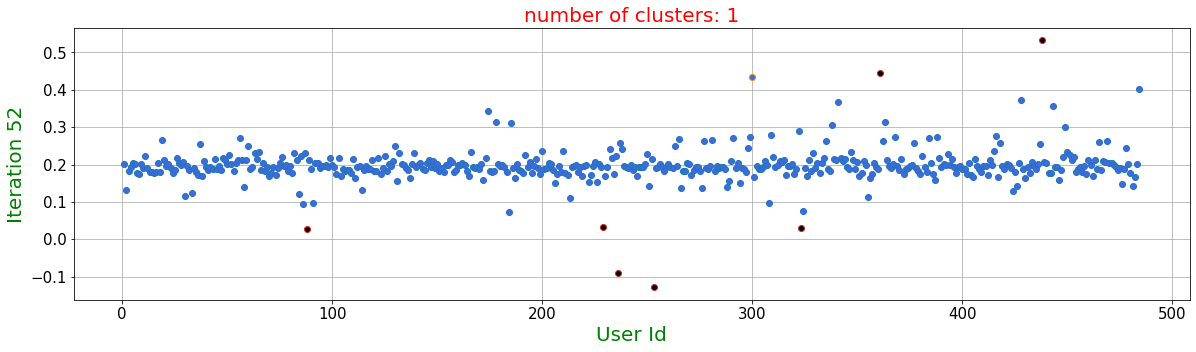

Silhouette Co-efficient:  0.847
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 6.8181818181818175 %
----------------------------------------------------------
484
iteration  53
scale of w2:  [ -0.1273408927023195 , 0.5315862077038959 ]


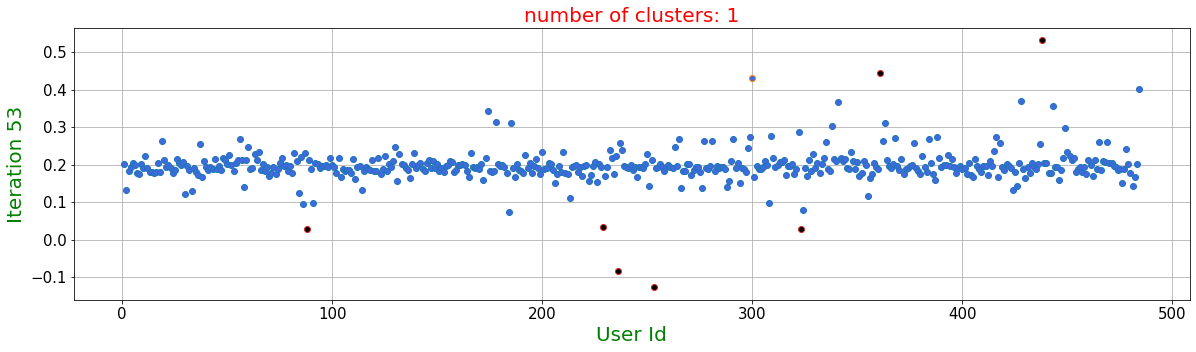

Silhouette Co-efficient:  0.849
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.75206611570248 %
----------------------------------------------------------
484
iteration  54
scale of w2:  [ -0.12586505013556848 , 0.5310477501953077 ]


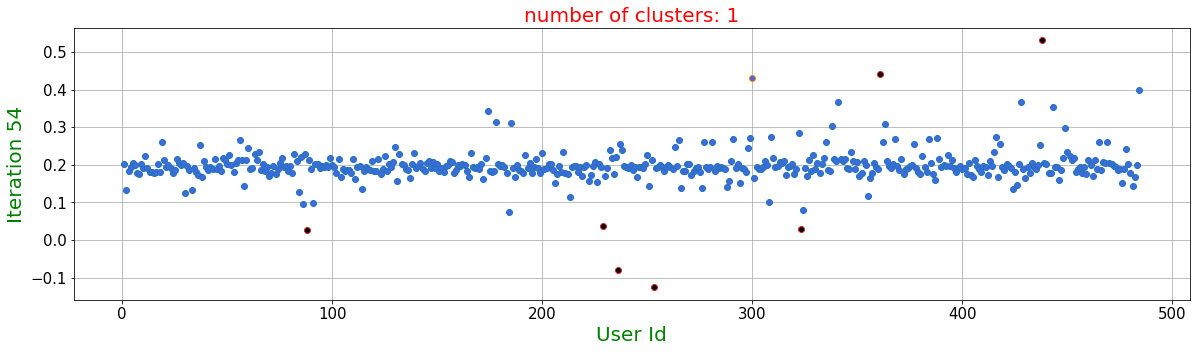

Silhouette Co-efficient:  0.85
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.338842975206612 %
----------------------------------------------------------
484
iteration  55
scale of w2:  [ -0.12439422292020502 , 0.5305093084964857 ]


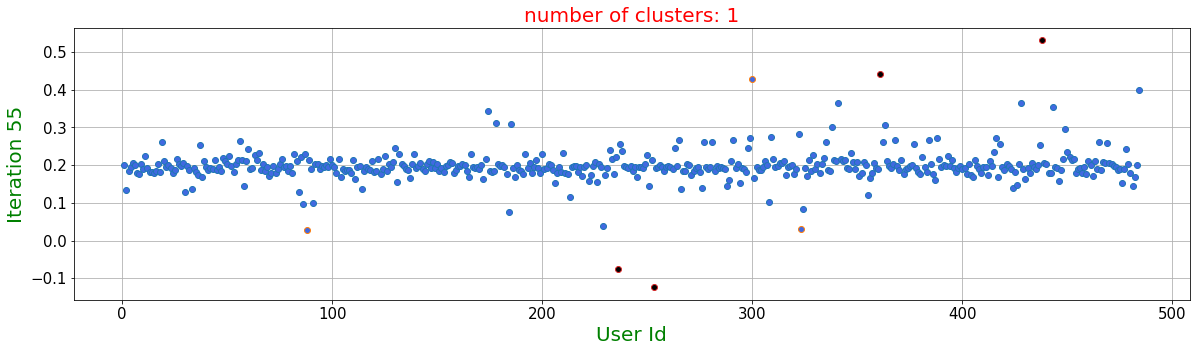

Silhouette Co-efficient:  0.874
No of users changing color :  3
Percentage of users changing color :  0.6198347107438017
----------------------------------------------------------


percentage difference: 4.132231404958678 %
----------------------------------------------------------
484
iteration  56
scale of w2:  [ -0.1229284257005053 , 0.5299708954348609 ]


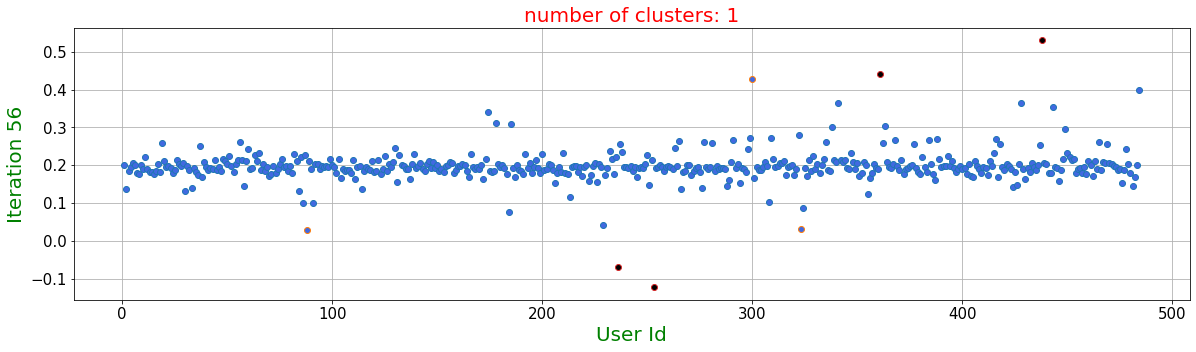

Silhouette Co-efficient:  0.876
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.132231404958678 %
----------------------------------------------------------
484
iteration  57
scale of w2:  [ -0.12146767365725247 , 0.5294325245299009 ]


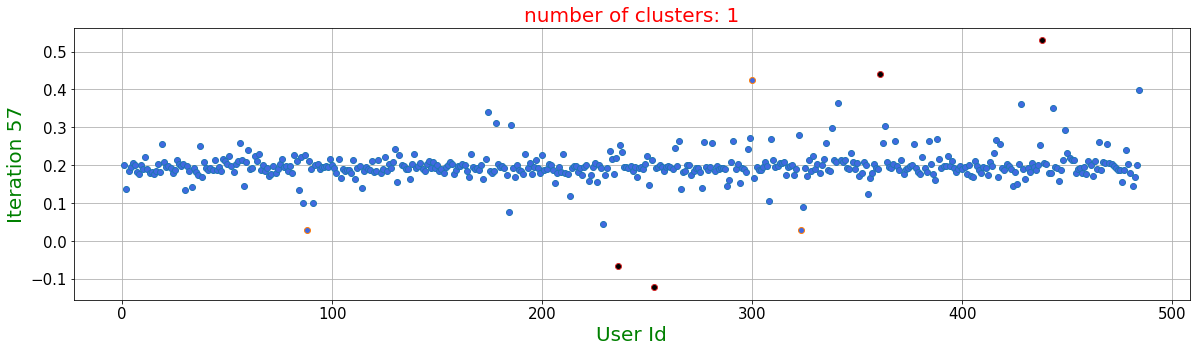

Silhouette Co-efficient:  0.877
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.958677685950414 %
----------------------------------------------------------
484
iteration  58
scale of w2:  [ -0.12001198234572902 , 0.5288942098936122 ]


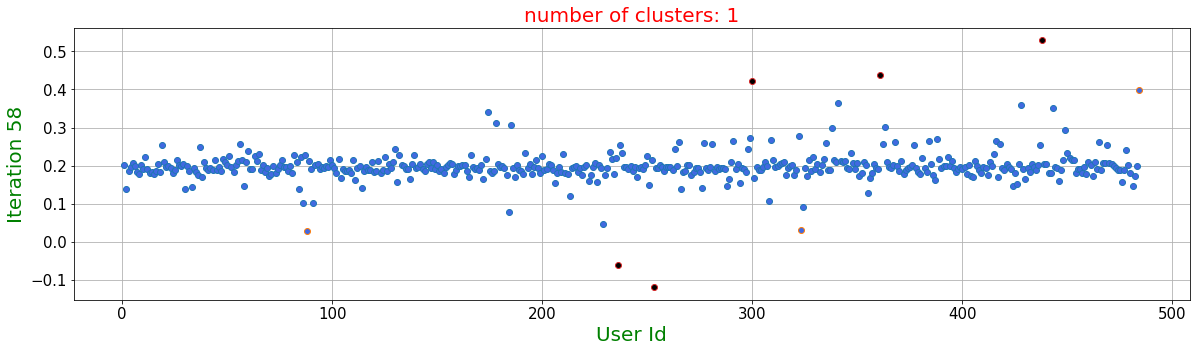

Silhouette Co-efficient:  0.873
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 4.75206611570248 %
----------------------------------------------------------
484
iteration  59
scale of w2:  [ -0.11856136754981869 , 0.5283559661395564 ]


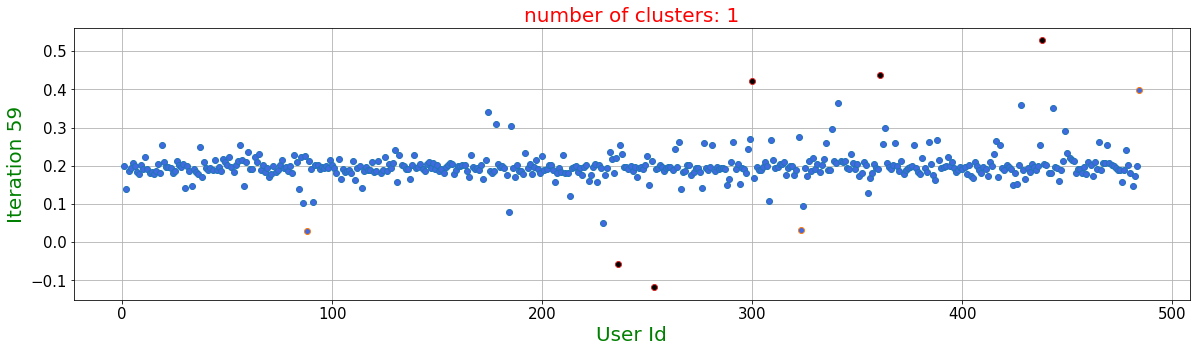

Silhouette Co-efficient:  0.874
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.0991735537190084 %
----------------------------------------------------------
484
iteration  60
scale of w2:  [ -0.11711584515091275 , 0.5278178082997387 ]


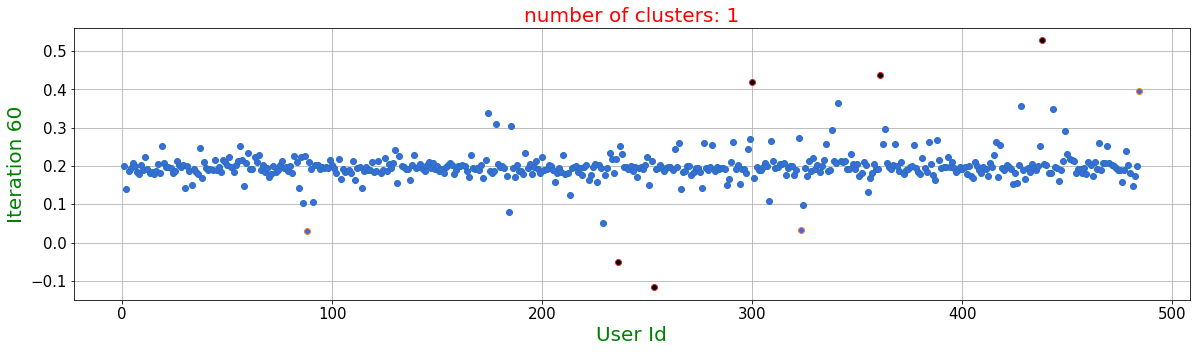

Silhouette Co-efficient:  0.875
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.925619834710744 %
----------------------------------------------------------
484
iteration  61
scale of w2:  [ -0.11567543101041508 , 0.5272797517487775 ]


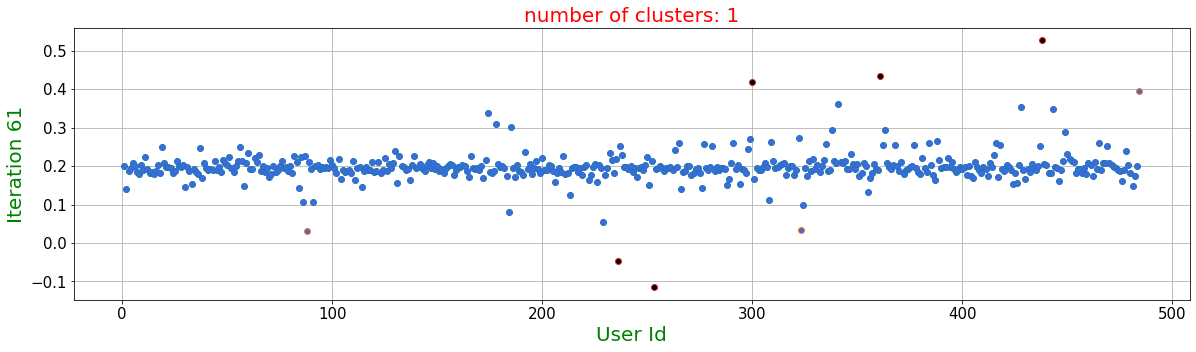

Silhouette Co-efficient:  0.876
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.3057851239669422 %
----------------------------------------------------------
484
iteration  62
scale of w2:  [ -0.11424014086473318 , 0.5267418121347984 ]


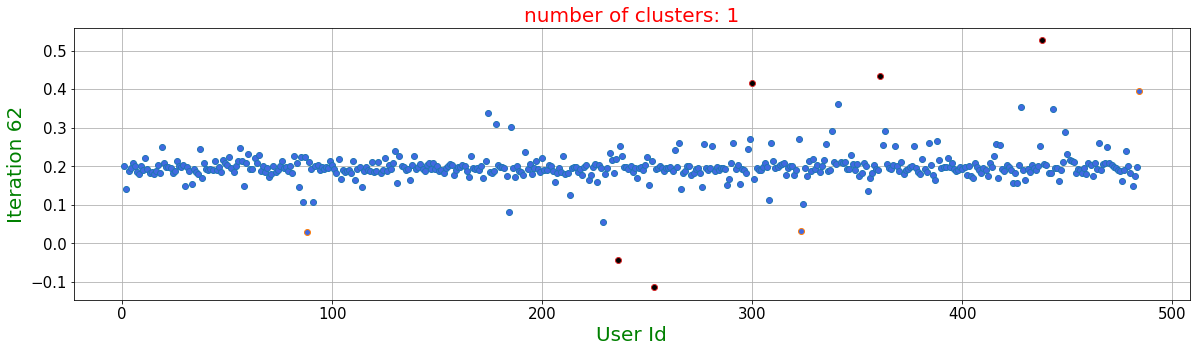

Silhouette Co-efficient:  0.877
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.338842975206612 %
----------------------------------------------------------
484
iteration  63
scale of w2:  [ -0.11280999023172704 , 0.5262040053165414 ]


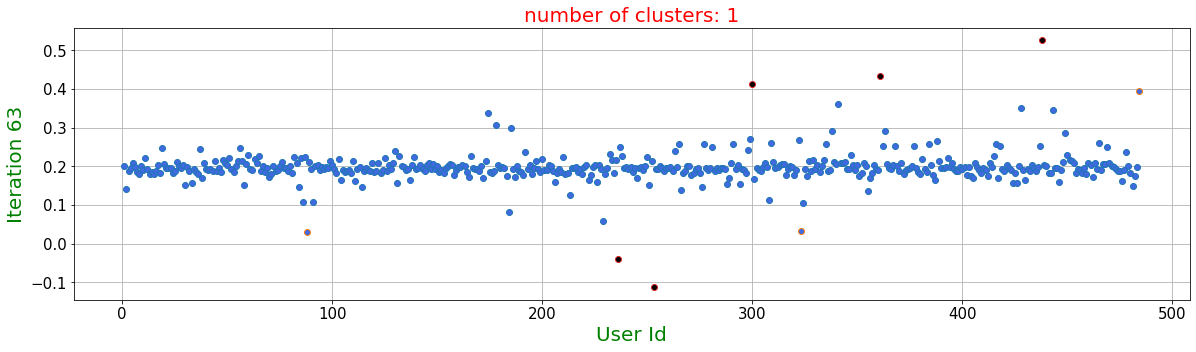

Silhouette Co-efficient:  0.878
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.71900826446281 %
----------------------------------------------------------
484
iteration  64
scale of w2:  [ -0.11138499432766621 , 0.5256663473062022 ]


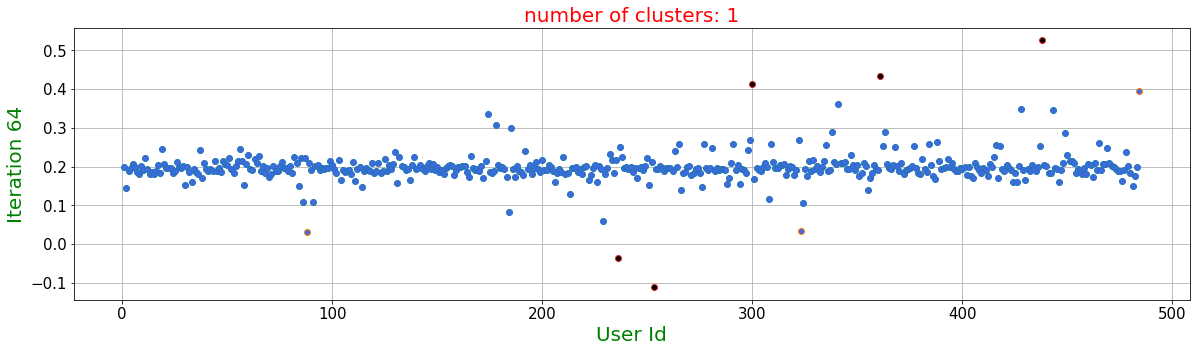

Silhouette Co-efficient:  0.879
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 2.8925619834710745 %
----------------------------------------------------------
484
iteration  65
scale of w2:  [ -0.10996516799381782 , 0.5251288542175648 ]


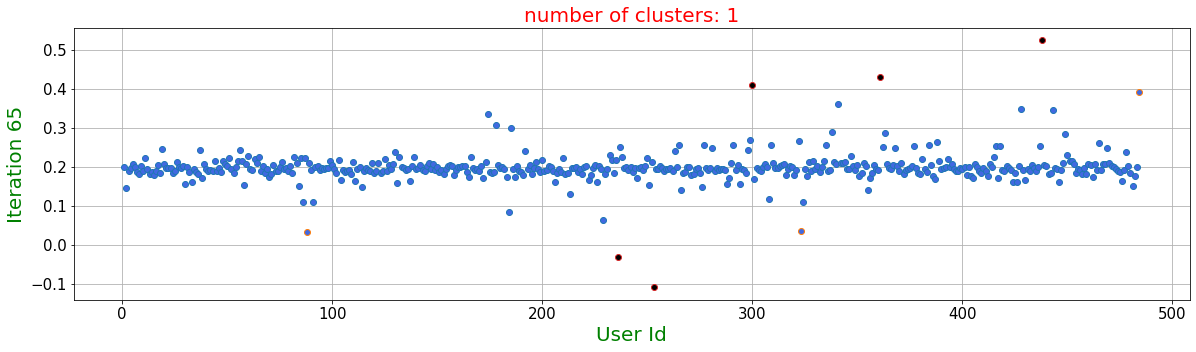

Silhouette Co-efficient:  0.88
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 2.8925619834710745 %
----------------------------------------------------------
484
iteration  66
scale of w2:  [ -0.10855052563185531 , 0.5245915422190144 ]


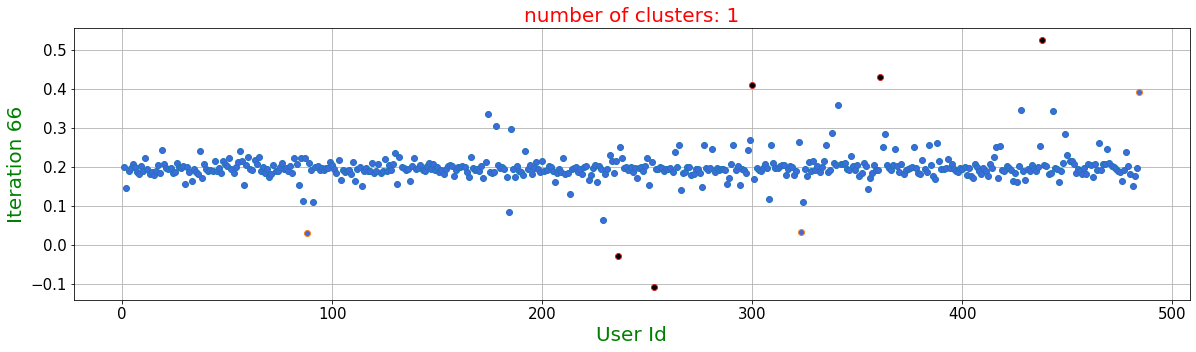

Silhouette Co-efficient:  0.881
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.3057851239669422 %
----------------------------------------------------------
484
iteration  67
scale of w2:  [ -0.1071410811473395 , 0.5240544274910476 ]


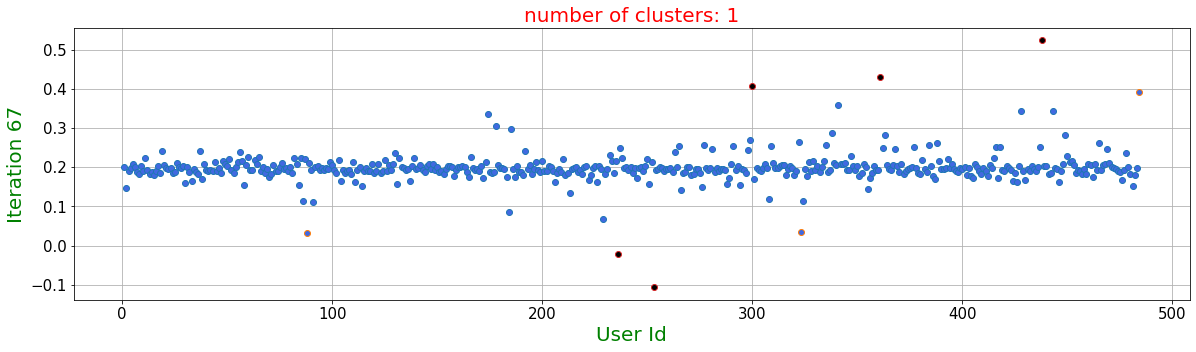

Silhouette Co-efficient:  0.881
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 2.8925619834710745 %
----------------------------------------------------------
484
iteration  68
scale of w2:  [ -0.1057368479005807 , 0.5235175261879269 ]


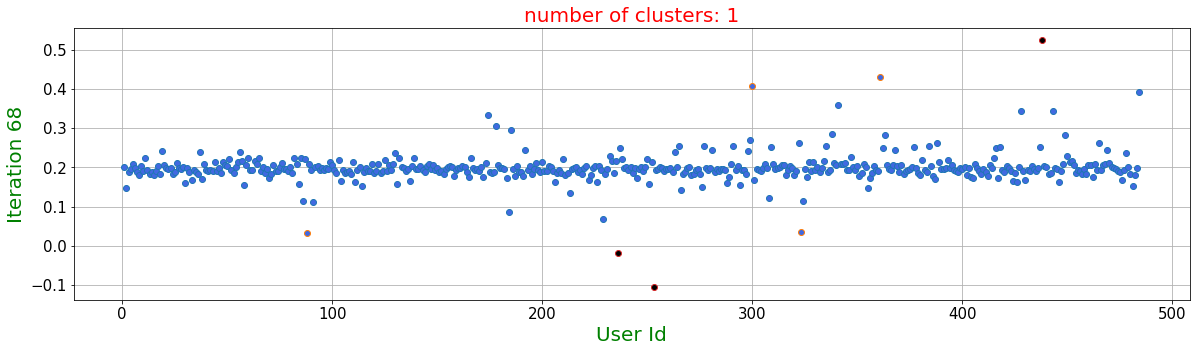

Silhouette Co-efficient:  0.892
No of users changing color :  2
Percentage of users changing color :  0.4132231404958678
----------------------------------------------------------


percentage difference: 4.958677685950414 %
----------------------------------------------------------
484
iteration  69
scale of w2:  [ -0.10433783866424397 , 0.5229808544031506 ]


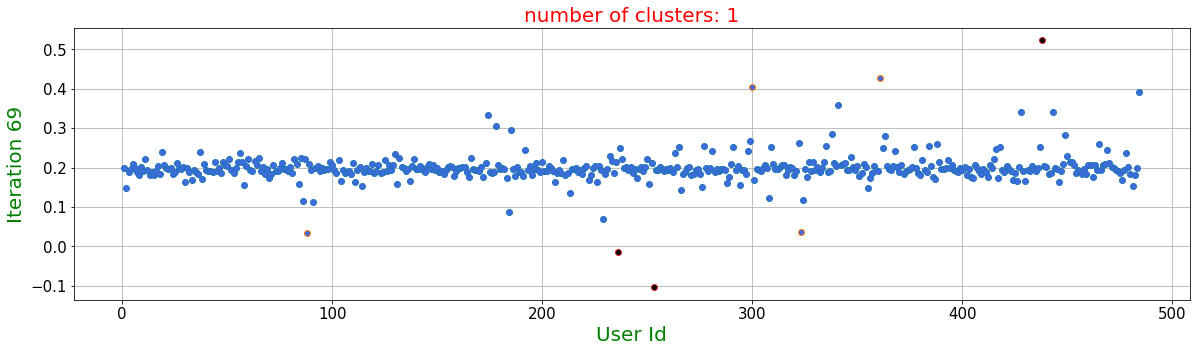

Silhouette Co-efficient:  0.892
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.3057851239669422 %
----------------------------------------------------------
484
iteration  70
scale of w2:  [ -0.10294406558710827 , 0.5224444281384338 ]


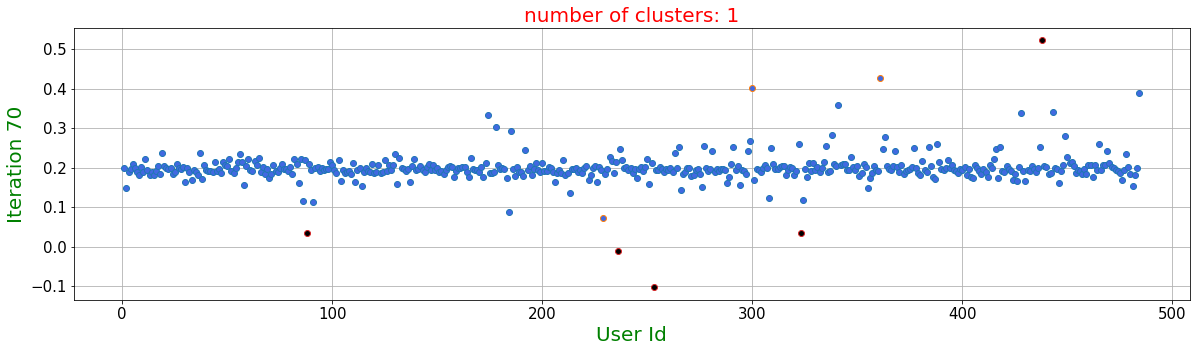

Silhouette Co-efficient:  0.878
No of users changing color :  2
Percentage of users changing color :  0.4132231404958678
----------------------------------------------------------


percentage difference: 2.479338842975207 %
----------------------------------------------------------
484
iteration  71
scale of w2:  [ -0.10155554016343593 , 0.52190826327592 ]


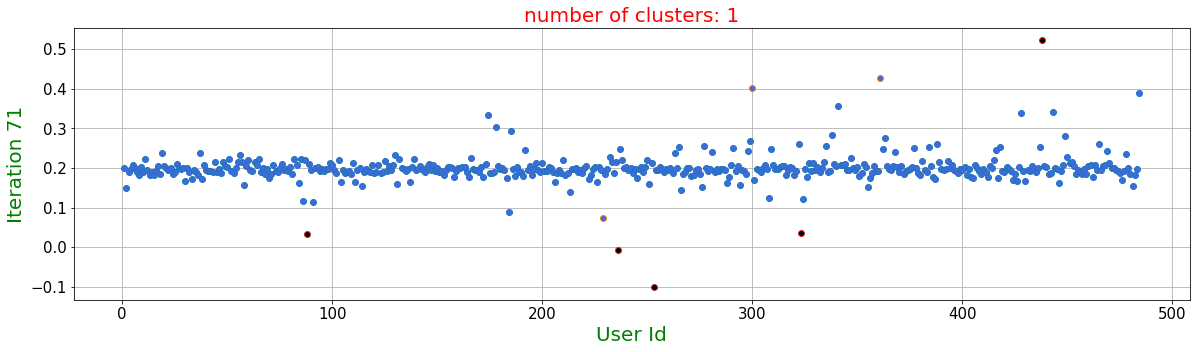

Silhouette Co-efficient:  0.879
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.0991735537190084 %
----------------------------------------------------------
484
iteration  72
scale of w2:  [ -0.10017227320745094 , 0.5213723755533602 ]


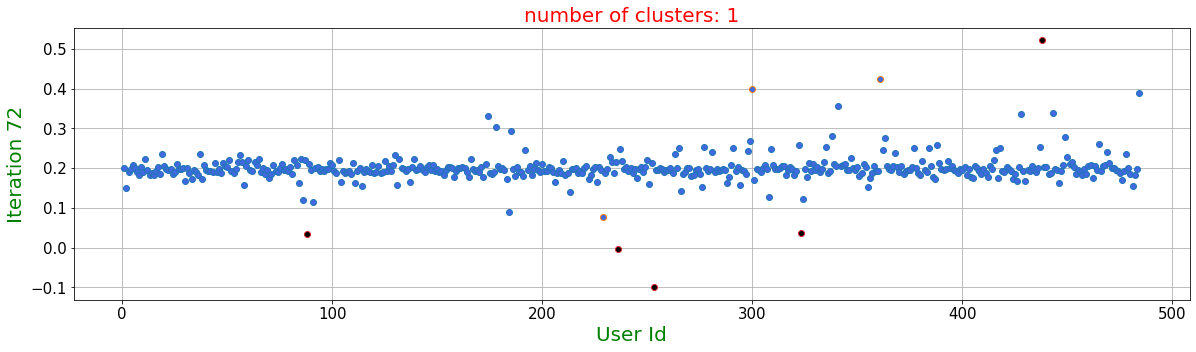

Silhouette Co-efficient:  0.88
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.71900826446281 %
----------------------------------------------------------
484
iteration  73
scale of w2:  [ -0.09879427483246328 , 0.5208367805420211 ]


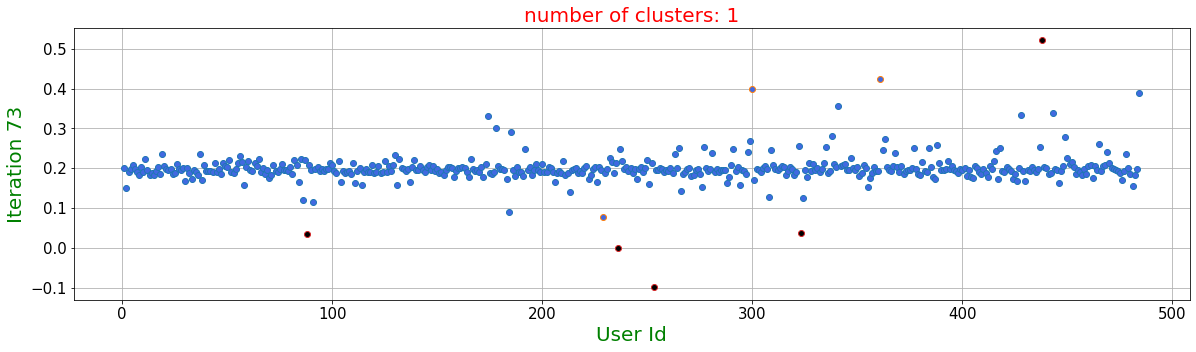

Silhouette Co-efficient:  0.881
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 2.479338842975207 %
----------------------------------------------------------
484
iteration  74
scale of w2:  [ -0.09742155443421303 , 0.5203014936270955 ]


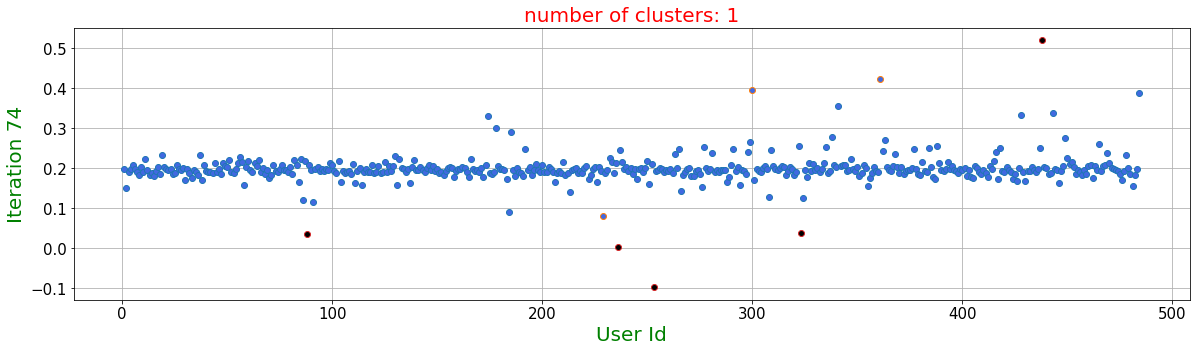

Silhouette Co-efficient:  0.882
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.71900826446281 %
----------------------------------------------------------
484
iteration  75
scale of w2:  [ -0.09605412067804088 , 0.5197665299904122 ]


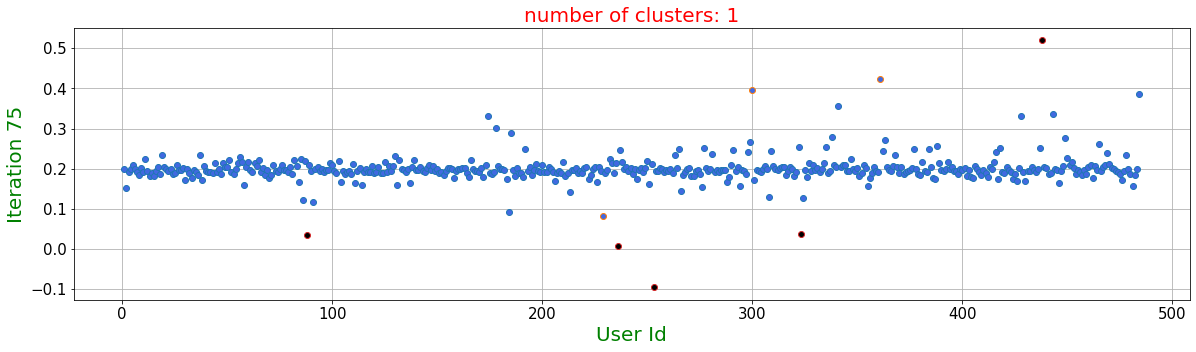

Silhouette Co-efficient:  0.883
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 2.6859504132231407 %
----------------------------------------------------------
484
iteration  76
scale of w2:  [ -0.09469198148952296 , 0.5192319045952509 ]


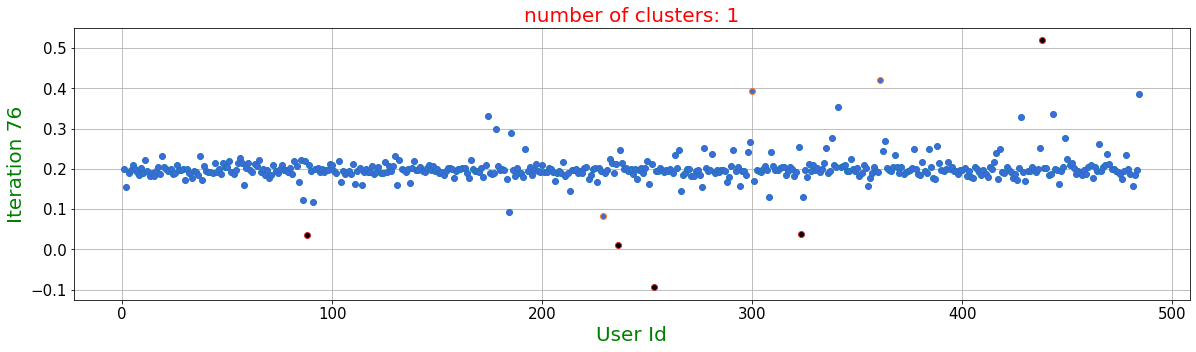

Silhouette Co-efficient:  0.884
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.512396694214876 %
----------------------------------------------------------
484
iteration  77
scale of w2:  [ -0.09333514404823648 , 0.518697632173089 ]


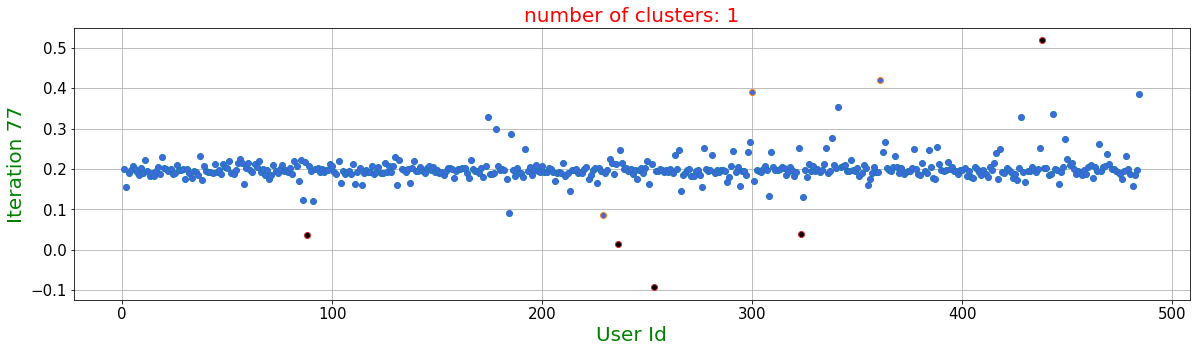

Silhouette Co-efficient:  0.885
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.3057851239669422 %
----------------------------------------------------------
484
iteration  78
scale of w2:  [ -0.09198361478434905 , 0.5181637272121138 ]


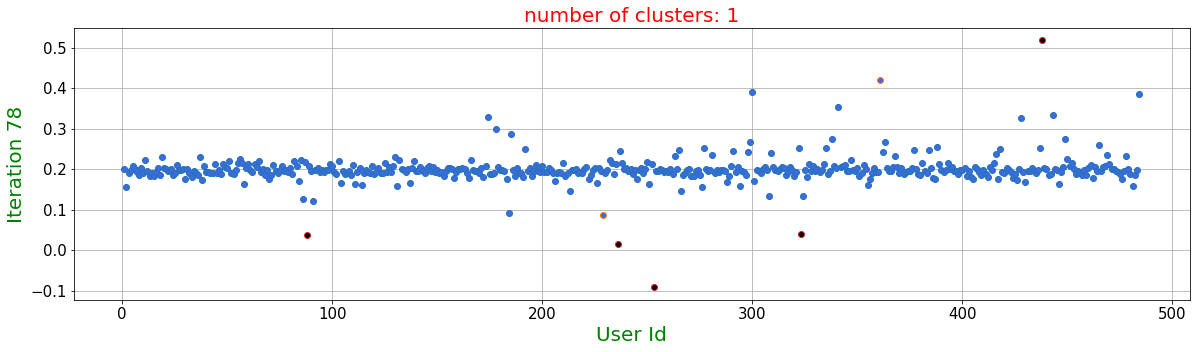

Silhouette Co-efficient:  0.885
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.132231404958678 %
----------------------------------------------------------
484
iteration  79
scale of w2:  [ -0.09063739937774912 , 0.5176302039473532 ]


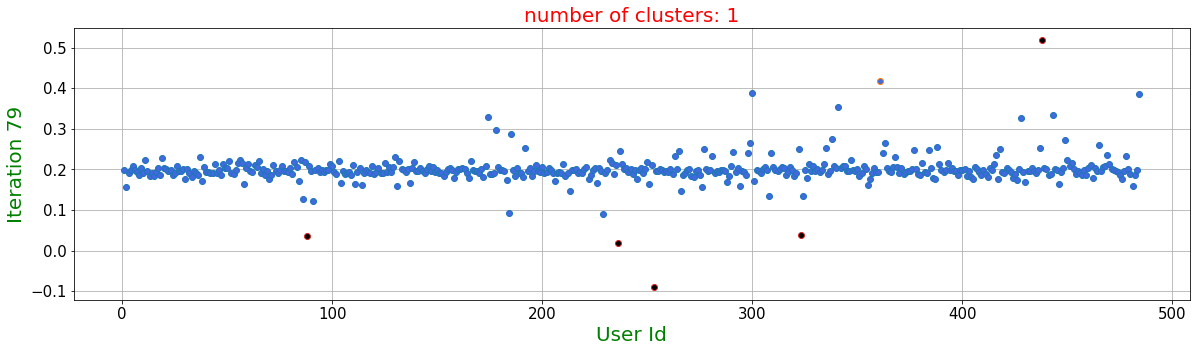

Silhouette Co-efficient:  0.886
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 1.859504132231405 %
----------------------------------------------------------
484
iteration  80
scale of w2:  [ -0.08929650275945787 , 0.5170970763522831 ]


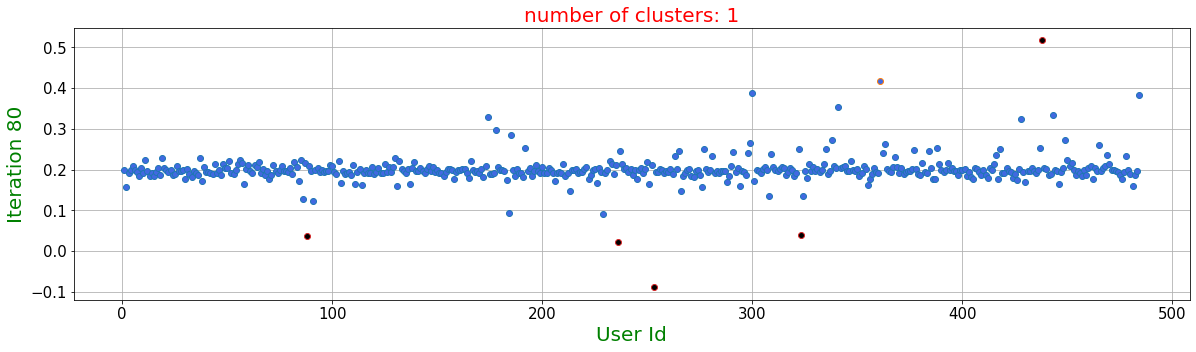

Silhouette Co-efficient:  0.887
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 1.859504132231405 %
----------------------------------------------------------
484
iteration  81
scale of w2:  [ -0.08796092911508359 , 0.5165643581317849 ]


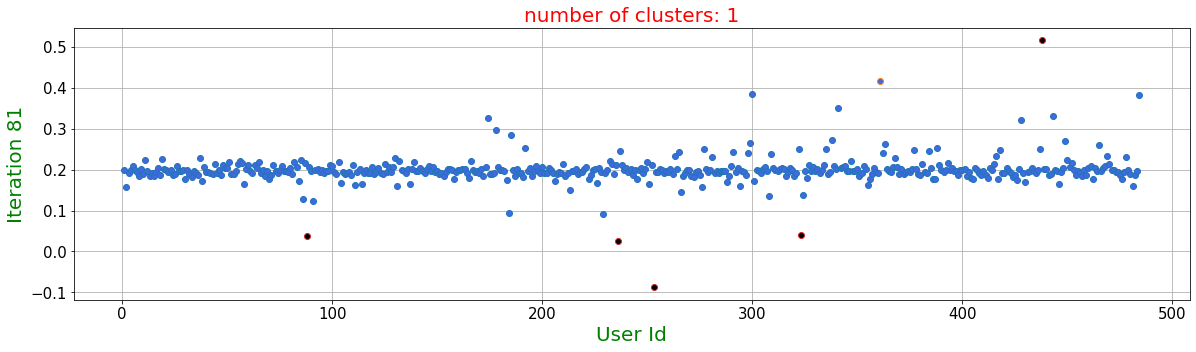

Silhouette Co-efficient:  0.888
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 2.479338842975207 %
----------------------------------------------------------
484
iteration  82
scale of w2:  [ -0.08663068189009922 , 0.5160320627163345 ]


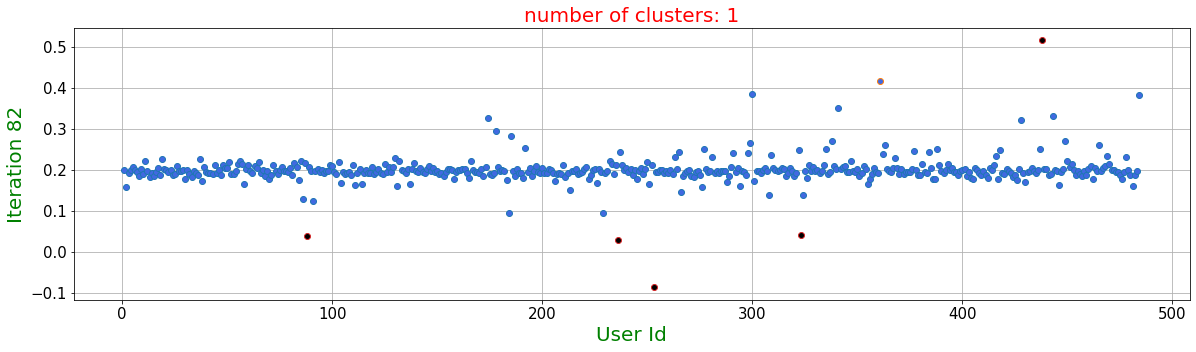

Silhouette Co-efficient:  0.889
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 1.859504132231405 %
----------------------------------------------------------
484
iteration  83
scale of w2:  [ -0.08530576379674161 , 0.5155002032573129 ]


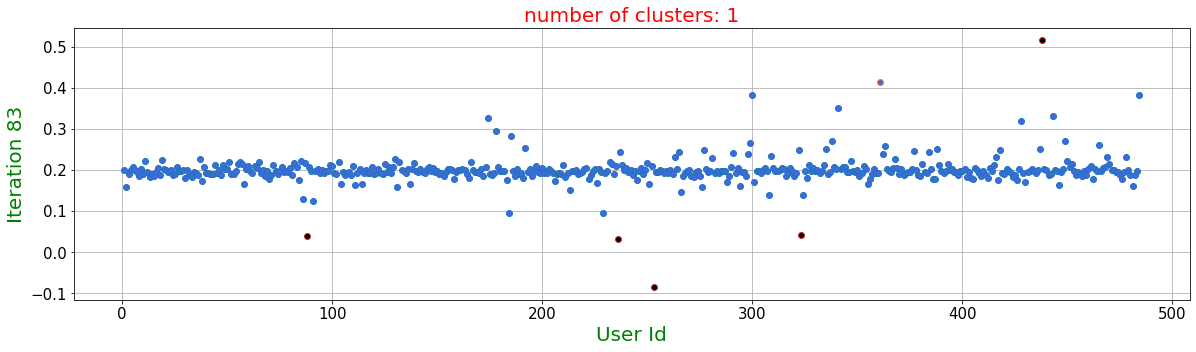

Silhouette Co-efficient:  0.889
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 1.6528925619834711 %
----------------------------------------------------------
484
iteration  84
scale of w2:  [ -0.08398617682234774 , 0.5149687926233396 ]


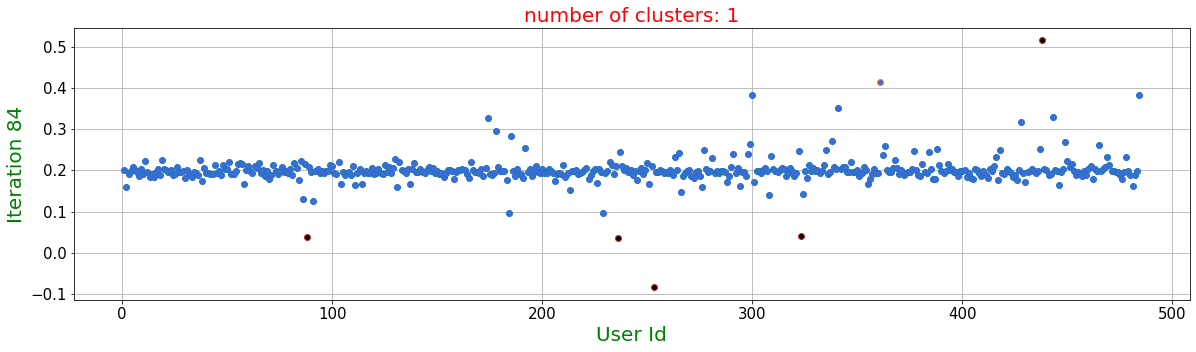

Silhouette Co-efficient:  0.89
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.0991735537190084 %
----------------------------------------------------------
484
iteration  85
scale of w2:  [ -0.08267192223895838 , 0.5144378433975337 ]


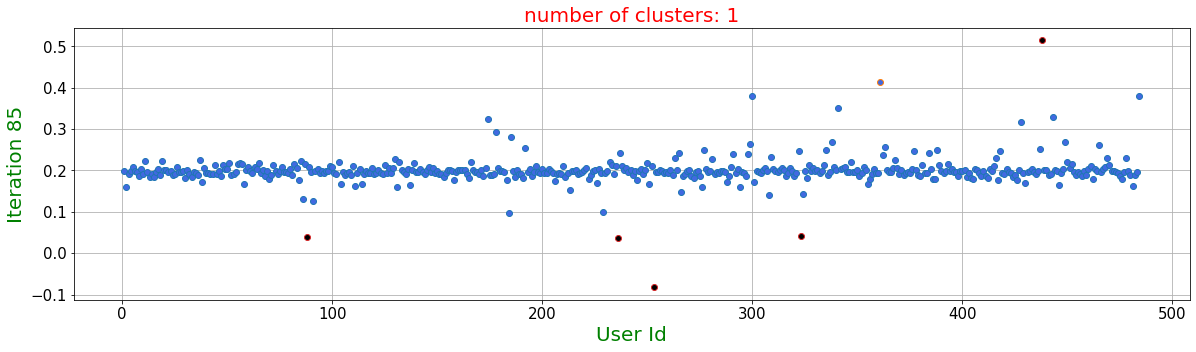

Silhouette Co-efficient:  0.891
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 0.8264462809917356 %
----------------------------------------------------------


In [ ]:
 
x=0
old_color=None
new_color=None
colorOur=[]
ss=[]
while(1):
   
    colmap = {1: 'r', 2: 'g', 3: 'b'}
    w2=[]
    for i in range (0,484):
        
        I=opinion[i];
        l=str(my_data['following'][i])
        l=l[1:-1]
        l=l.split(',')
        sumCp=0
        followerOpinion=0
        for j in range(len(l)):
          ind=int(l[j])
          cp=convin[ind]
          sumCp=sumCp+1
          followerOpinion=followerOpinion+(opinion[ind]- I )*cp
 
        followerOpinion=followerOpinion/sumCp
        b=bias[i]
        followerOpinion = followerOpinion * b 
        w2.append(followerOpinion)  
          
    lenw2=len(w2)
    for i in range (len(w2)):
      w2[i]=(w2[i]+opinion[i]) 

    #----------------------------------------------------------------------------------
  
    print("iteration ",x)
    
    print("scale of w2: ","[" ,min(w2), "," , max(w2), "]")
    mn=[]
    for p in range(0,484):
        mn.append({'x':w2[p]})
    X = pd.DataFrame(mn,columns=['x'])
        # X.head()
    # dbscan(cluster,0.0375,4)
    
    db_default = DBSCAN(eps = 0.0375, min_samples = 4).fit(X) 
    # print(type(db_default))
    labels = db_default.labels_ 
    new_color=labels[:]
    core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool) 
    core_samples_mask[db_default.core_sample_indices_] = True
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
   
    unique_labels = set(labels) 
    # print('labels ',labels)
    # print('new_color ',new_color)
    # print('unique_labels ',unique_labels)
    colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
   

    plt.figure(figsize =(20, 5)) 
    plt.rc('xtick',labelsize=15,color='black')
    plt.rc('ytick',labelsize=15,color='black')
    
    # plt.xlim(-1.2, 1.2)
    # plt.ylim(-1.2, 1.2)
    plt.xlabel('User Id',fontsize=20,color='green')
    ystring='Iteration '+str(x)
    plt.ylabel(ystring,fontsize=20,color='green')
    plt.grid(True)
    for k, col in zip(unique_labels, colors): 
          if k == -1: 
              # Black used for noise. 
              col = [0, 0, 0, 1]

          
          class_member_mask = (labels == k) 
          
          idarr=[]
          xy = X[class_member_mask & core_samples_mask] 
          for l in range(len(class_member_mask)):
            if(class_member_mask[l]== True and core_samples_mask[l]==True ):
              idarr.append(l+1)
         
          plt.plot(idarr,xy.iloc[:, 0],  'o', markerfacecolor=col,markersize=6) 
        
          
          idarr=[]
          xy = X[class_member_mask & ~core_samples_mask]          
          for l in range(len(class_member_mask)):
            if(class_member_mask[l]== True and core_samples_mask[l]==False ):
              idarr.append(l+1)
          plt.plot(idarr,xy.iloc[:, 0], 'o', markerfacecolor=col,markersize=6)
    
    plt.title('number of clusters: %d' %n_clusters_,fontsize=20,color='red') 
    plt.show() 
    strfss="{0:.3f}"
    fss= metrics.silhouette_score(X,labels)
    strss=strfss.format(fss)
    ss.append(float(strss))
   
    print('Silhouette Co-efficient: ',float(strss))
    change=0 
    if x!=0:
        for p in range(0,484):
            if old_color[p]!=new_color[p] :
                change = change+1
#                print("index of person who changed opinion ",p)
    print("No of users changing color : ",change)
    change = (change/484)*100
    print("Percentage of users changing color : ",change)
    print("----------------------------------------------------------")
    colorOur.append(change)
    old_color=new_color[:]
    #----------------------------------------------------------------------------------
    strf="{0:.2f}"
    cnt=0;
    for i in range(lenw2):      
      if( (strf.format(w2[i]))  !=  (strf.format(opinion[i]))   ):
        cnt=cnt+1

    cnt=(cnt/lenw2)*100
    print('\n')
    print("percentage difference:",cnt,"%")
    print("----------------------------------------------------------")
   
    x=x+1
    if(cnt<1):
      break

    for i in range(len(w2)):
      opinion[i]=w2[i]
    print(len(opinion))

In [ ]:
old_color

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
diffDBSCAN=[]
for i in range(len(old_color)):
  diffDBSCAN.append(old_color[i])

In [ ]:
one=0
two=0
third=0
for i in range(0,484):  
  if(diffDBSCAN[i]==0):
    diffDBSCAN[i]=3
  if(diffDBSCAN[i]==-1):
    diffDBSCAN[i]=2
  
# print(one,two,third)

In [ ]:
diffDBSCAN

In [ ]:
one=0
two=0
third=0
for i in range(0,484):  
  if(old_color[i]==0):
    one=one+1
  if(old_color[i]==1):
    two=two+1
  if(old_color[i]==-1):
    third=third+1
print(one,two,third)

479 0 5


In [ ]:
diffDBSCANOrg=old_color[:]

In [ ]:
diffDBSCAN=pd.DataFrame(diffDBSCAN,columns=['Cluster No'])

In [ ]:
diffDBSCAN.to_csv('DiffClusterNumberDBSCAN.csv')

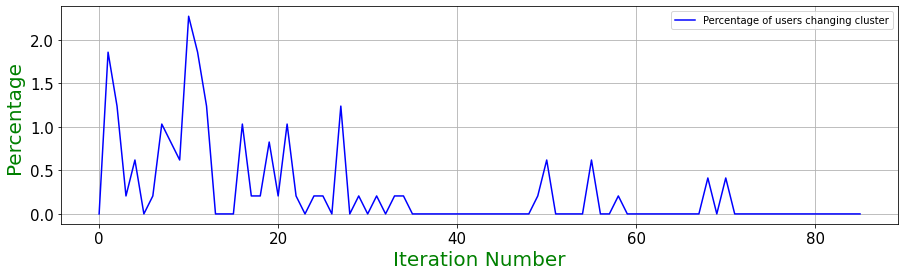

In [ ]:
plt.figure(figsize=(15,4))
l1, = plt.plot(colorOur, 'b')
plt.grid(True)
plt.xlabel('Iteration Number',fontsize=20,color='green')
plt.ylabel('Percentage ',fontsize=20,color='green')

plt.legend(['Percentage of users changing cluster'], loc='upper right')
plt.show()

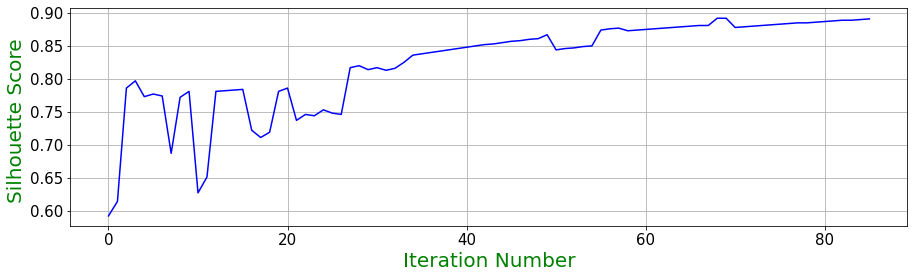

In [ ]:
plt.figure(figsize=(15,4))
l1, = plt.plot(ss, 'b')
plt.grid(True)
plt.xlabel('Iteration Number',fontsize=20,color='green')
plt.ylabel('Silhouette Score ',fontsize=20,color='green')

# plt.legend(['Percentage of users changing cluster'], loc='upper right')
plt.show()

In [ ]:
ourColor=pd.DataFrame(colorOur,columns=['Percentage'])

In [ ]:
ourColor.to_csv('PercentageClusterDBSCAN.csv')

#CLUSTER COMPARISON METRICS 
#BE SURE TO RUN CODE OF diffCluster and diffDBSCAN 

In [ ]:
metrics.homogeneity_completeness_v_measure(diffCluster,diffDBSCAN)

(0.2565514132018114, 0.4838462350950375, 0.3353101827688127)

In [ ]:
metrics.homogeneity_completeness_v_measure(diffDBSCAN,diffCluster)

(0.4838462350950375, 0.2565514132018114, 0.3353101827688127)

In [ ]:
 metrics.adjusted_mutual_info_score(diffCluster,diffDBSCAN)

0.3307951673141164

In [ ]:
 metrics.adjusted_mutual_info_score(diffDBSCAN,diffCluster)

0.33079516731411657

In [ ]:
metrics.adjusted_rand_score(diffCluster,diffDBSCAN)

0.484344865734433

#RUN AFTER RUNNING K-MEANS CODE

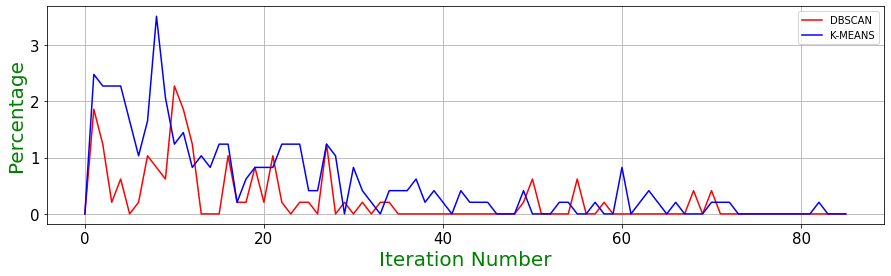

In [ ]:
plt.figure(figsize=(15,4))
plt.rc('xtick',labelsize=15,color='black')
plt.rc('ytick',labelsize=15,color='black')
# plt.grid(True)
plt.xlabel('Iteration Number',fontsize=20,color='green')
plt.ylabel('Percentage',fontsize=20,color='green')
l1, = plt.plot(colorOur, 'r')
l2, = plt.plot(colorOurKMEANS, 'b')
# l3, = plt.plot(Flocking, 'g')
# l3, = plt.plot(FlockingwithLen, 'g')
# l5, = plt.plot(ourwithLen,'m')
plt.legend(['DBSCAN', 'K-MEANS'], loc='upper right')
plt.grid(True)

plt.show()

#NOW CODE FOR KMEANS OUR MODEL STARTS  RUN EVERY CELL SERIALLY

In [ ]:
def assignment(means):
    for i in means.keys():
        cluster['distance_from_{}'.format(i)] = abs(
                cluster['y'] - means[i][0]
        )
    means_distance_cols = ['distance_from_{}'.format(i) for i in means.keys()]
    cluster['closest'] = cluster.loc[:, means_distance_cols].idxmin(axis=1)
    cluster['closest'] = cluster['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    cluster['color'] = cluster['closest'].map(lambda x: colmap[x])
    return cluster

In [ ]:
opinion=w1[:]
bias=bs[:]
convin=v[:]

In [ ]:
idarr=[]
for i in range (0,484):
  idarr.append(i+1)

iteration  0
scale of w2:  [ -0.7887266554219914 , 0.771704137787773 ]


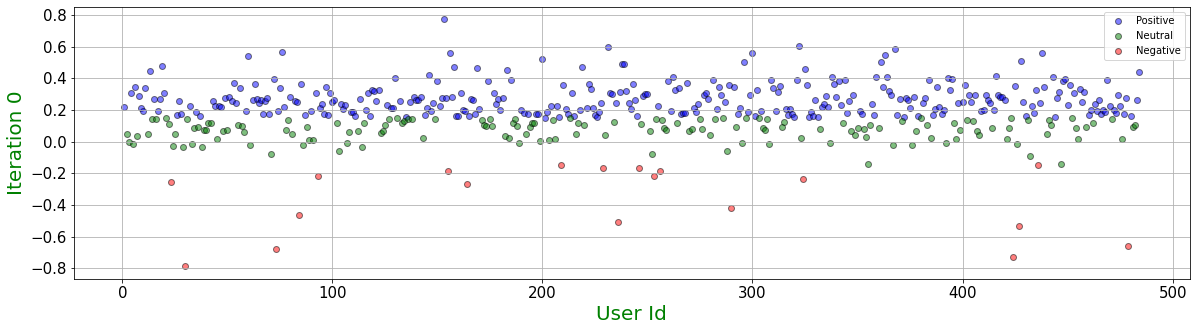



percentage difference: 62.1900826446281 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
Initial Noted
iteration  1
scale of w2:  [ -0.7432438913386514 , 0.6626263976533107 ]


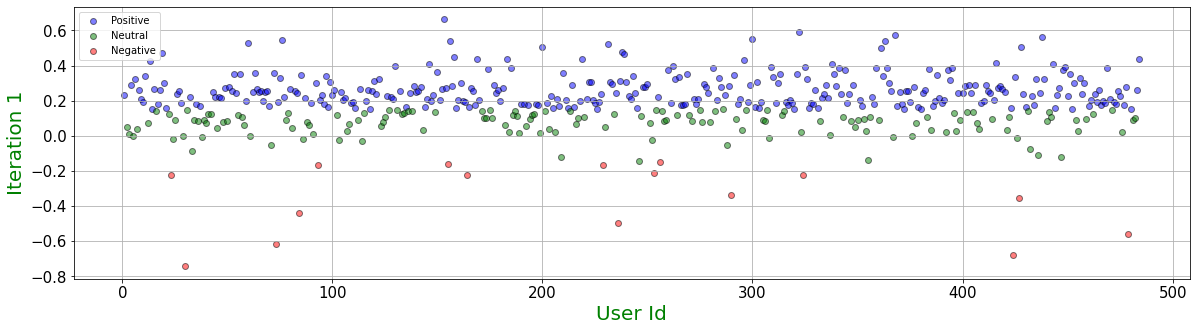



percentage difference: 60.537190082644635 %
No of users changing color :  12
Percentage of users changing color :  2.479338842975207
----------------------------------------------------------
484
iteration  2
scale of w2:  [ -0.6999250205035682 , 0.576654280061109 ]


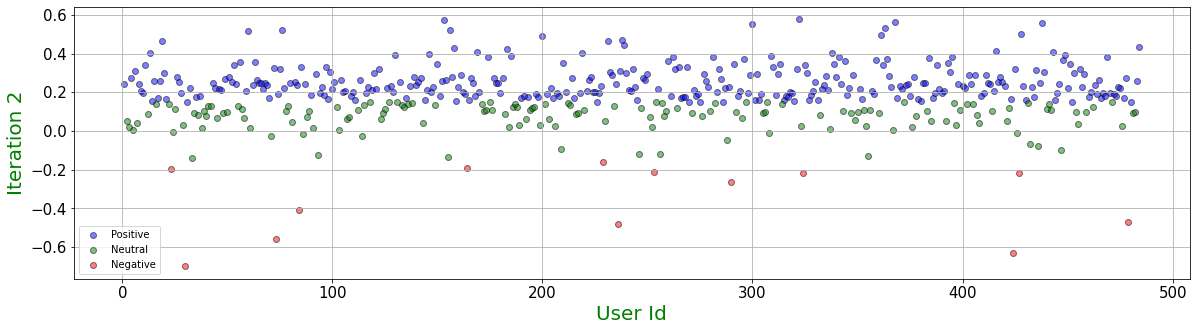



percentage difference: 54.958677685950406 %
No of users changing color :  11
Percentage of users changing color :  2.272727272727273
----------------------------------------------------------
484
iteration  3
scale of w2:  [ -0.6586524110815831 , 0.5645298150498017 ]


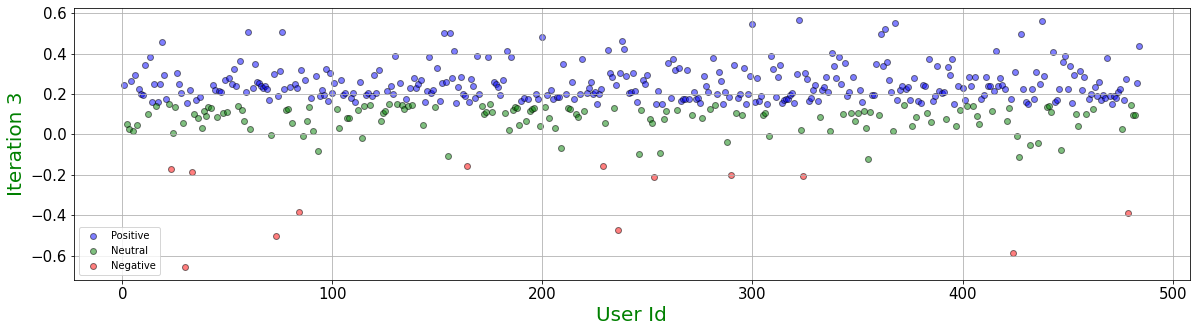



percentage difference: 51.2396694214876 %
No of users changing color :  11
Percentage of users changing color :  2.272727272727273
----------------------------------------------------------
484
iteration  4
scale of w2:  [ -0.6193167138926398 , 0.5586720032362881 ]


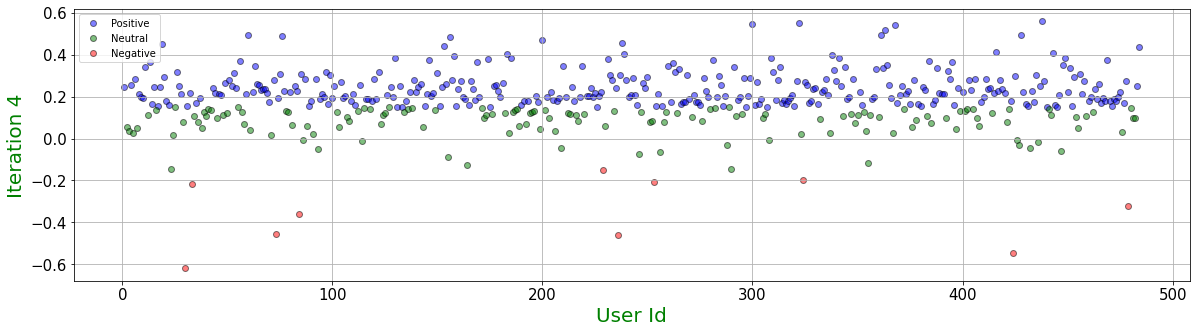



percentage difference: 52.892561983471076 %
No of users changing color :  11
Percentage of users changing color :  2.272727272727273
----------------------------------------------------------
484
iteration  5
scale of w2:  [ -0.5818161123234713 , 0.558045198104204 ]


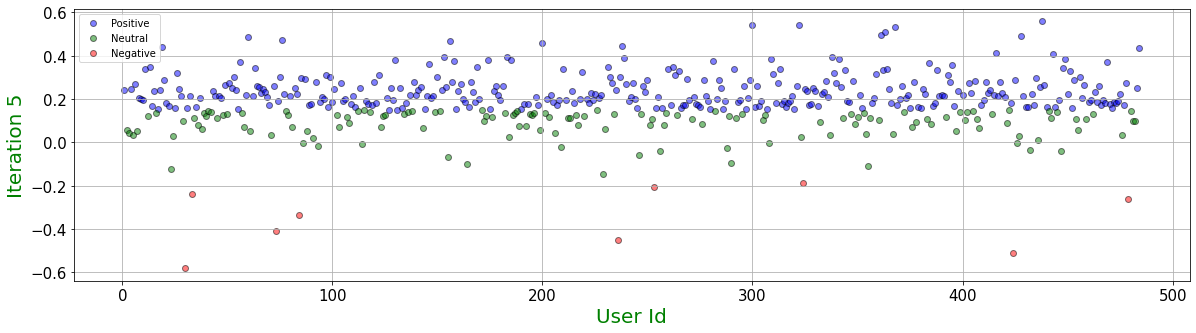



percentage difference: 48.553719008264466 %
No of users changing color :  8
Percentage of users changing color :  1.6528925619834711
----------------------------------------------------------
484
iteration  6
scale of w2:  [ -0.5460556335409954 , 0.5574281658465855 ]


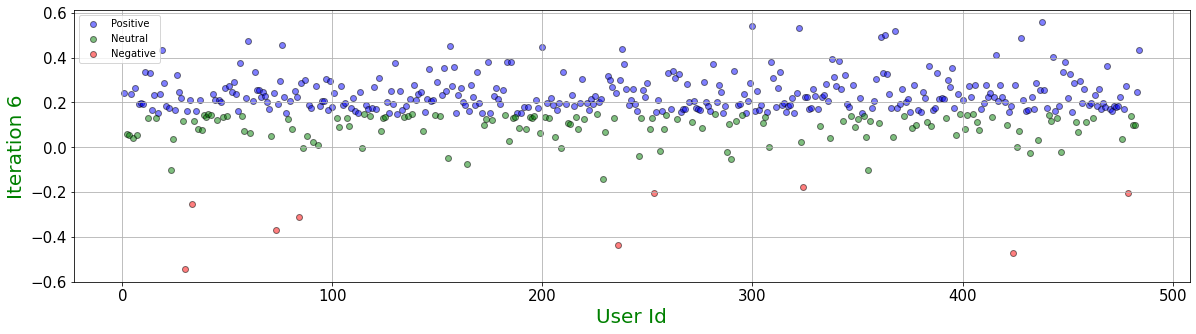



percentage difference: 42.768595041322314 %
No of users changing color :  5
Percentage of users changing color :  1.0330578512396695
----------------------------------------------------------
484
iteration  7
scale of w2:  [ -0.5119465300605867 , 0.556819900166078 ]


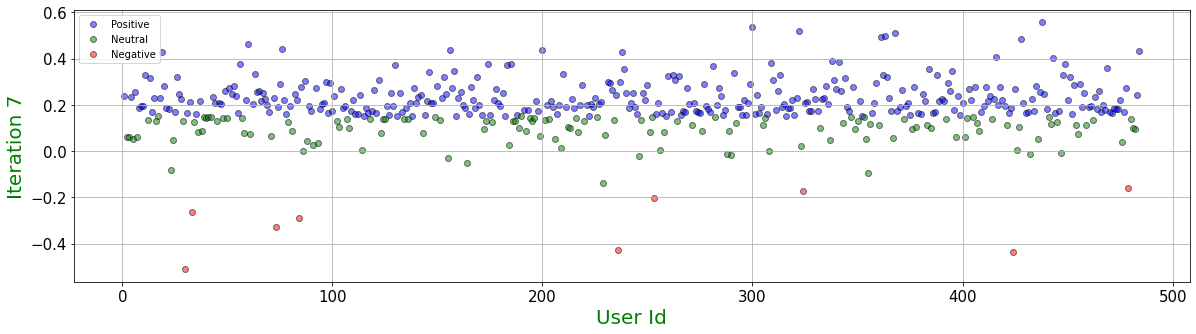



percentage difference: 42.14876033057851 %
No of users changing color :  8
Percentage of users changing color :  1.6528925619834711
----------------------------------------------------------
484
iteration  8
scale of w2:  [ -0.47940572910062546 , 0.5562195029534178 ]


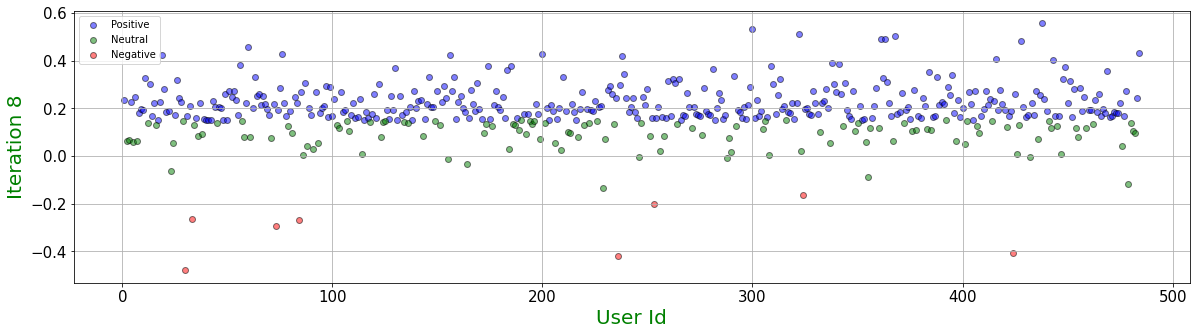



percentage difference: 37.1900826446281 %
No of users changing color :  17
Percentage of users changing color :  3.512396694214876
----------------------------------------------------------
484
iteration  9
scale of w2:  [ -0.44835534321796944 , 0.555626170670206 ]


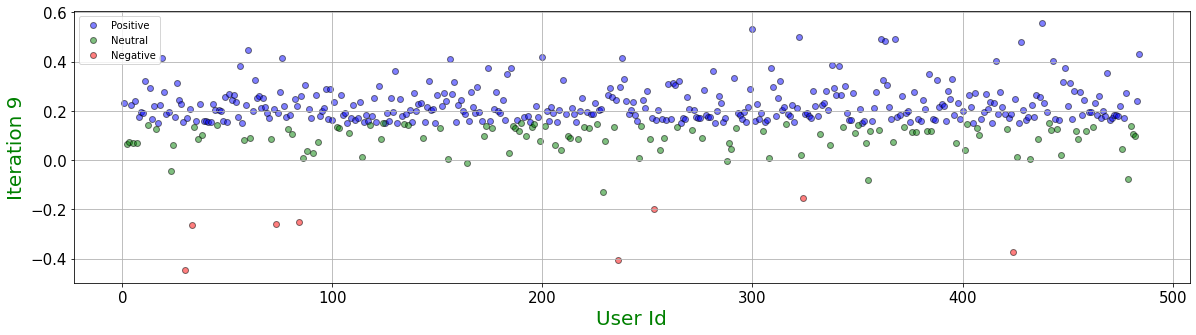



percentage difference: 34.710743801652896 %
No of users changing color :  10
Percentage of users changing color :  2.066115702479339
----------------------------------------------------------
484
iteration  10
scale of w2:  [ -0.41872223494240896 , 0.5550391827113642 ]


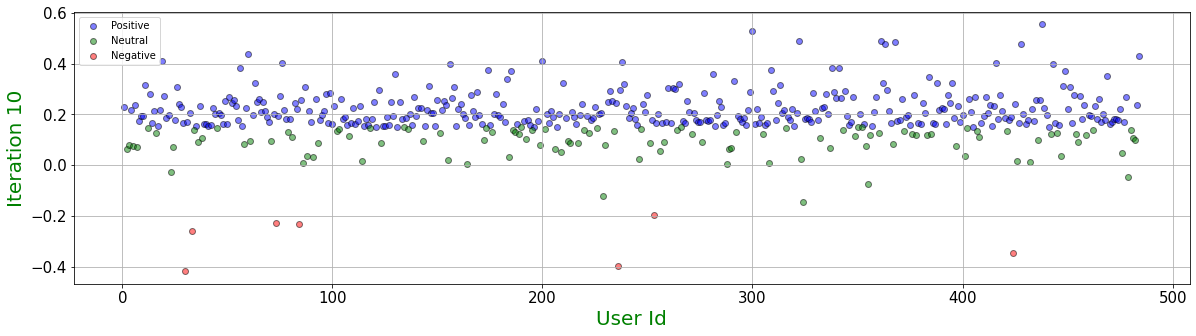



percentage difference: 32.438016528925615 %
No of users changing color :  6
Percentage of users changing color :  1.2396694214876034
----------------------------------------------------------
484
iteration  11
scale of w2:  [ -0.39043762855023306 , 0.5544578914543916 ]


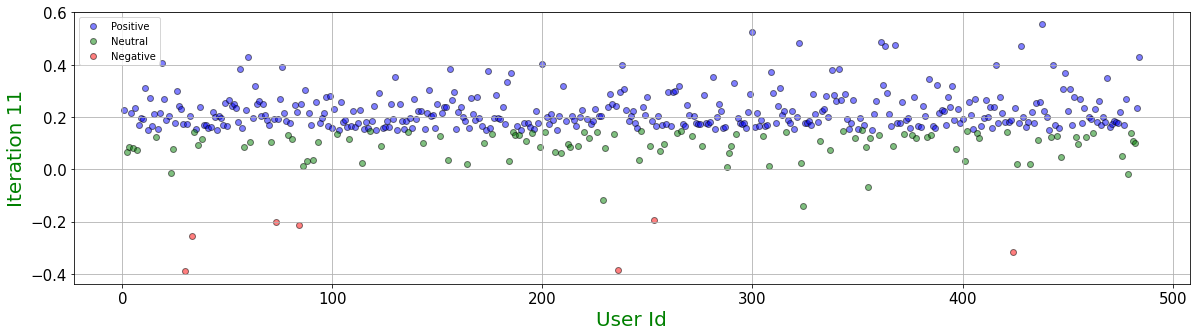



percentage difference: 29.75206611570248 %
No of users changing color :  7
Percentage of users changing color :  1.4462809917355373
----------------------------------------------------------
484
iteration  12
scale of w2:  [ -0.37699379382470144 , 0.5538817137379858 ]


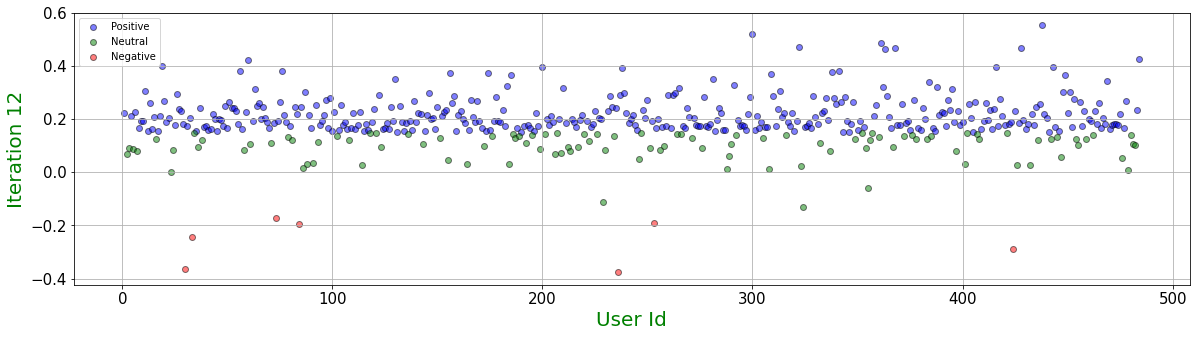



percentage difference: 27.685950413223143 %
No of users changing color :  4
Percentage of users changing color :  0.8264462809917356
----------------------------------------------------------
484
iteration  13
scale of w2:  [ -0.36733295859926707 , 0.5533101235479936 ]


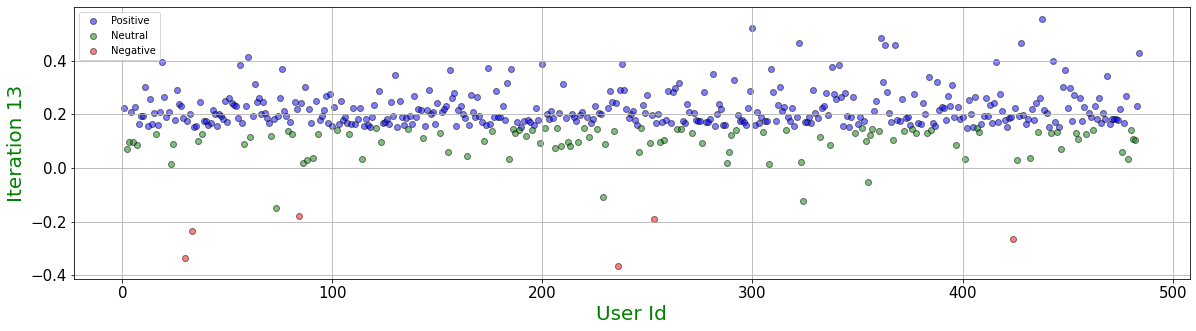



percentage difference: 25.206611570247933 %
No of users changing color :  5
Percentage of users changing color :  1.0330578512396695
----------------------------------------------------------
484
iteration  14
scale of w2:  [ -0.3578220866321449 , 0.5527426457214188 ]


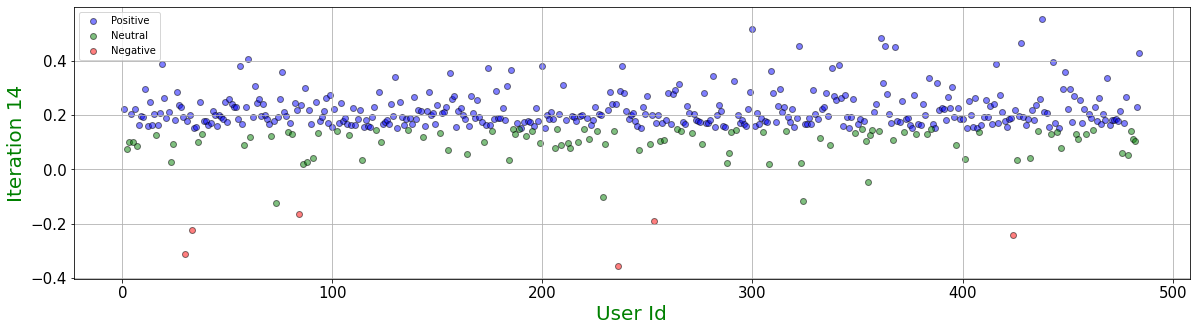



percentage difference: 23.553719008264462 %
No of users changing color :  4
Percentage of users changing color :  0.8264462809917356
----------------------------------------------------------
484
iteration  15
scale of w2:  [ -0.34845904276302586 , 0.5521788505083588 ]


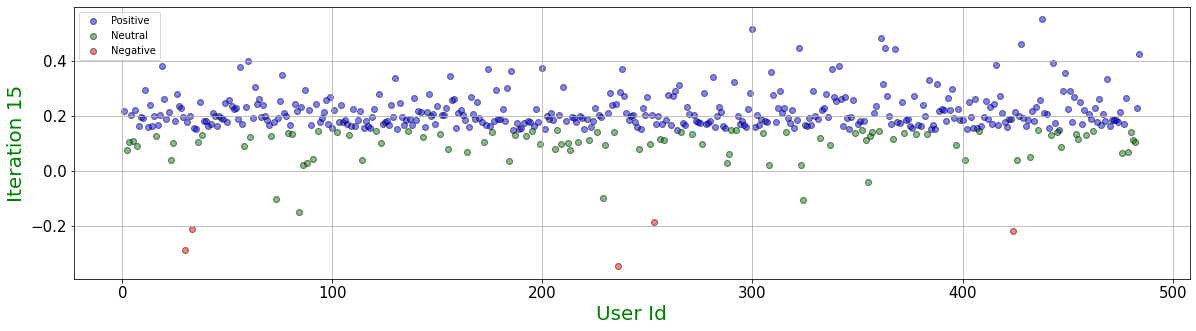



percentage difference: 25.413223140495866 %
No of users changing color :  6
Percentage of users changing color :  1.2396694214876034
----------------------------------------------------------
484
iteration  16
scale of w2:  [ -0.3392417719848225 , 0.5516183488570929 ]


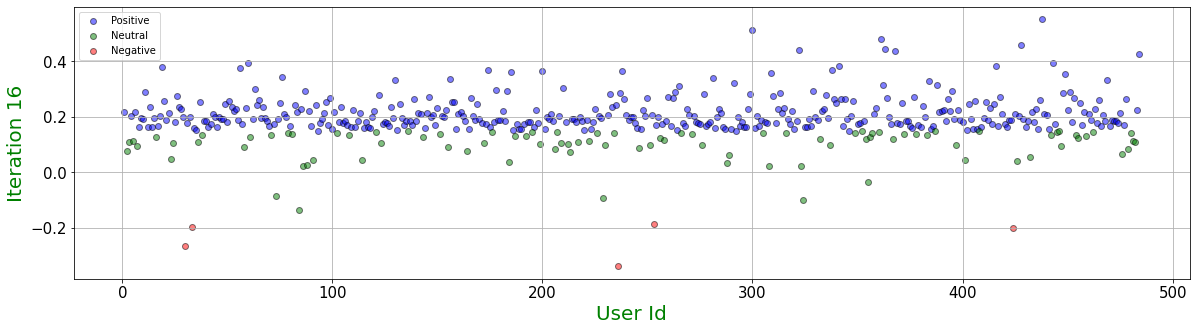



percentage difference: 18.181818181818183 %
No of users changing color :  6
Percentage of users changing color :  1.2396694214876034
----------------------------------------------------------
484
iteration  17
scale of w2:  [ -0.3301682820109932 , 0.5510607883093005 ]


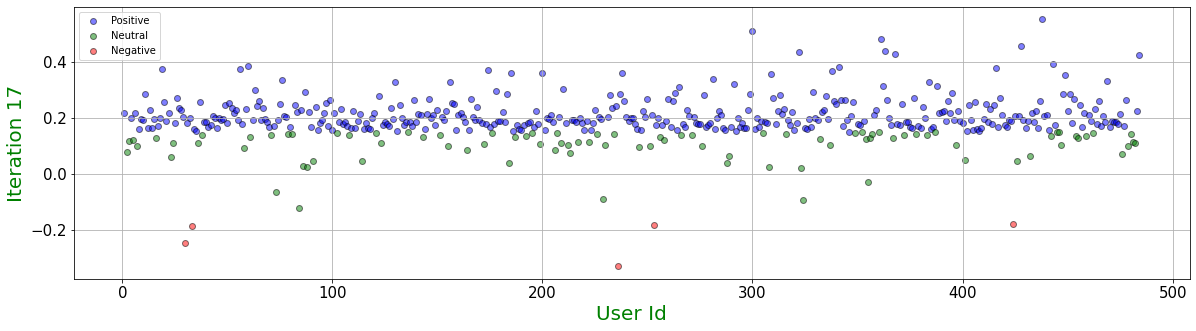



percentage difference: 22.31404958677686 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  18
scale of w2:  [ -0.32123663120002277 , 0.5505058494108631 ]


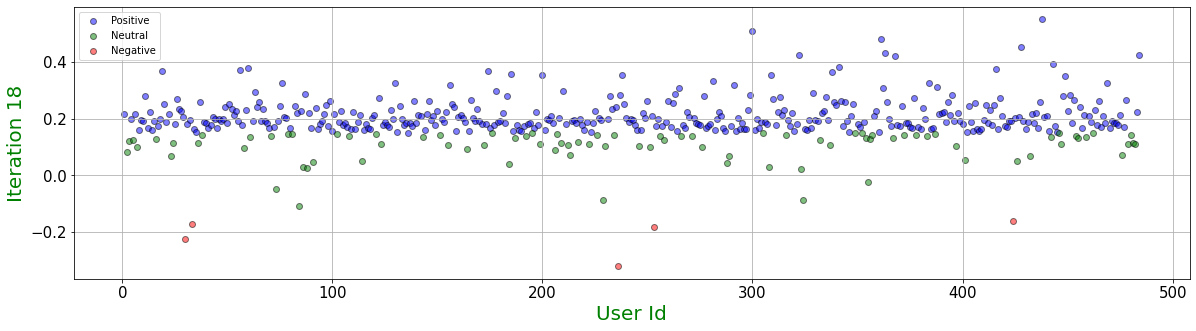



percentage difference: 19.421487603305785 %
No of users changing color :  3
Percentage of users changing color :  0.6198347107438017
----------------------------------------------------------
484
iteration  19
scale of w2:  [ -0.31244492013430986 , 0.5499532425593099 ]


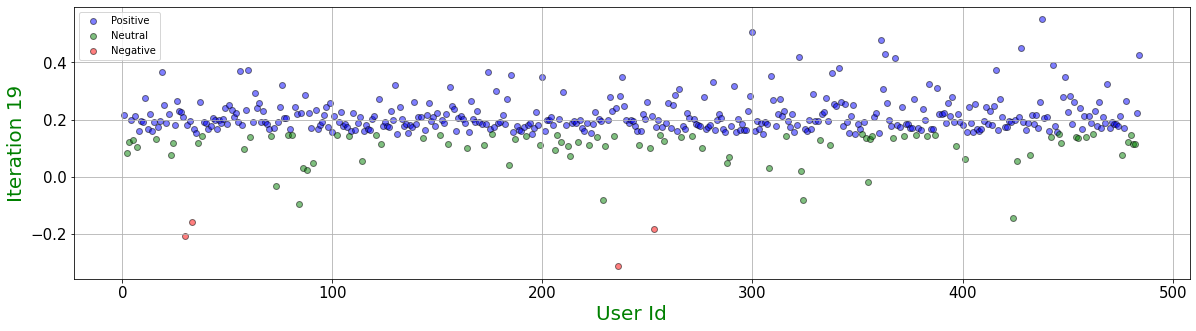



percentage difference: 16.735537190082646 %
No of users changing color :  4
Percentage of users changing color :  0.8264462809917356
----------------------------------------------------------
484
iteration  20
scale of w2:  [ -0.30379128566127606 , 0.549402705222063 ]


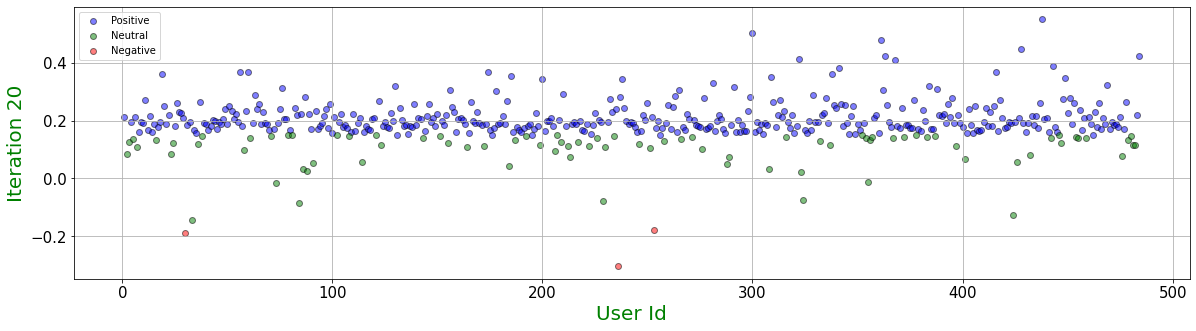



percentage difference: 16.528925619834713 %
No of users changing color :  4
Percentage of users changing color :  0.8264462809917356
----------------------------------------------------------
484
iteration  21
scale of w2:  [ -0.2952738965720316 , 0.5488539994706021 ]


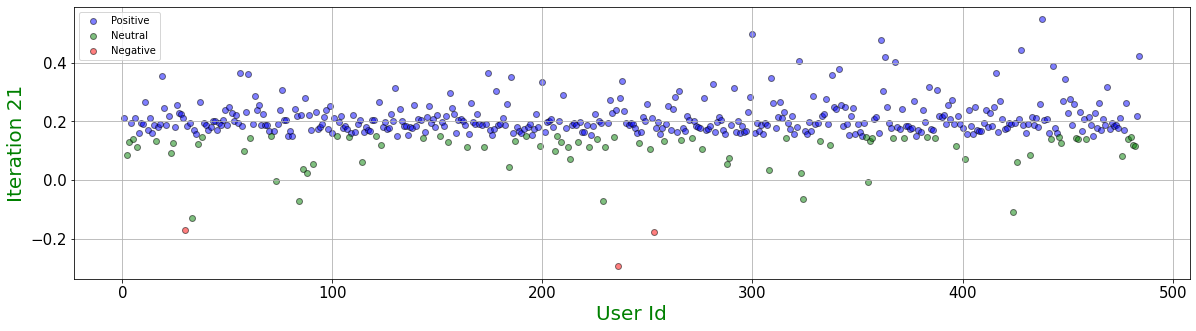



percentage difference: 14.049586776859504 %
No of users changing color :  4
Percentage of users changing color :  0.8264462809917356
----------------------------------------------------------
484
iteration  22
scale of w2:  [ -0.28689095035559004 , 0.5483069097848021 ]


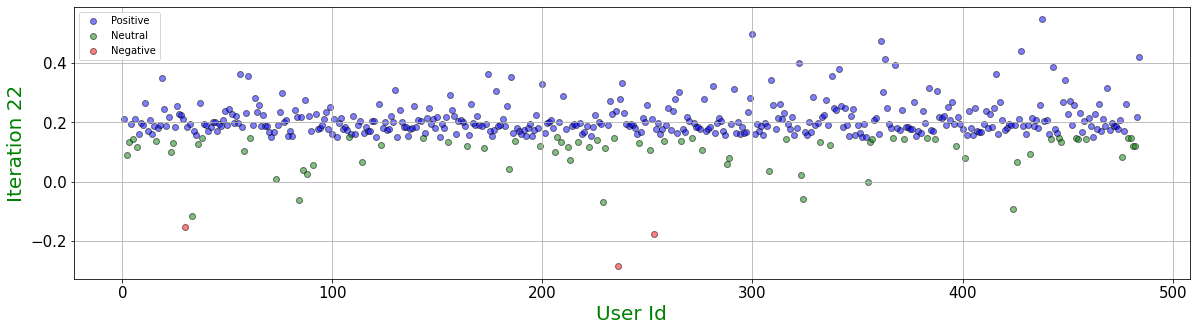



percentage difference: 16.94214876033058 %
No of users changing color :  6
Percentage of users changing color :  1.2396694214876034
----------------------------------------------------------
484
iteration  23
scale of w2:  [ -0.2786406706526764 , 0.5477612410893001 ]


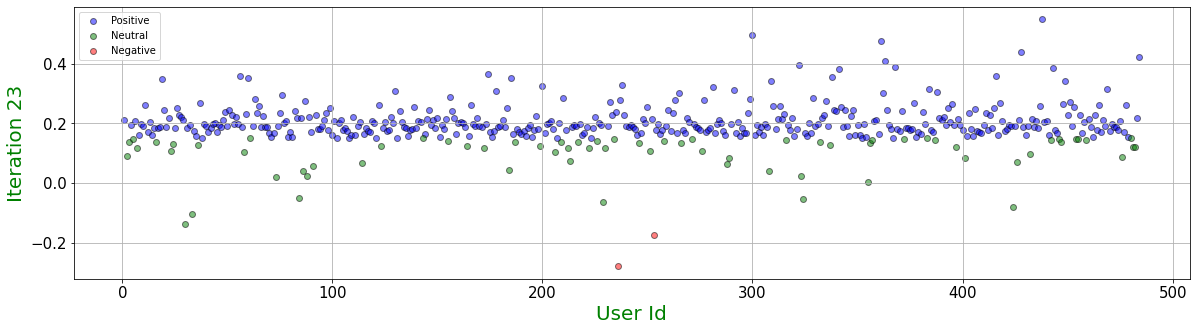



percentage difference: 15.495867768595042 %
No of users changing color :  6
Percentage of users changing color :  1.2396694214876034
----------------------------------------------------------
484
iteration  24
scale of w2:  [ -0.2705213051635006 , 0.5472168169900498 ]


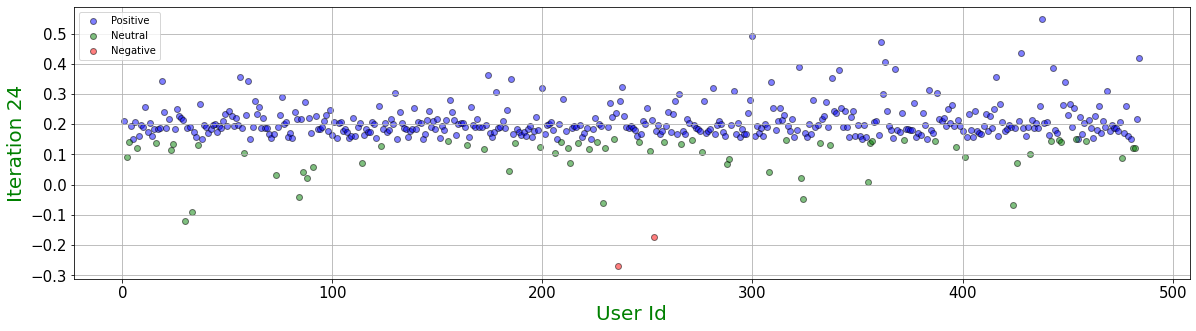



percentage difference: 14.669421487603307 %
No of users changing color :  6
Percentage of users changing color :  1.2396694214876034
----------------------------------------------------------
484
iteration  25
scale of w2:  [ -0.26253112385388416 , 0.546673478184449 ]


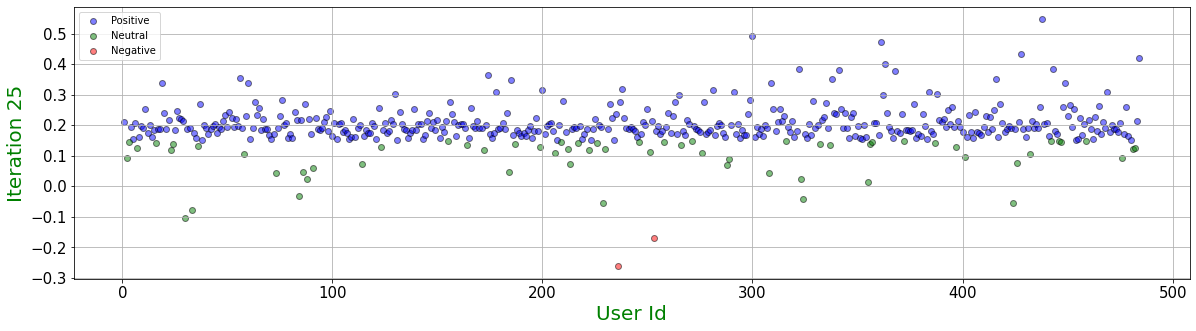



percentage difference: 9.710743801652892 %
No of users changing color :  2
Percentage of users changing color :  0.4132231404958678
----------------------------------------------------------
484
iteration  26
scale of w2:  [ -0.2546684173651888 , 0.5461310810227449 ]


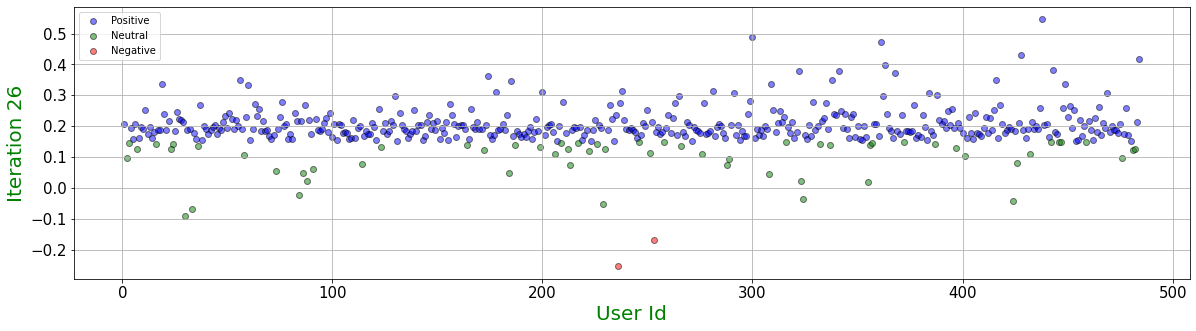



percentage difference: 14.46280991735537 %
No of users changing color :  2
Percentage of users changing color :  0.4132231404958678
----------------------------------------------------------
484
iteration  27
scale of w2:  [ -0.2469314955739366 , 0.54558949620199 ]


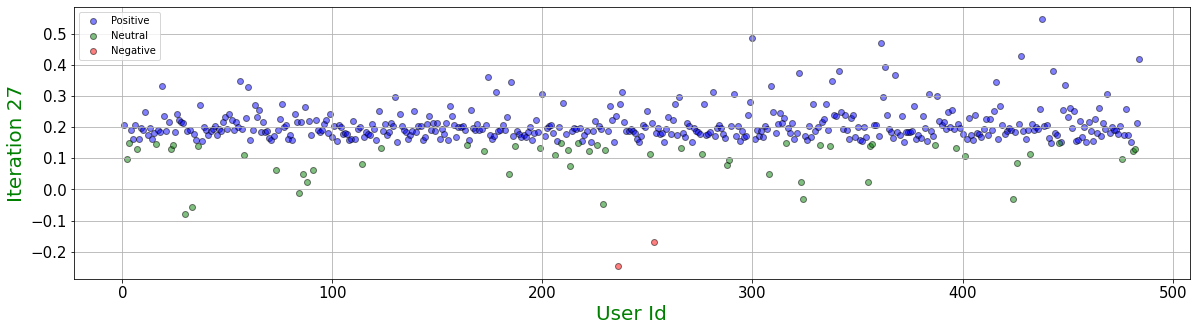



percentage difference: 10.330578512396695 %
No of users changing color :  6
Percentage of users changing color :  1.2396694214876034
----------------------------------------------------------
484
iteration  28
scale of w2:  [ -0.23931868627293526 , 0.5450486075767745 ]


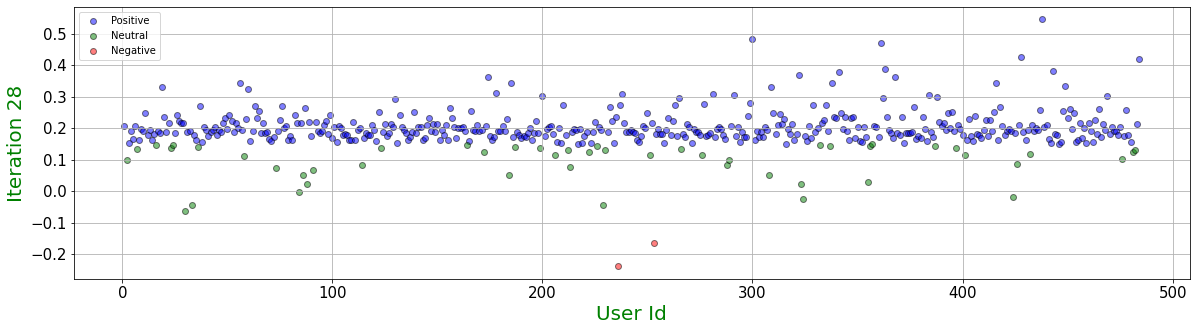



percentage difference: 14.049586776859504 %
No of users changing color :  5
Percentage of users changing color :  1.0330578512396695
----------------------------------------------------------
484
iteration  29
scale of w2:  [ -0.23182833396156563 , 0.5445083110733895 ]


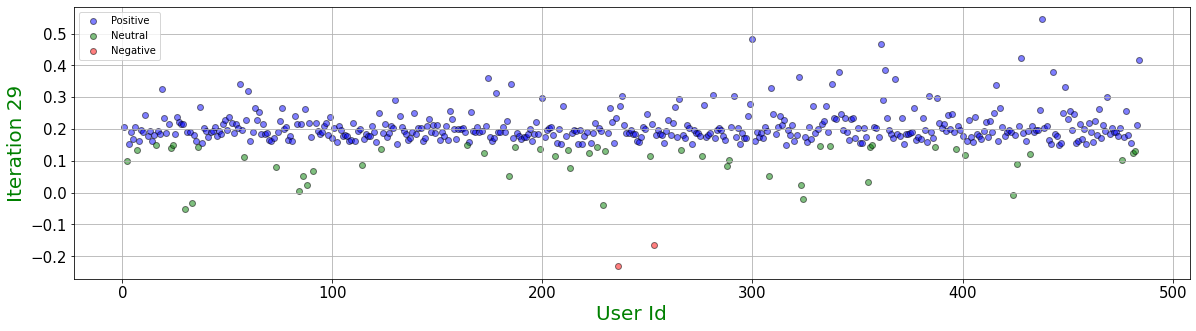



percentage difference: 10.950413223140496 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  30
scale of w2:  [ -0.22445879874186694 , 0.5439685136960888 ]


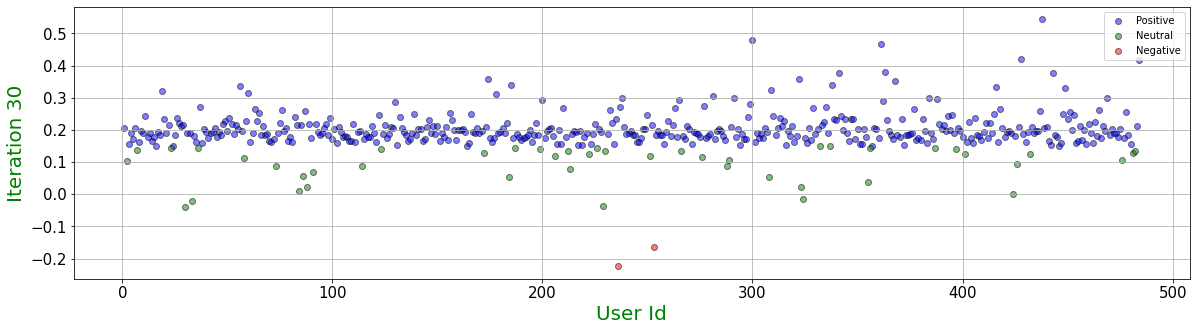



percentage difference: 12.190082644628099 %
No of users changing color :  4
Percentage of users changing color :  0.8264462809917356
----------------------------------------------------------
484
iteration  31
scale of w2:  [ -0.21720845532147148 , 0.5434291326157746 ]


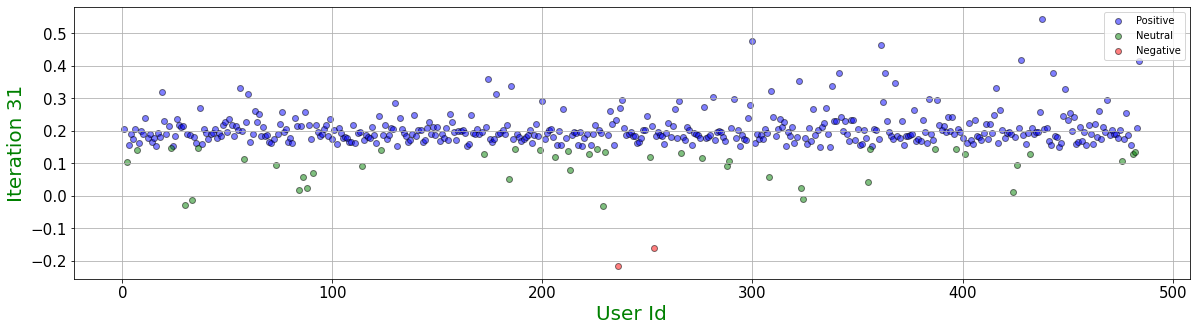



percentage difference: 11.15702479338843 %
No of users changing color :  2
Percentage of users changing color :  0.4132231404958678
----------------------------------------------------------
484
iteration  32
scale of w2:  [ -0.21007569212592966 , 0.5428900943328054 ]


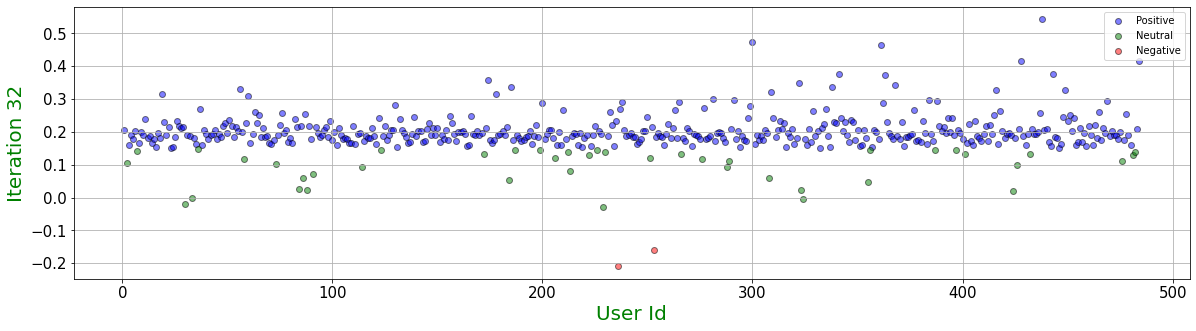



percentage difference: 9.50413223140496 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  33
scale of w2:  [ -0.2030589105226791 , 0.5423513339067608 ]


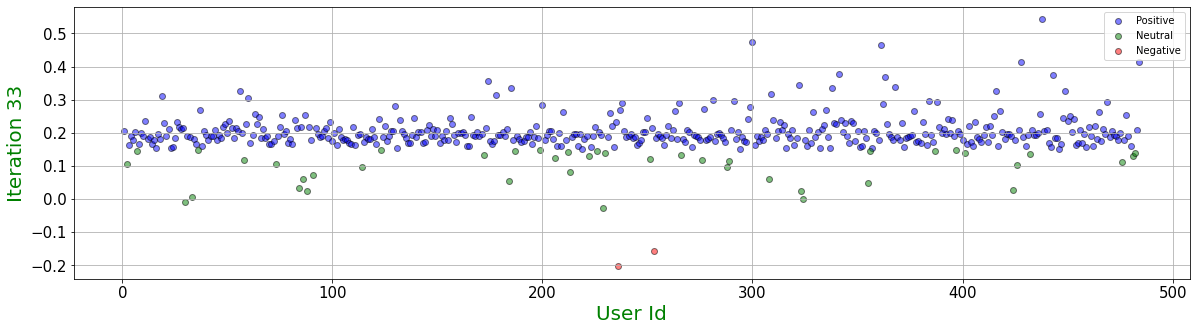



percentage difference: 11.983471074380166 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  34
scale of w2:  [ -0.19615652415763477 , 0.5418127942469432 ]


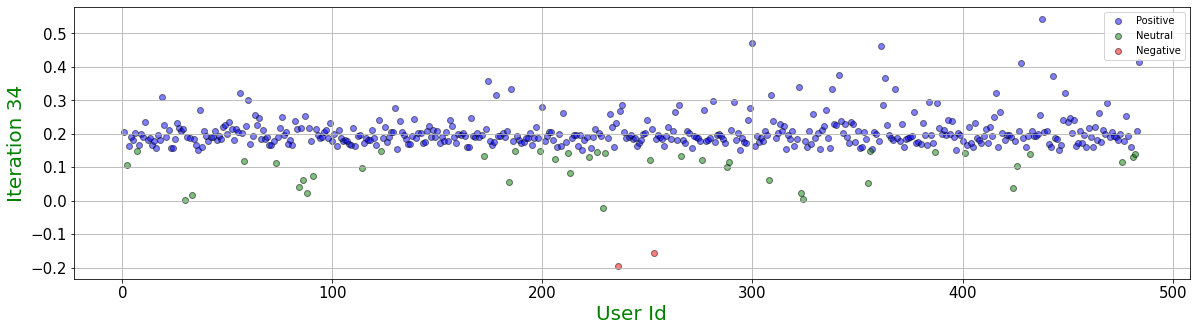



percentage difference: 8.677685950413224 %
No of users changing color :  2
Percentage of users changing color :  0.4132231404958678
----------------------------------------------------------
484
iteration  35
scale of w2:  [ -0.18936695840364592 , 0.5412744254581792 ]


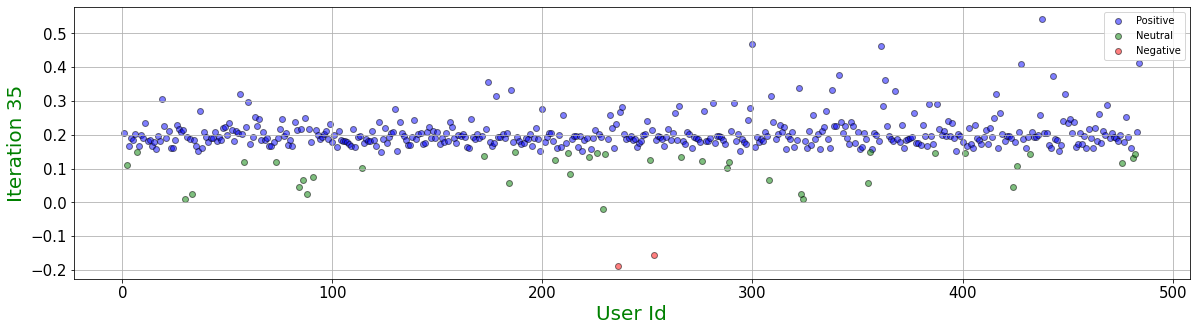



percentage difference: 6.40495867768595 %
No of users changing color :  2
Percentage of users changing color :  0.4132231404958678
----------------------------------------------------------
484
iteration  36
scale of w2:  [ -0.18268864991822528 , 0.5407361842371412 ]


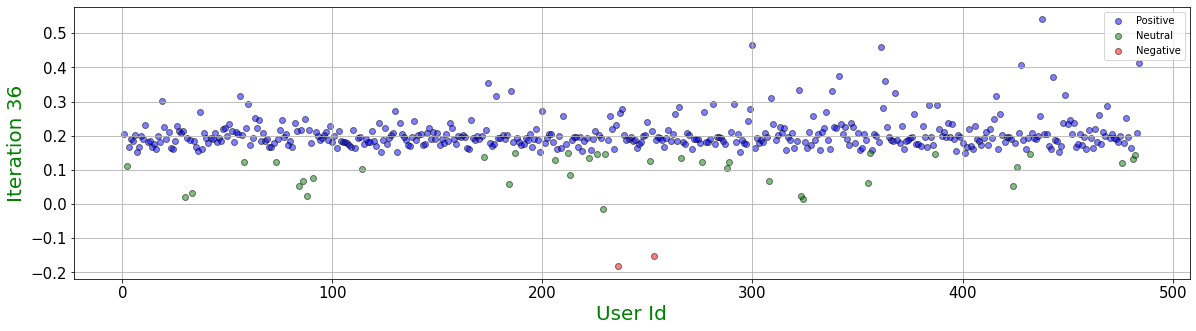



percentage difference: 9.710743801652892 %
No of users changing color :  2
Percentage of users changing color :  0.4132231404958678
----------------------------------------------------------
484
iteration  37
scale of w2:  [ -0.17612004630622205 , 0.5401980333149599 ]


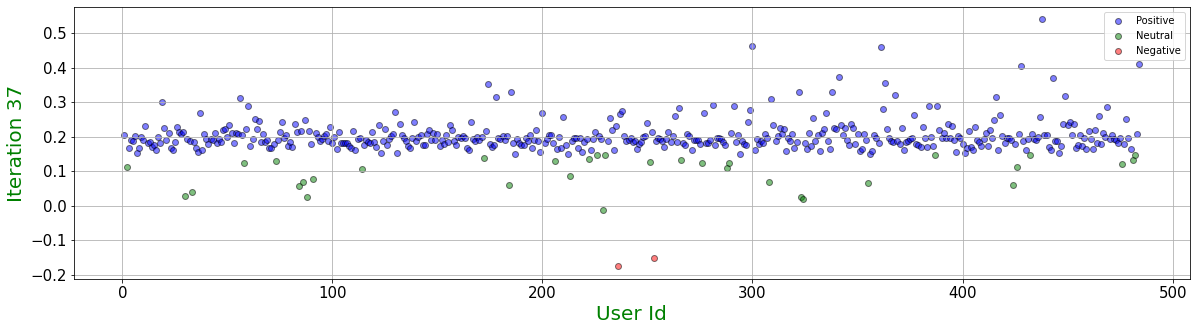



percentage difference: 9.50413223140496 %
No of users changing color :  3
Percentage of users changing color :  0.6198347107438017
----------------------------------------------------------
484
iteration  38
scale of w2:  [ -0.16965960588160767 , 0.5396599409423607 ]


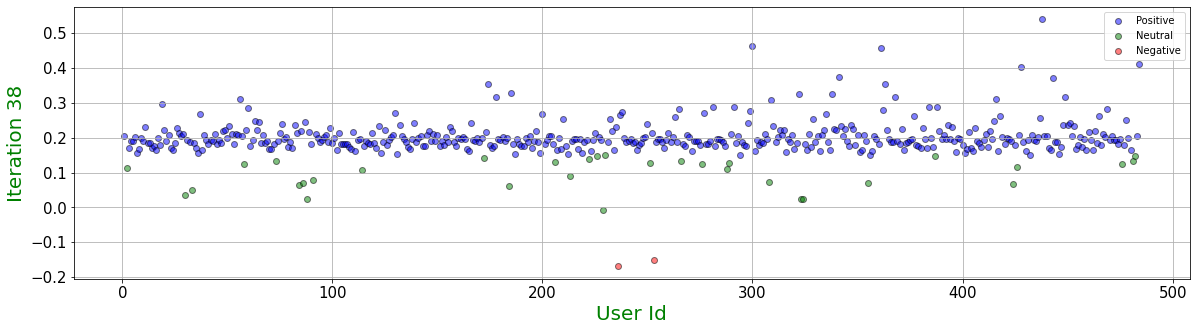



percentage difference: 6.8181818181818175 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  39
scale of w2:  [ -0.16330579752133068 , 0.539121880413952 ]


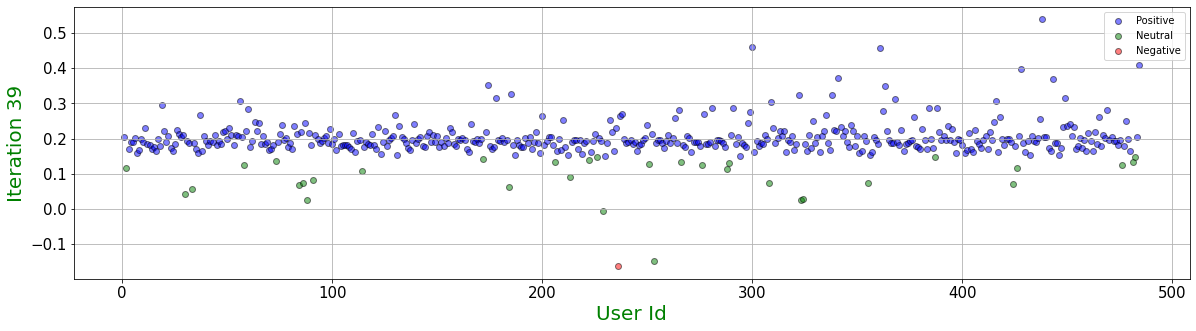



percentage difference: 7.231404958677685 %
No of users changing color :  2
Percentage of users changing color :  0.4132231404958678
----------------------------------------------------------
484
iteration  40
scale of w2:  [ -0.15705710060329411 , 0.5385838296286272 ]


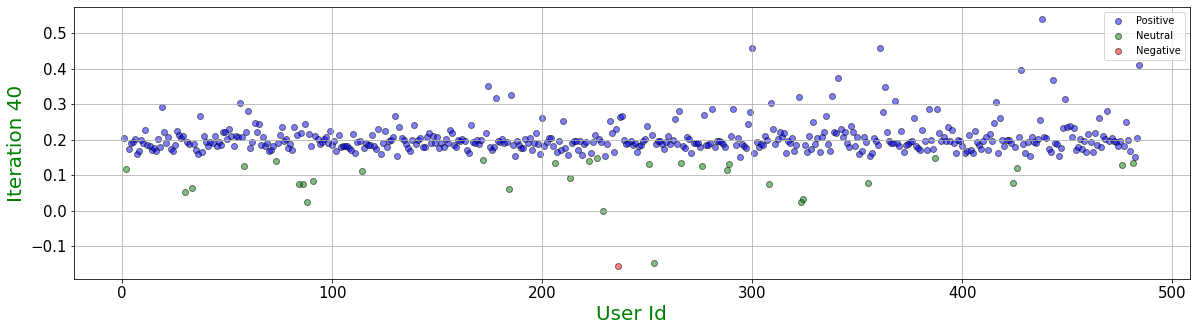



percentage difference: 6.40495867768595 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  41
scale of w2:  [ -0.15091200501990631 , 0.5380457706833286 ]


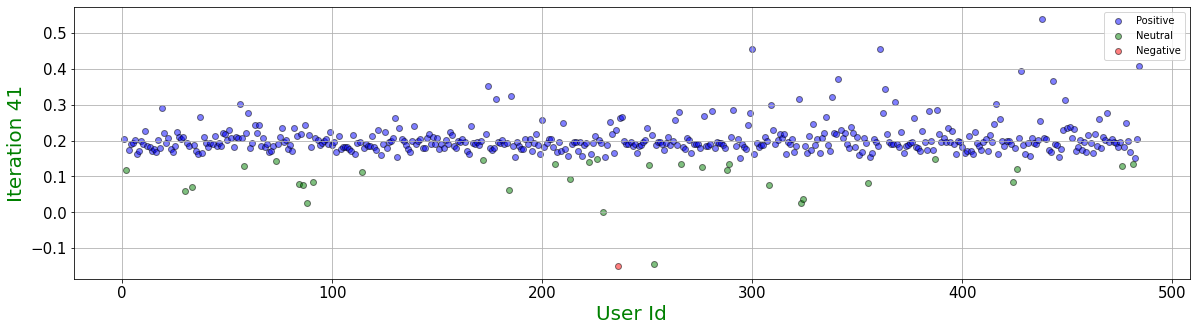



percentage difference: 7.644628099173553 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  42
scale of w2:  [ -0.14486901125832968 , 0.537507689497675 ]


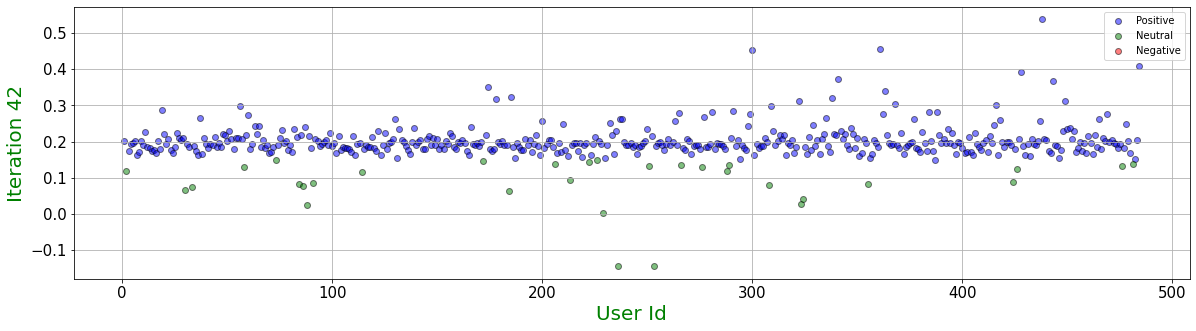



percentage difference: 8.057851239669422 %
No of users changing color :  2
Percentage of users changing color :  0.4132231404958678
----------------------------------------------------------
484
iteration  43
scale of w2:  [ -0.14237274738107772 , 0.536969575467164 ]


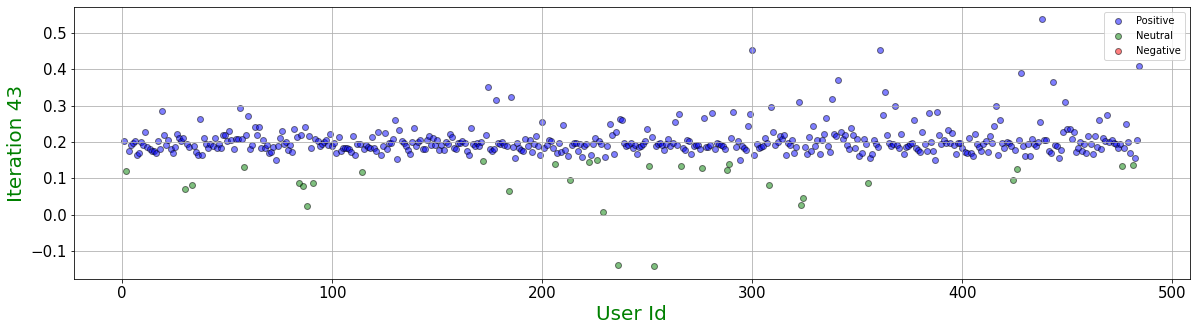



percentage difference: 4.545454545454546 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  44
scale of w2:  [ -0.14084728269144312 , 0.5364314211428565 ]


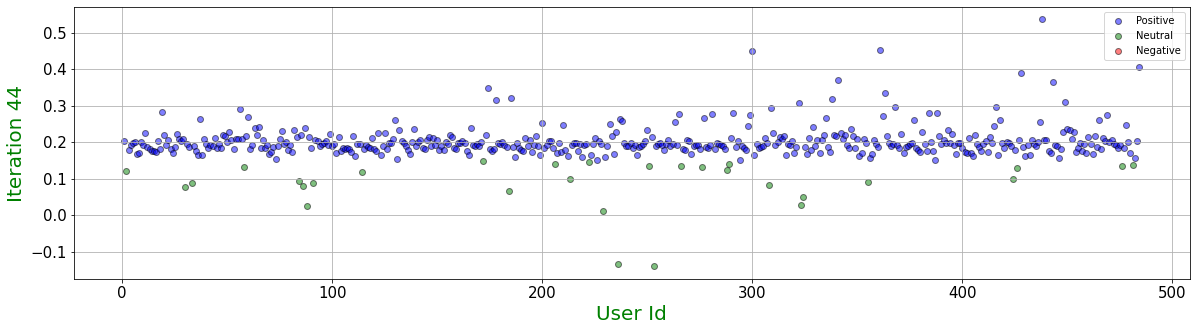



percentage difference: 7.231404958677685 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  45
scale of w2:  [ -0.13932676681092399 , 0.5358932219356166 ]


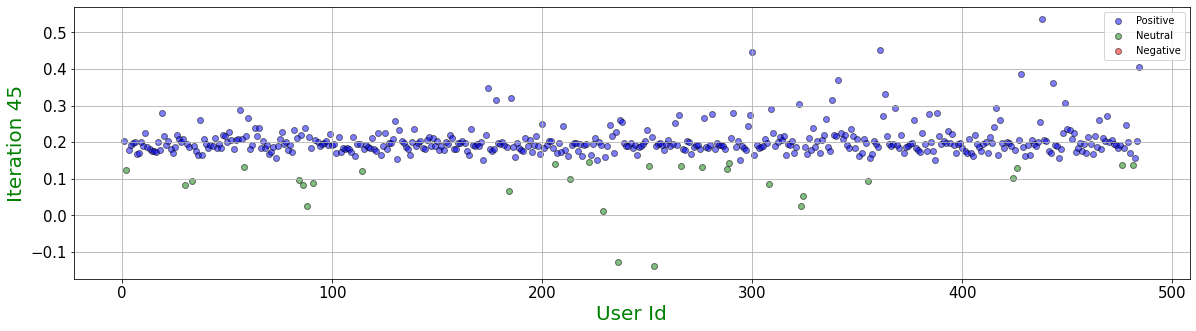



percentage difference: 7.644628099173553 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  46
scale of w2:  [ -0.13781119537764325 , 0.5353549758431285 ]


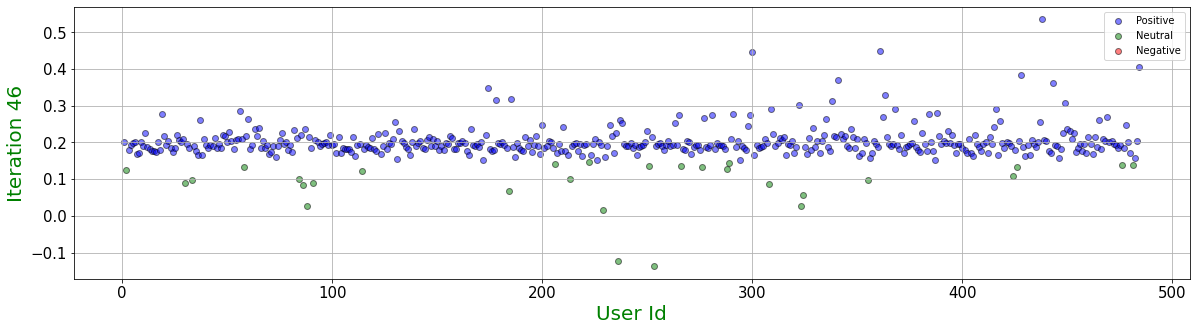



percentage difference: 6.6115702479338845 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  47
scale of w2:  [ -0.1363005674528307 , 0.5348166831980475 ]


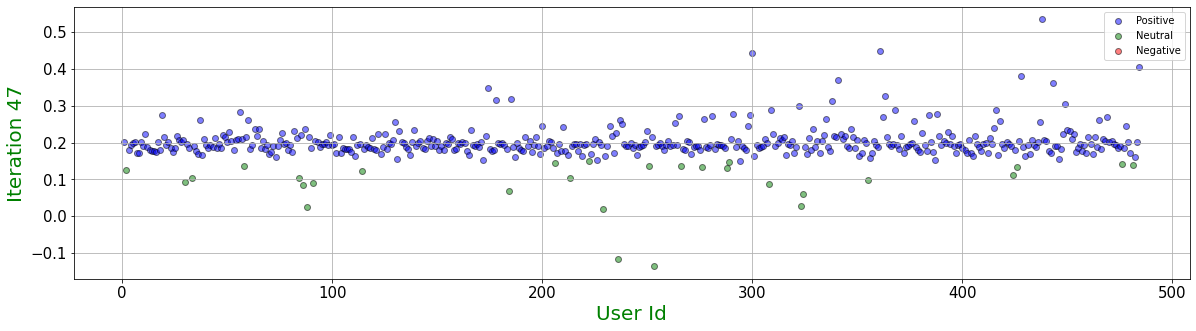



percentage difference: 5.991735537190083 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  48
scale of w2:  [ -0.13479488509580617 , 0.5342783464357652 ]


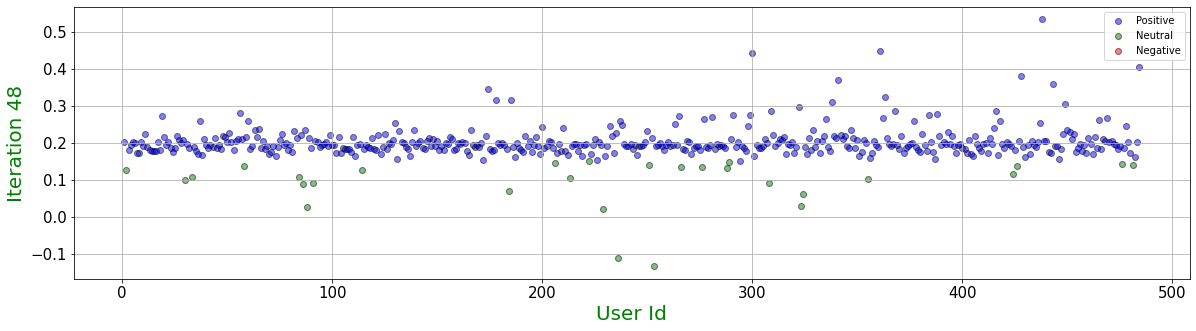



percentage difference: 6.40495867768595 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  49
scale of w2:  [ -0.13329415297628858 , 0.5337399698803748 ]


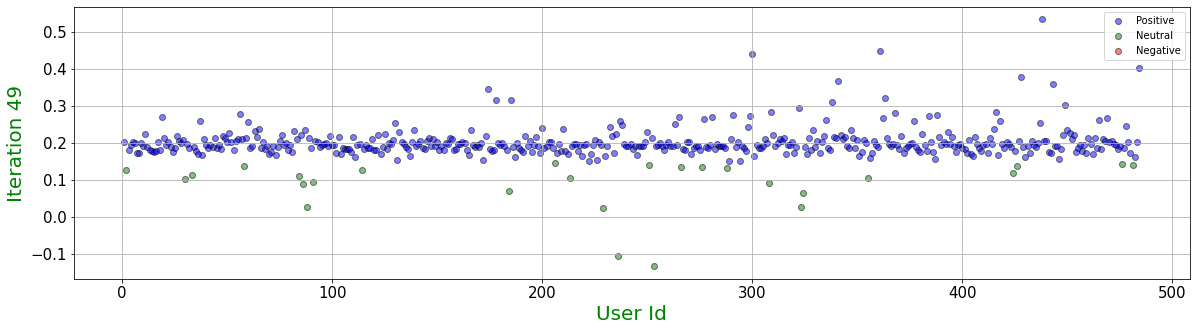



percentage difference: 6.40495867768595 %
No of users changing color :  2
Percentage of users changing color :  0.4132231404958678
----------------------------------------------------------
484
iteration  50
scale of w2:  [ -0.13179837802098285 , 0.5332015595475271 ]


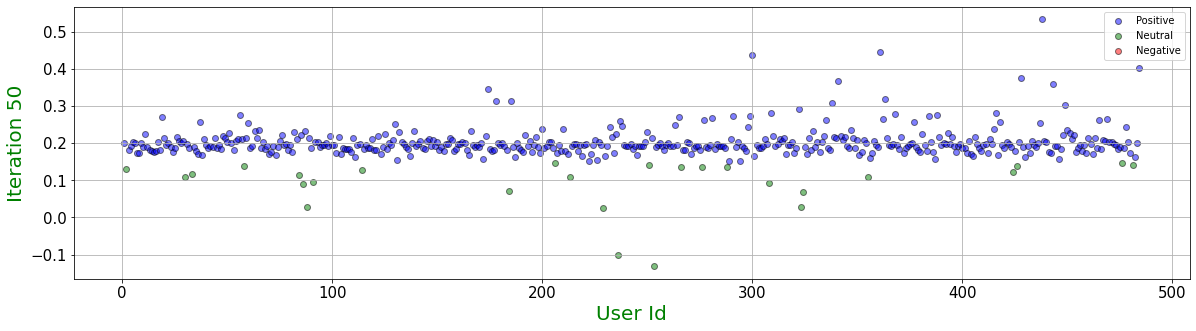



percentage difference: 5.1652892561983474 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  51
scale of w2:  [ -0.13030756909166455 , 0.5326631229629584 ]


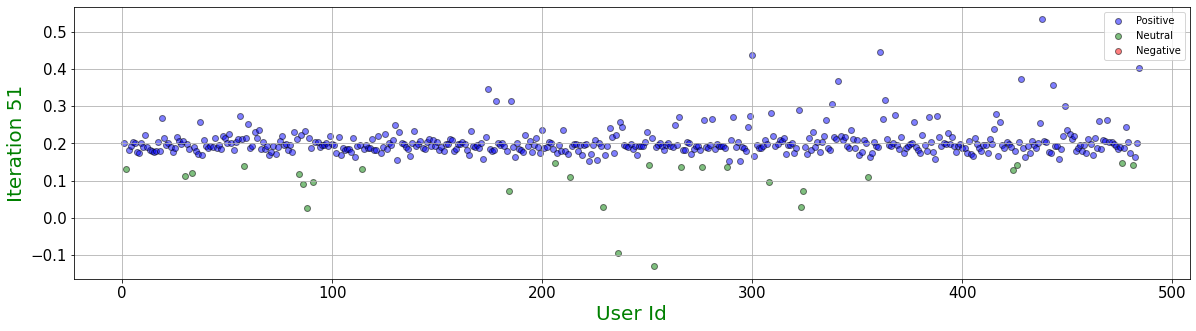



percentage difference: 4.958677685950414 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  52
scale of w2:  [ -0.1288217366922209 , 0.532124668995554 ]


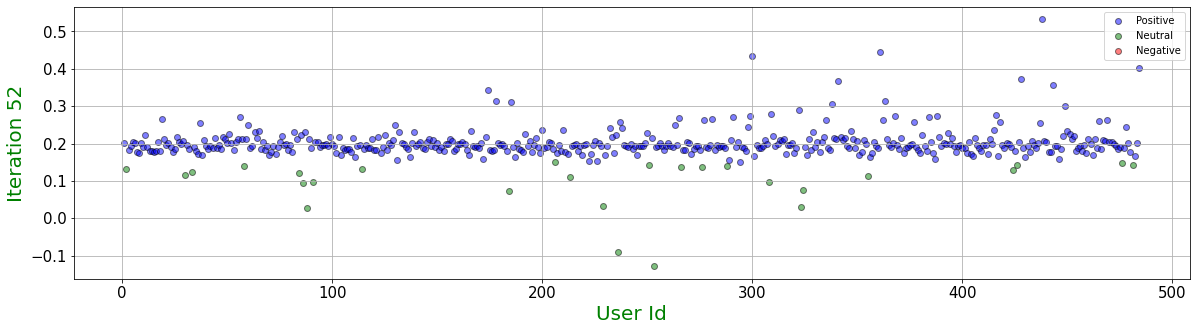



percentage difference: 6.8181818181818175 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  53
scale of w2:  [ -0.1273408927023195 , 0.5315862077038959 ]


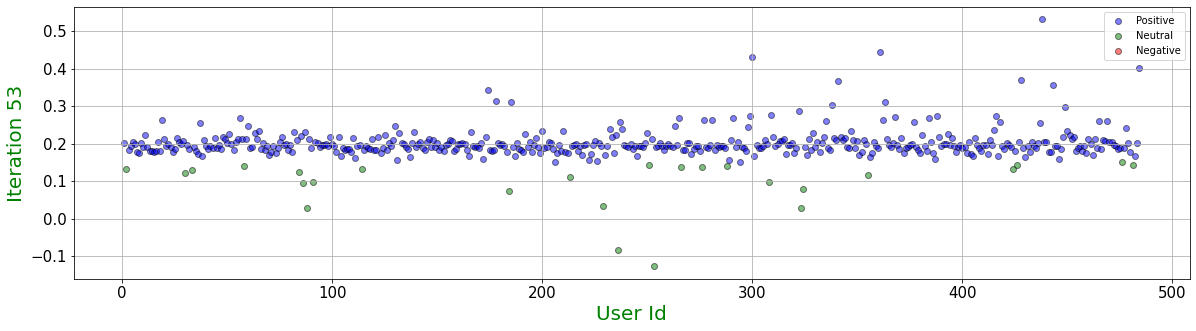



percentage difference: 4.75206611570248 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  54
scale of w2:  [ -0.12586505013556848 , 0.5310477501953077 ]


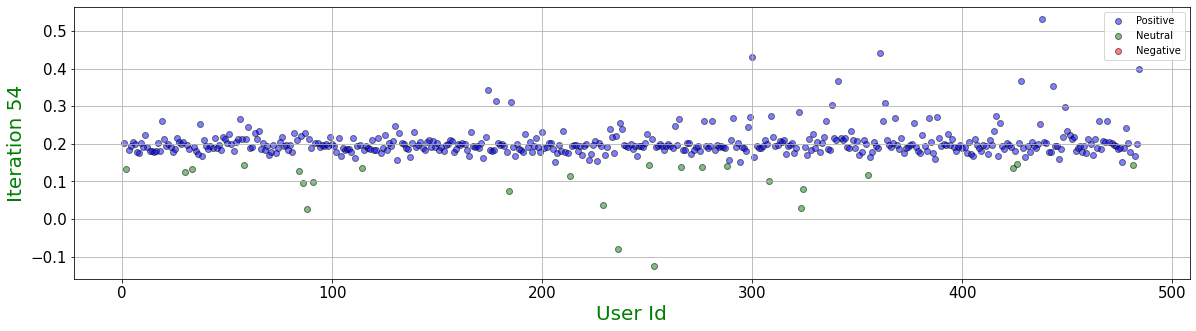



percentage difference: 4.338842975206612 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  55
scale of w2:  [ -0.12439422292020502 , 0.5305093084964857 ]


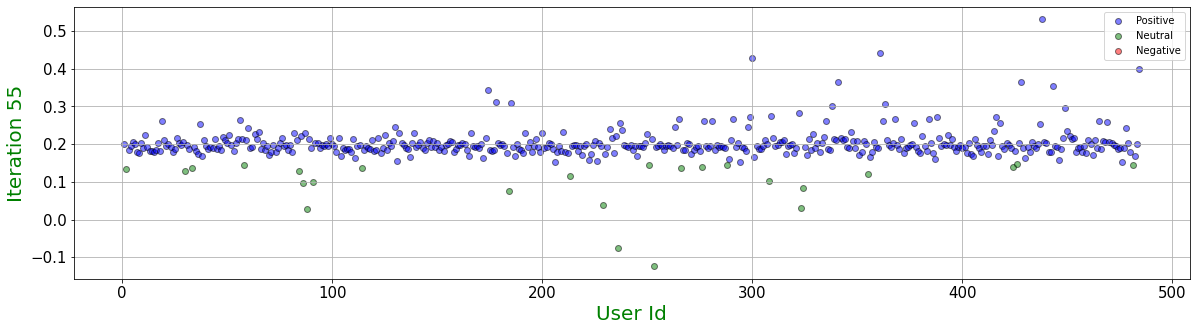



percentage difference: 4.132231404958678 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  56
scale of w2:  [ -0.1229284257005053 , 0.5299708954348609 ]


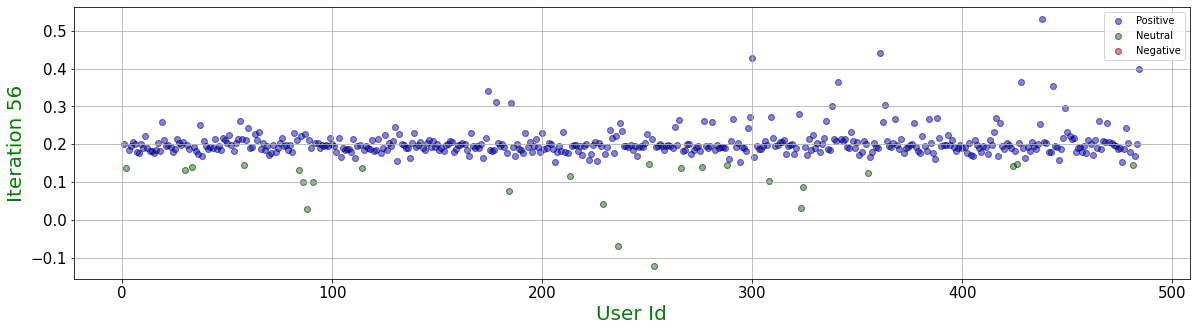



percentage difference: 4.132231404958678 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  57
scale of w2:  [ -0.12146767365725247 , 0.5294325245299009 ]


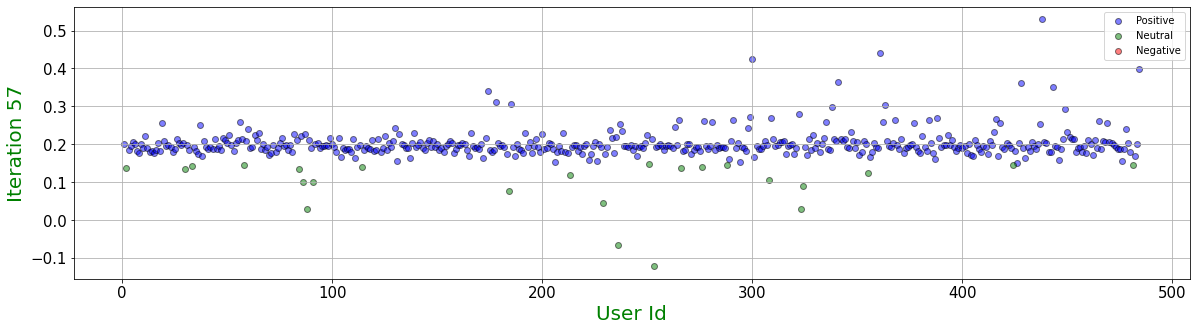



percentage difference: 4.958677685950414 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  58
scale of w2:  [ -0.12001198234572902 , 0.5288942098936122 ]


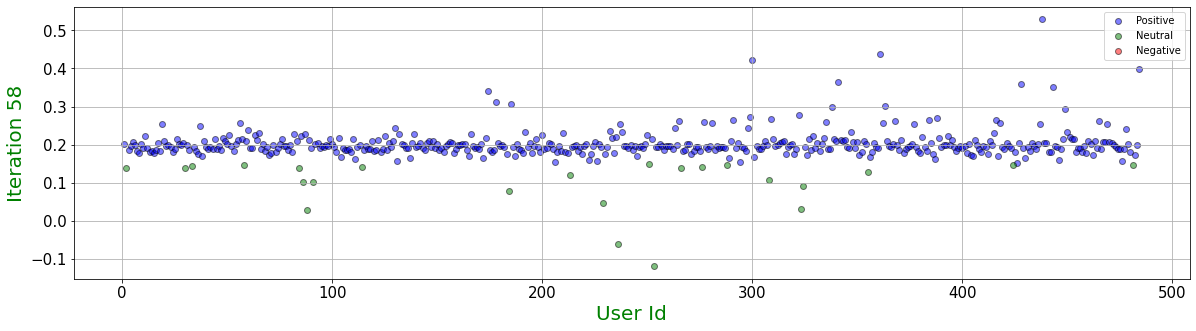



percentage difference: 4.75206611570248 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  59
scale of w2:  [ -0.11856136754981869 , 0.5283559661395564 ]


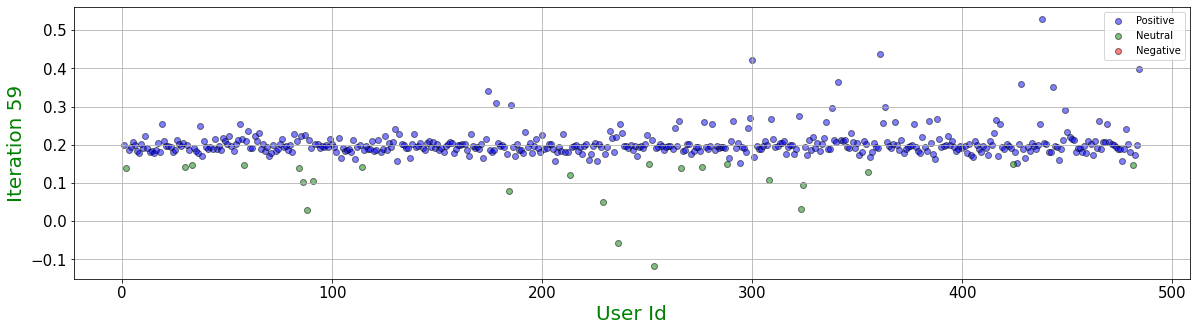



percentage difference: 3.0991735537190084 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  60
scale of w2:  [ -0.11711584515091275 , 0.5278178082997387 ]


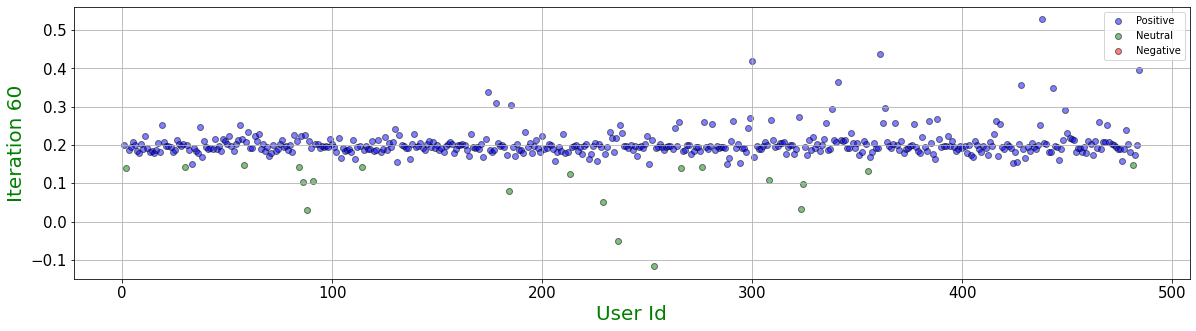



percentage difference: 3.925619834710744 %
No of users changing color :  4
Percentage of users changing color :  0.8264462809917356
----------------------------------------------------------
484
iteration  61
scale of w2:  [ -0.11567543101041508 , 0.5272797517487775 ]


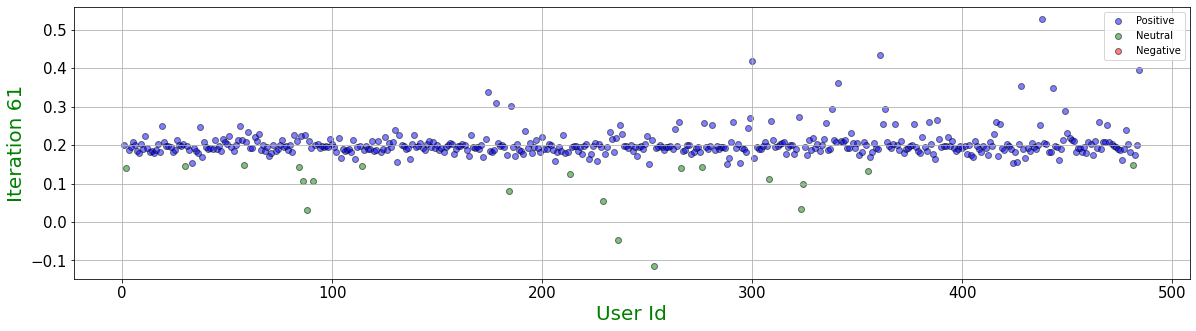



percentage difference: 3.3057851239669422 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  62
scale of w2:  [ -0.11424014086473318 , 0.5267418121347984 ]


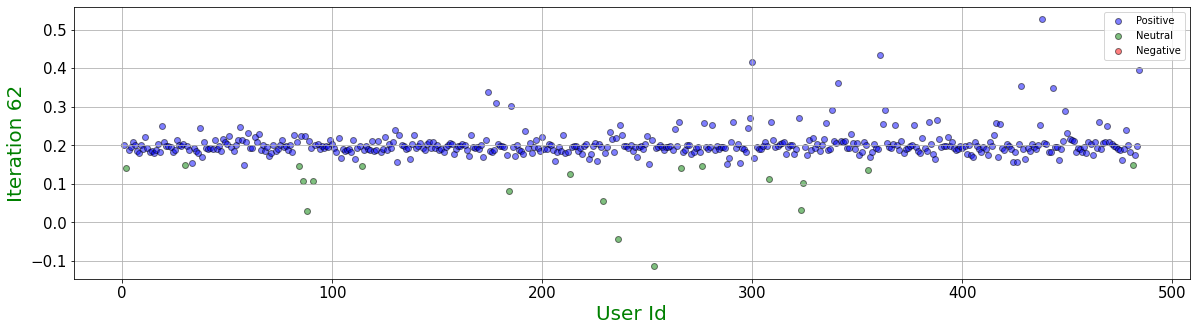



percentage difference: 4.338842975206612 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  63
scale of w2:  [ -0.11280999023172704 , 0.5262040053165414 ]


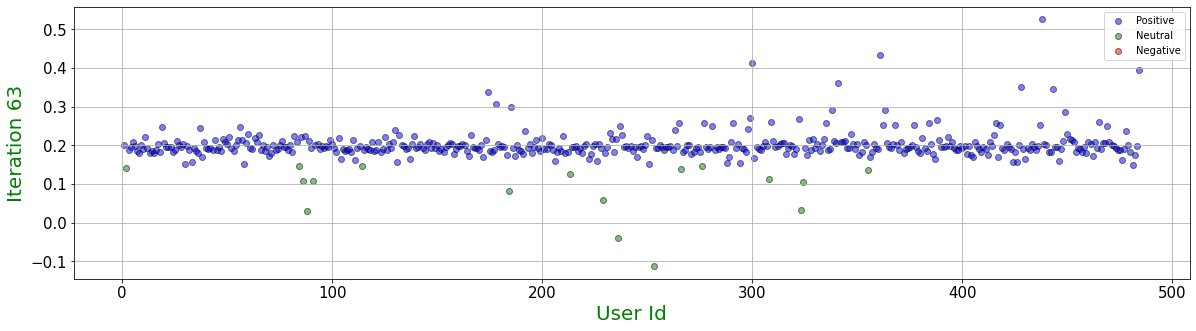



percentage difference: 3.71900826446281 %
No of users changing color :  2
Percentage of users changing color :  0.4132231404958678
----------------------------------------------------------
484
iteration  64
scale of w2:  [ -0.11138499432766621 , 0.5256663473062022 ]


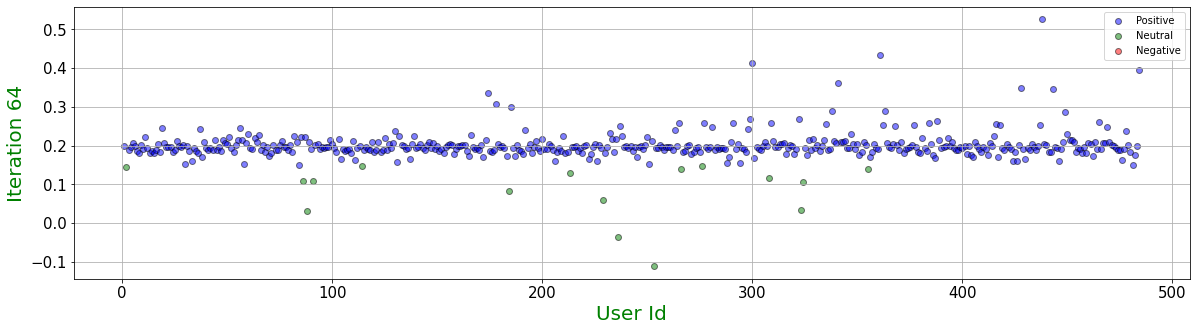



percentage difference: 2.8925619834710745 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  65
scale of w2:  [ -0.10996516799381782 , 0.5251288542175648 ]


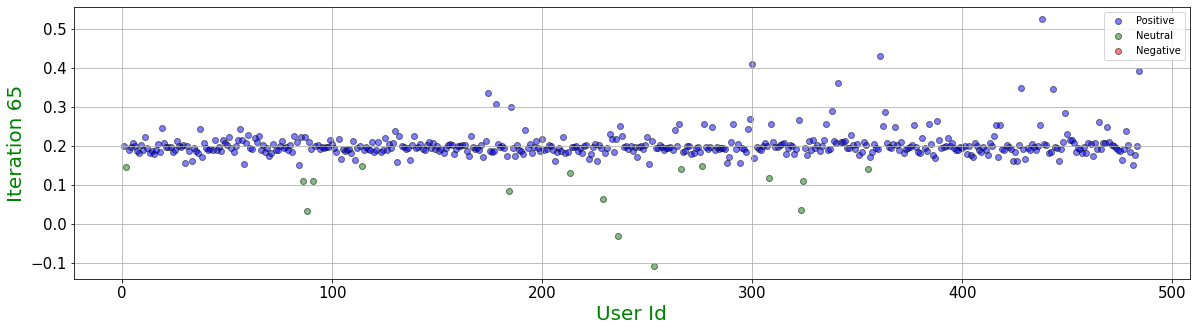



percentage difference: 2.8925619834710745 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  66
scale of w2:  [ -0.10855052563185531 , 0.5245915422190144 ]


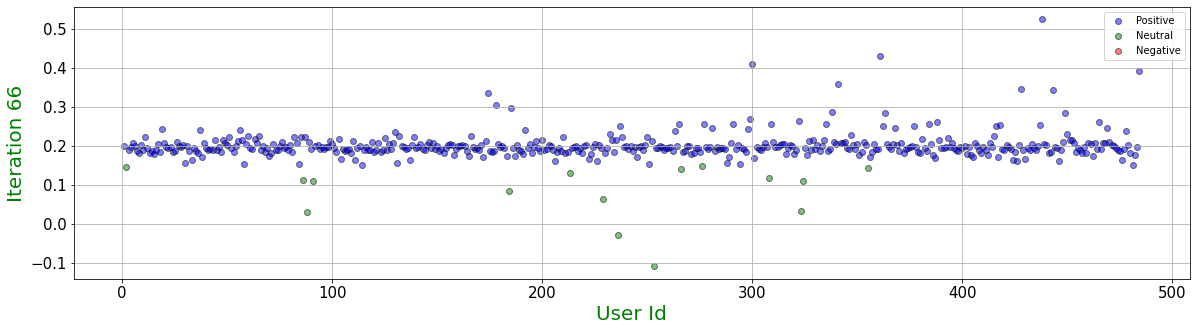



percentage difference: 3.3057851239669422 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  67
scale of w2:  [ -0.1071410811473395 , 0.5240544274910476 ]


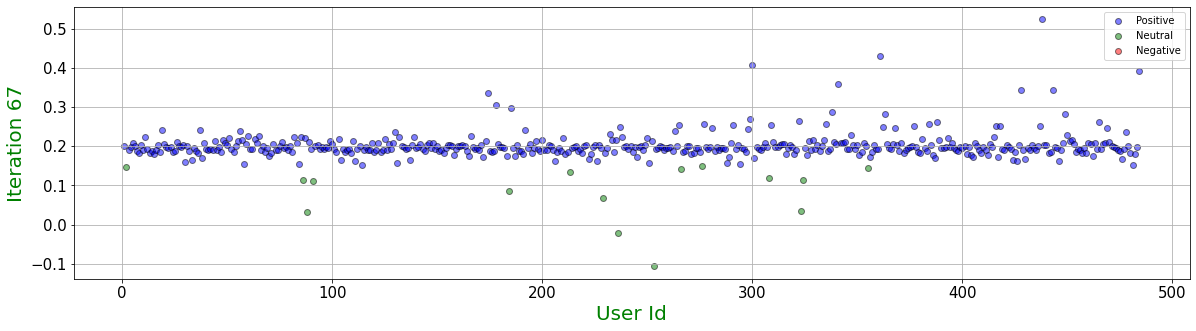



percentage difference: 2.8925619834710745 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  68
scale of w2:  [ -0.1057368479005807 , 0.5235175261879269 ]


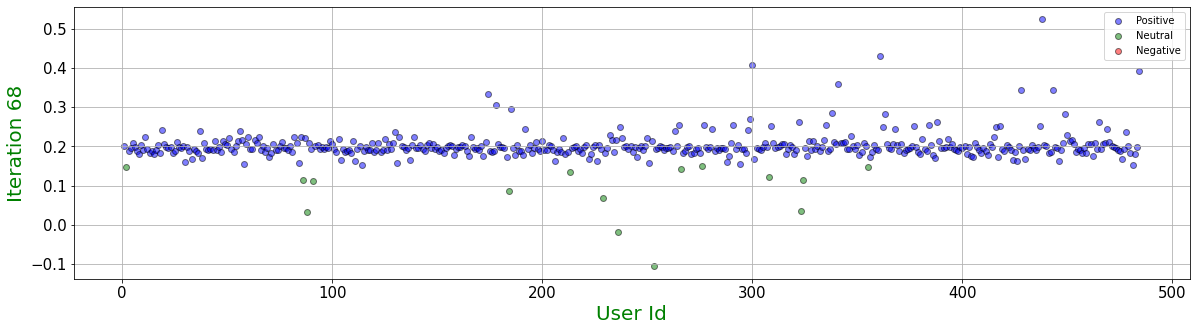



percentage difference: 4.958677685950414 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  69
scale of w2:  [ -0.10433783866424397 , 0.5229808544031506 ]


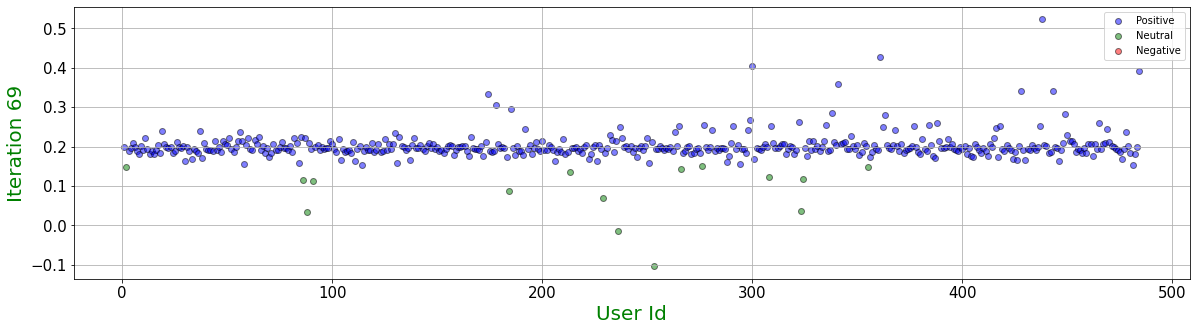



percentage difference: 3.3057851239669422 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  70
scale of w2:  [ -0.10294406558710827 , 0.5224444281384338 ]


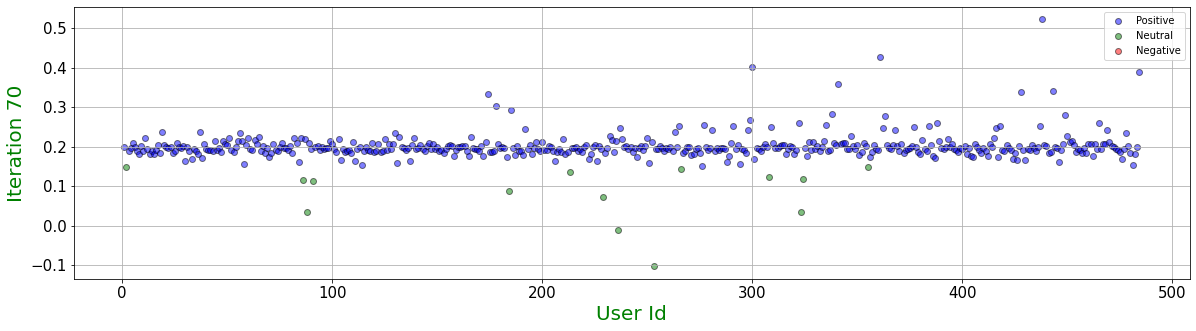



percentage difference: 2.479338842975207 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  71
scale of w2:  [ -0.10155554016343593 , 0.52190826327592 ]


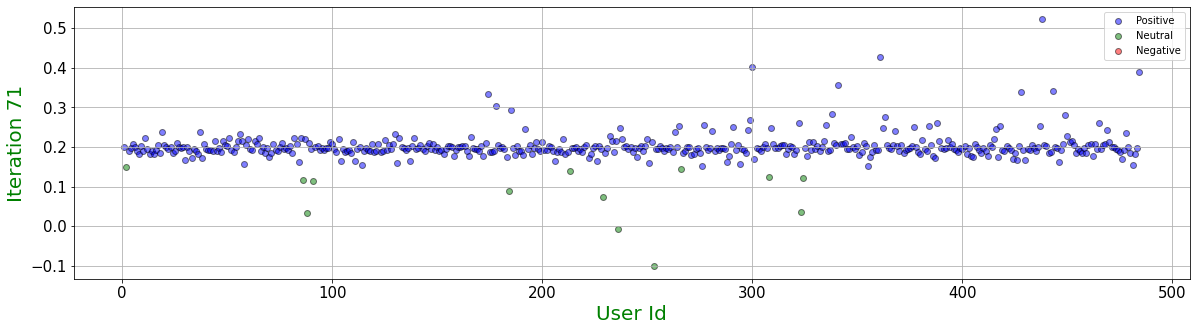



percentage difference: 3.0991735537190084 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  72
scale of w2:  [ -0.10017227320745094 , 0.5213723755533602 ]


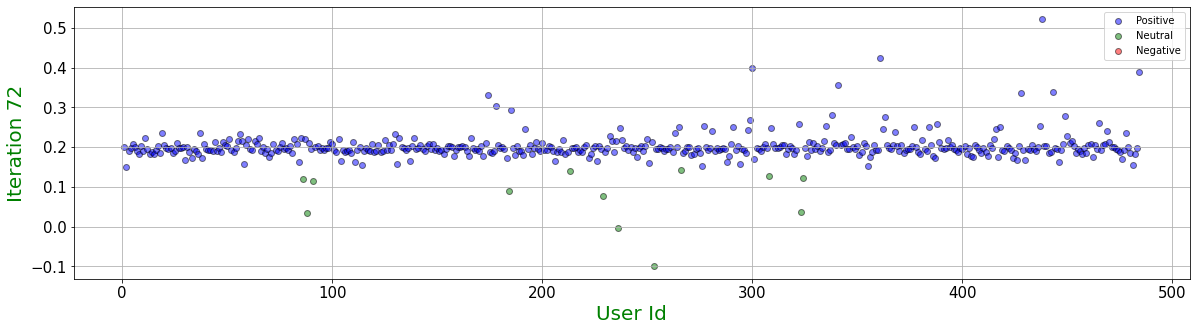



percentage difference: 3.71900826446281 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  73
scale of w2:  [ -0.09879427483246328 , 0.5208367805420211 ]


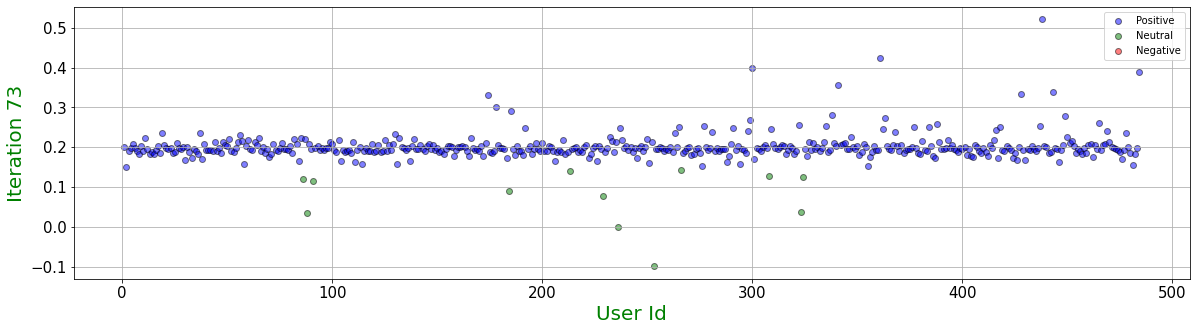



percentage difference: 2.479338842975207 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  74
scale of w2:  [ -0.09742155443421303 , 0.5203014936270955 ]


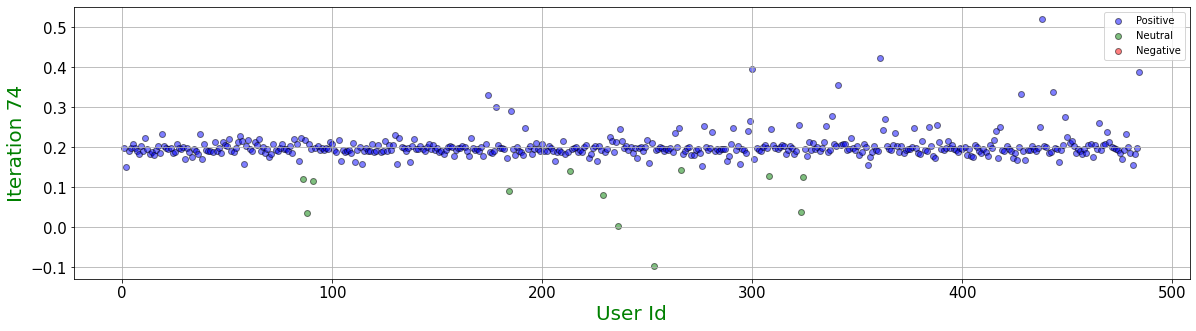



percentage difference: 3.71900826446281 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  75
scale of w2:  [ -0.09605412067804088 , 0.5197665299904122 ]


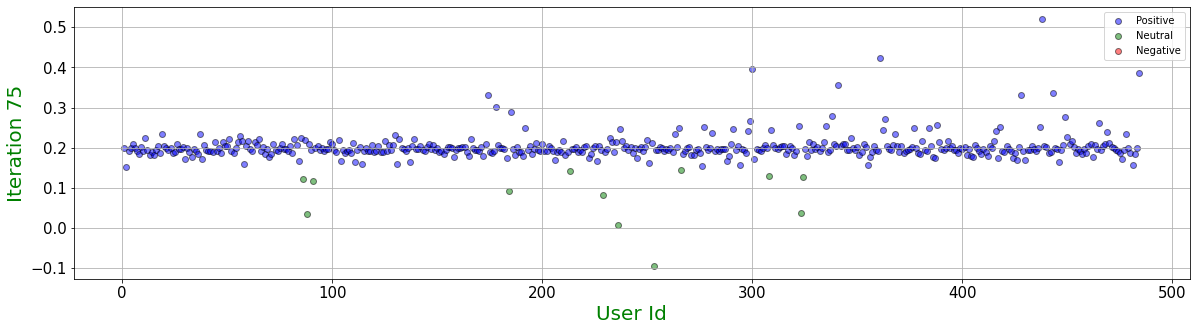



percentage difference: 2.6859504132231407 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  76
scale of w2:  [ -0.09469198148952296 , 0.5192319045952509 ]


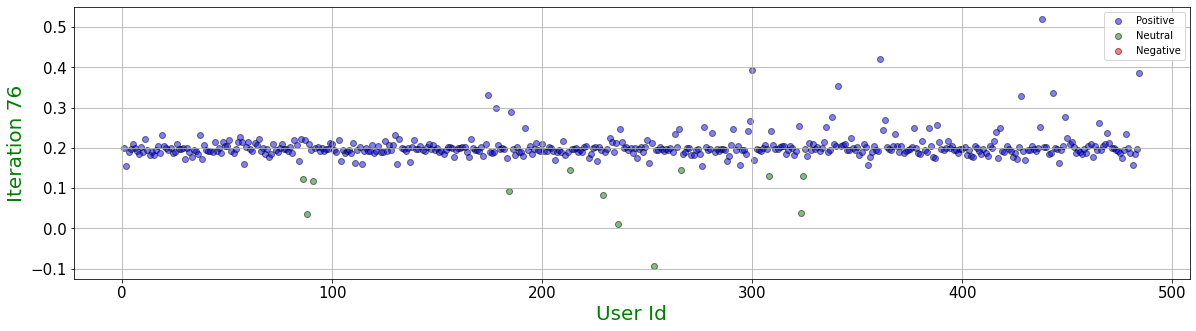



percentage difference: 3.512396694214876 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  77
scale of w2:  [ -0.09333514404823648 , 0.518697632173089 ]


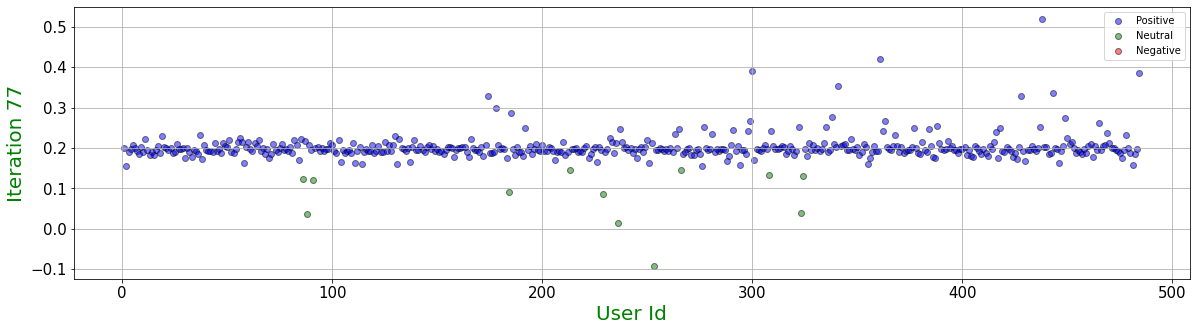



percentage difference: 3.3057851239669422 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  78
scale of w2:  [ -0.09198361478434905 , 0.5181637272121138 ]


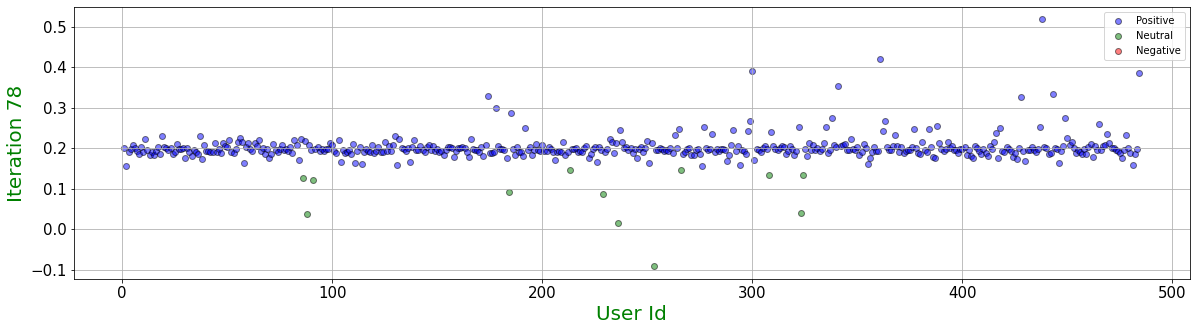



percentage difference: 4.132231404958678 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  79
scale of w2:  [ -0.09063739937774912 , 0.5176302039473532 ]


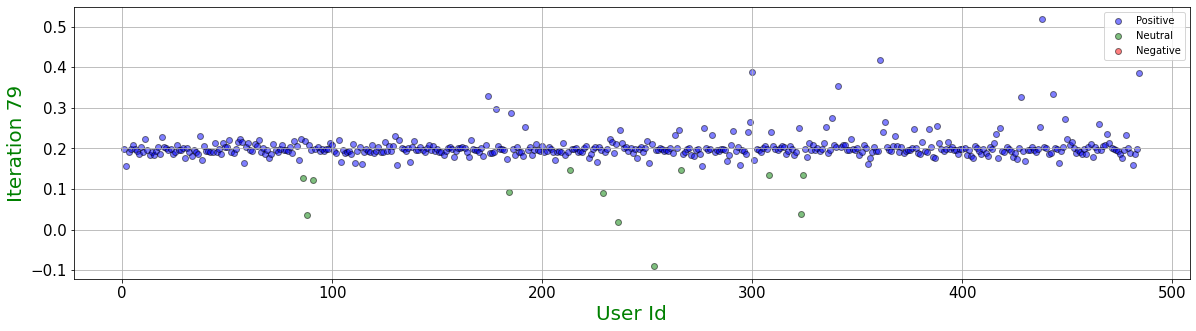



percentage difference: 1.859504132231405 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  80
scale of w2:  [ -0.08929650275945787 , 0.5170970763522831 ]


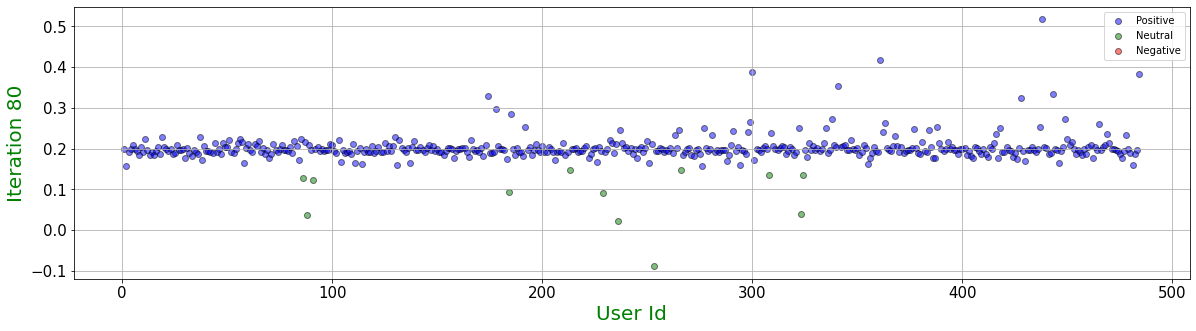



percentage difference: 1.859504132231405 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  81
scale of w2:  [ -0.08796092911508359 , 0.5165643581317849 ]


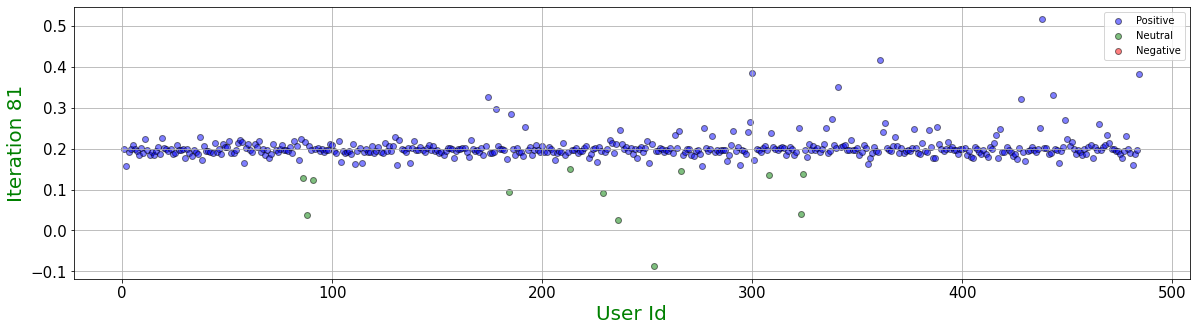



percentage difference: 2.479338842975207 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  82
scale of w2:  [ -0.08663068189009922 , 0.5160320627163345 ]


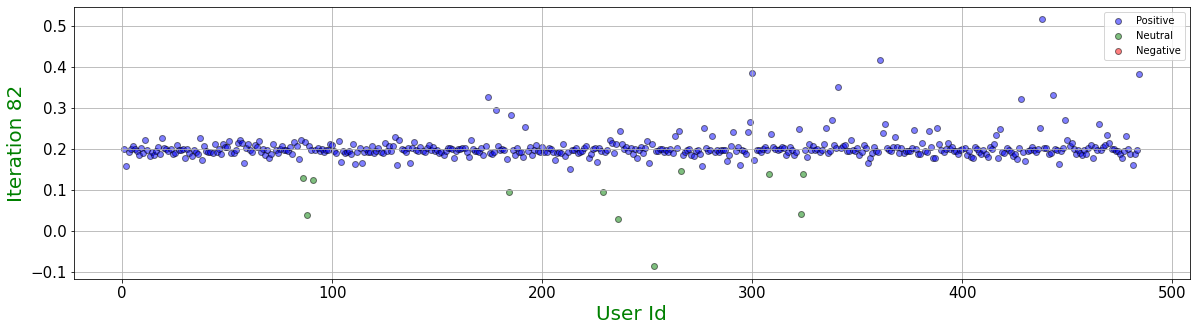



percentage difference: 1.859504132231405 %
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------
484
iteration  83
scale of w2:  [ -0.08530576379674161 , 0.5155002032573129 ]


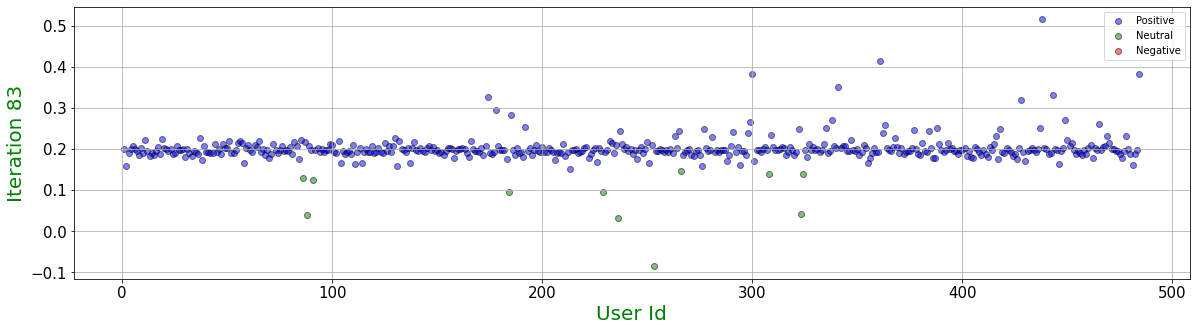



percentage difference: 1.6528925619834711 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  84
scale of w2:  [ -0.08398617682234774 , 0.5149687926233396 ]


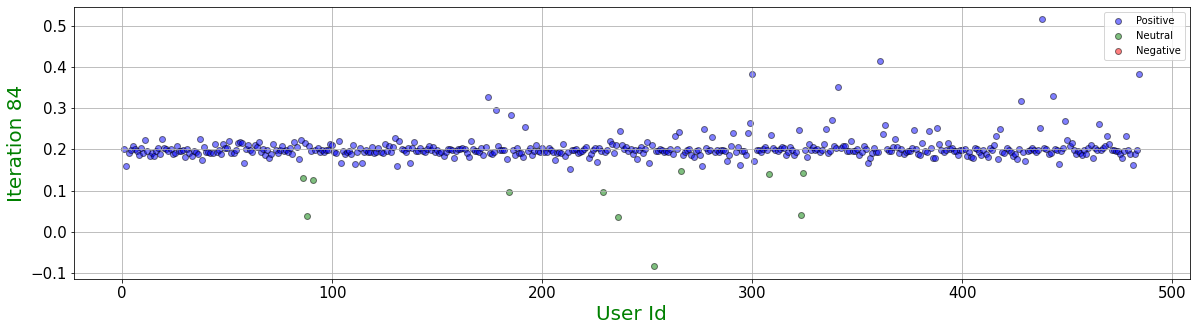



percentage difference: 3.0991735537190084 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------
484
iteration  85
scale of w2:  [ -0.08267192223895838 , 0.5144378433975337 ]


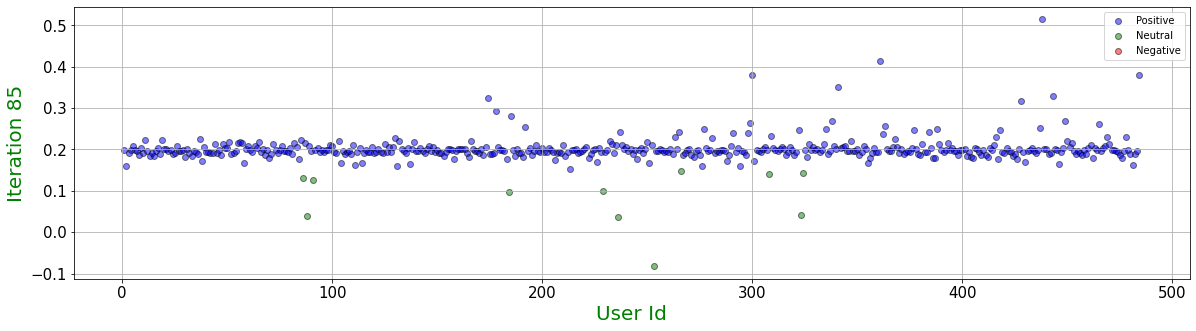



percentage difference: 0.8264462809917356 %
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


In [ ]:
# updated opinion in w2 
# Formula with Opinion Difference opinion(-1,1) convin(0,1) bias(0,1) KMEANS 1D
old_color = None
new_color = None
x=0
pdOur=[]
ourInitial=[]
colorOurKMEANS=[]
while(1):
    means = {1:[-0.3],2:[0.0],3:[0.3]}   #Initial Centeroids
    colmap = {1: 'r', 2: 'g', 3: 'b'}
    w2=[]
    for i in range (0,484):
        
        I=opinion[i];
        l=str(my_data['following'][i])
        l=l[1:-1]
        l=l.split(',')
        sumCp=0
        followerOpinion=0
        for j in range(len(l)):
          ind=int(l[j])
          cp=convin[ind]
          sumCp=sumCp+1
          followerOpinion=followerOpinion+(opinion[ind]- I )*cp

#         print(s) 
        followerOpinion=followerOpinion/sumCp
        b=bias[i]
        followerOpinion = followerOpinion * b 
        w2.append(followerOpinion)  
          

    lenw2=len(w2)
    for i in range (len(w2)):
      w2[i]=(w2[i]+opinion[i]) 

    #----------------------------------------------------------------------------------
    if(x==1):
      print("Initial Noted")
      for i in range(len(w2)):
        ourInitial.append(w2[i])
    print("iteration ",x)
    
    print("scale of w2: ","[" ,min(w2), "," , max(w2), "]")
    

    
    #-   -           -            -              -               -               -
    mn=[]
    for p in range(0,484):
        mn.append({'x':opinion[p],'y':w2[p]})
        cluster = pd.DataFrame(mn,columns=['x','y'])
        # cluster.head()
    np.random.seed(200)
    k = 3
    
    cluster = assignment(means)
    new_color=cluster['color']
    # print("iteration ",x)
    positive=[]
    p_id=[]
    negative=[]
    n_id=[]
    neutral=[]
    ne_id=[]
    
    for i in range(0,484):
        if(cluster['color'][i]=='b'):
            positive.append(cluster['y'][i])
            p_id.append(i+1)
        elif(cluster['color'][i]=='g'):
            neutral.append(cluster['y'][i])
            ne_id.append(i+1)
        else:
            negative.append(cluster['y'][i])
            n_id.append(i+1)
    
    fig = plt.figure(figsize=(20, 5))
    plt.rc('xtick',labelsize=15,color='black')
    plt.rc('ytick',labelsize=15,color='black')
    plt.scatter(p_id,positive, color='b', alpha=0.5, edgecolor='k' ,label='Positive')
    plt.scatter(ne_id,neutral, color='g', alpha=0.5, edgecolor='k' ,label='Neutral')
    plt.scatter(n_id,negative, color='r', alpha=0.5, edgecolor='k' ,label='Negative')
    #-------------------------------------------------------------------  
    
    # fig = plt.figure(figsize=(14, 7))
    # plt.rc('xtick',labelsize=15,color='black')
    # plt.rc('ytick',labelsize=15,color='black')
    # # fig = plt.figure(figsize=(20, 5))
    # plt.scatter(cluster['y'], len(cluster['y'])*[0], color=cluster['color'], alpha=0.5, edgecolor='k')
    # leg_arr=['Negative','Neutral','Positive']
    # for p in means.keys():
    #     plt.scatter(*means[p],len(means[p])*[0], color=colmap[p],label=leg_arr[p-1])
    xstring='User Id'
    ystring='Iteration '+str(x)
    plt.xlabel(xstring,fontsize=20,color='green')
    plt.ylabel(ystring,fontsize=20,color='green')
    plt.legend()
    plt.grid(True)
    plt.show()
    #----------------------------------------------------------------------------------
    strf="{0:.2f}"
    cnt=0;
    for i in range(lenw2):
      
      if( (strf.format(w2[i]))  !=  (strf.format(opinion[i]))   ):
        cnt=cnt+1
    cnt=(cnt/lenw2)*100
    print('\n')
    print("percentage difference:",cnt,"%")
    pdOur.append(cnt)
   
    change=0 
    if x!=0:
        for p in range(0,484):
            if old_color[p]!=new_color[p] :
                change = change+1
#                print("index of person who changed opinion ",p)
    print("No of users changing color : ",change)
    change = (change/484)*100
    print("Percentage of users changing color : ",change)
    print("----------------------------------------------------------")
    colorOurKMEANS.append(change)
    old_color=new_color[:]
    x=x+1
    if(cnt<1):
      break
    
    # if(x==4):
    #   break
    for i in range(len(w2)):
      opinion[i]=w2[i]
    print(len(opinion))

In [ ]:
diffCluster=[]
for i in range(0,484):
  diffCluster.append(cluster['closest'][i])

In [ ]:
one=0
two=0
third=0
for i in range(0,484):  
  if(cluster['closest'][i]==1):
    one=one+1
  if(cluster['closest'][i]==2):
    two=two+1
  if(cluster['closest'][i]==3):
    third=third+1
print(one,two,third)

0 11 473


#BELOW CODE IS FOR DBSCAN FLOCKING AND DEGROOT NOT OF OUR USE

In [ ]:
opinion=w1[:]
bias=bs[:]
convin=v[:]

In [ ]:
print(opinion)

[0.192473822, 0.043894036, -0.013099236, 0.321965538, -0.022953515, 0.36797032, 0.03249269, 0.31829728399999996, 0.21609568399999998, 0.19426516100000002, 0.33768462200000005, 0.025069112999999997, 0.472983957, 0.134556984, 0.276018991, 0.141037791, 0.206367711, 0.271908394, 0.48705149600000003, 0.308199245, 0.136033504, 0.094091044, -0.28515718, -0.045097411, -0.0038569359999999996, 0.062066592999999996, 0.25622608, 0.160526327, -0.06604927599999999, -0.8365, 0.142333238, 0.227136735, 0.079523024, 0.07978104, 0.194576, 0.098898901, 0.147287644, -0.06468774599999999, 0.051753923, 0.115078094, 0.115078094, 0.112742636, 0.25810604800000003, 0.227528605, -0.015328372, 0.228495027, 0.217712475, 0.048540384000000006, 0.278606712, 0.05338163, 0.281246079, 0.253457696, 0.38175578600000004, 0.24559457699999998, 0.083227722, 0.32965760899999996, 0.08901656599999999, 0.056611863, 0.189087662, 0.55801628, -0.041121436000000004, 0.275051609, 0.365664228, 0.269104092, 0.242005215, 0.275159283000000

iteration  1
scale of w2:  [ -0.8365 , 0.905355369 ]


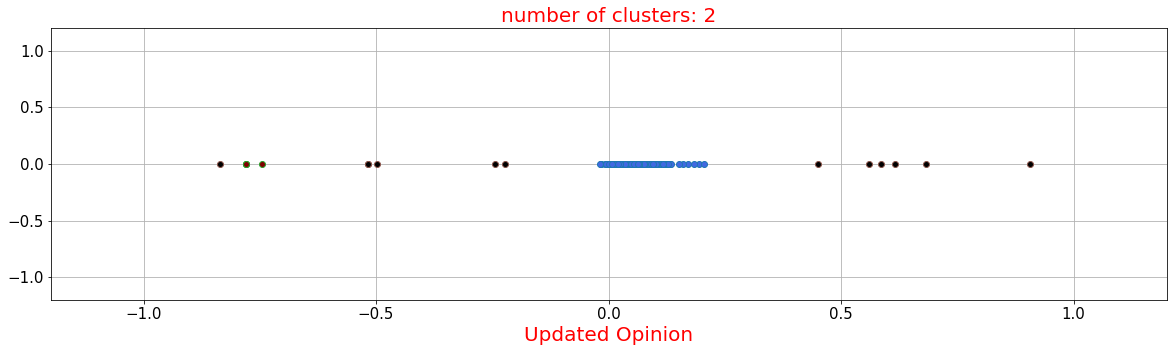

Silhouette Co-efficient: 0.909


percentage difference: 95.45454545454545 %
----------------------------------------------------------
484
iteration  2
scale of w2:  [ -0.8365 , 0.905355369 ]


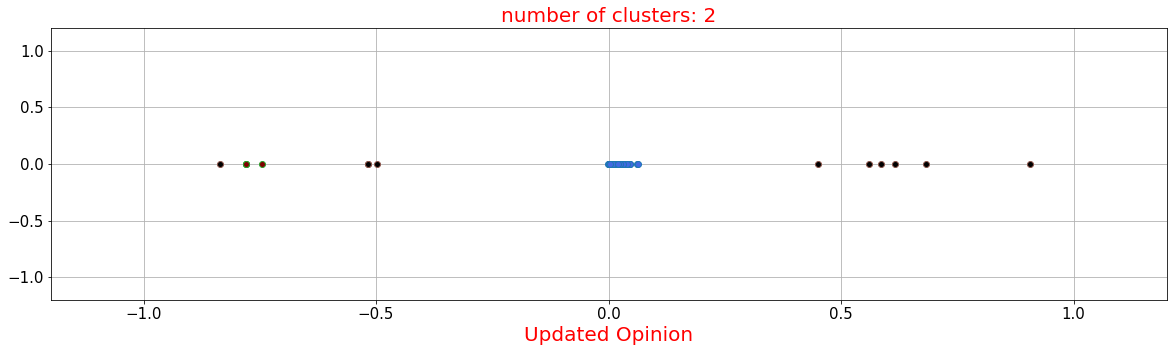

Silhouette Co-efficient: 0.959


percentage difference: 94.62809917355372 %
----------------------------------------------------------
484
iteration  3
scale of w2:  [ -0.8365 , 0.905355369 ]


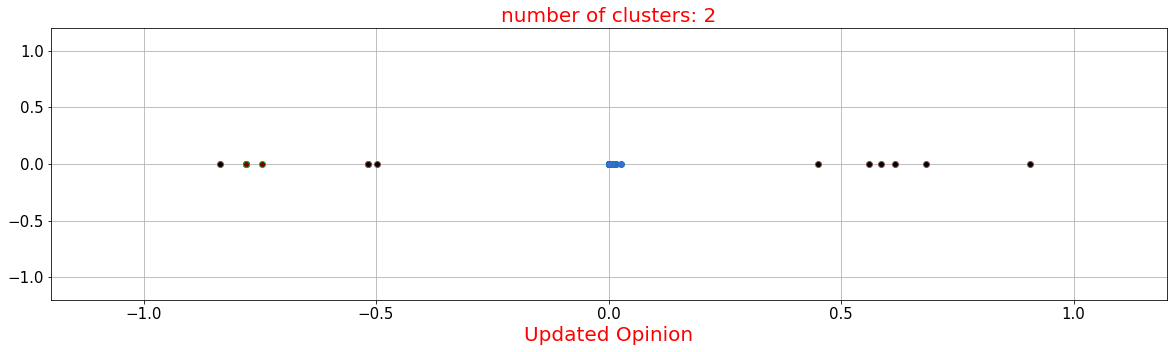

Silhouette Co-efficient: 0.969


percentage difference: 87.60330578512396 %
----------------------------------------------------------
484
iteration  4
scale of w2:  [ -0.8365 , 0.905355369 ]


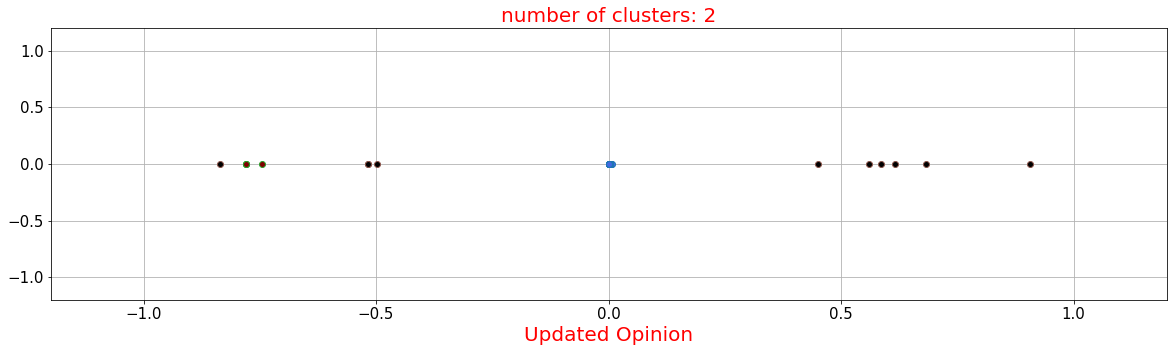

Silhouette Co-efficient: 0.971


percentage difference: 48.96694214876033 %
----------------------------------------------------------
484
iteration  5
scale of w2:  [ -0.8365 , 0.905355369 ]


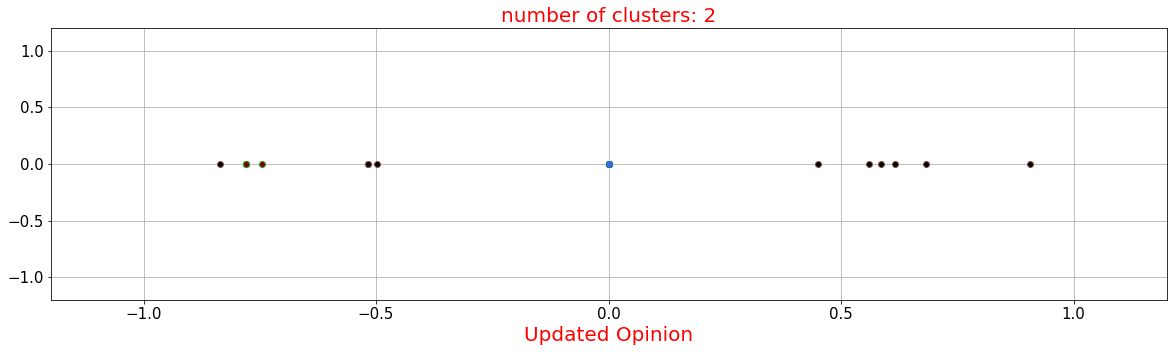

Silhouette Co-efficient: 0.972


percentage difference: 0.2066115702479339 %
----------------------------------------------------------


In [ ]:
# updated opinion in w2 
# Formula with Opinion Difference opinion(-1,1) convin(0,1) bias(0,1) FLOCKING
x=1
while(1):
   
    colmap = {1: 'r', 2: 'g', 3: 'b'}
    w2=[]
    for i in range (0,484):
        
        I=opinion[i]
        l=str(my_data['following'][i])
        l=l[1:-1]
        l=l.split(',')
        sumCp=0
        followerOpinion=0
        for j in range(len(l)):
          ind=int(l[j])
          
          if(abs(opinion[ind]-opinion[i] )< 0.3):
                cp=convin[ind]
                followerOpinion= followerOpinion + (cp * opinion[ind])
                sumCp = sumCp + 1

#         print(s) 
        if(sumCp>0):
          followerOpinion= followerOpinion/sumCp
        else:
          followerOpinion=opinion[i]
        w2.append(followerOpinion)    
          
    lenw2=len(w2)
   

    #----------------------------------------------------------------------------------
  
    print("iteration ",x)
    x=x+1
    print("scale of w2: ","[" ,min(w2), "," , max(w2), "]")
    mn=[]
    for p in range(0,484):
        mn.append({'x':w2[p]})
        cluster = pd.DataFrame(mn,columns=['x'])
        cluster.head()
    dbscan(cluster,0.0375,4)
    
   
    #----------------------------------------------------------------------------------
    strf="{0:.2f}"
    cnt=0;
    for i in range(lenw2):      
      if( (strf.format(w2[i]))  !=  (strf.format(opinion[i]))   ):
        cnt=cnt+1

    cnt=(cnt/lenw2)*100
    print('\n')
    print("percentage difference:",cnt,"%")
    print("----------------------------------------------------------")
   
    
    if(cnt<1):
      break

    for i in range(len(w2)):
      opinion[i]=w2[i]
    print(len(opinion))

In [ ]:
opinion=w1[:]
bias=bs[:]
convin=v[:]

In [ ]:
print(opinion)

[0.192473822, 0.043894036, -0.013099236, 0.321965538, -0.022953515, 0.36797032, 0.03249269, 0.31829728399999996, 0.21609568399999998, 0.19426516100000002, 0.33768462200000005, 0.025069112999999997, 0.472983957, 0.134556984, 0.276018991, 0.141037791, 0.206367711, 0.271908394, 0.48705149600000003, 0.308199245, 0.136033504, 0.094091044, -0.28515718, -0.045097411, -0.0038569359999999996, 0.062066592999999996, 0.25622608, 0.160526327, -0.06604927599999999, -0.8365, 0.142333238, 0.227136735, 0.079523024, 0.07978104, 0.194576, 0.098898901, 0.147287644, -0.06468774599999999, 0.051753923, 0.115078094, 0.115078094, 0.112742636, 0.25810604800000003, 0.227528605, -0.015328372, 0.228495027, 0.217712475, 0.048540384000000006, 0.278606712, 0.05338163, 0.281246079, 0.253457696, 0.38175578600000004, 0.24559457699999998, 0.083227722, 0.32965760899999996, 0.08901656599999999, 0.056611863, 0.189087662, 0.55801628, -0.041121436000000004, 0.275051609, 0.365664228, 0.269104092, 0.242005215, 0.275159283000000

iteration  1
scale of w2:  [ -0.2909477386361508 , 0.4589544863587419 ]


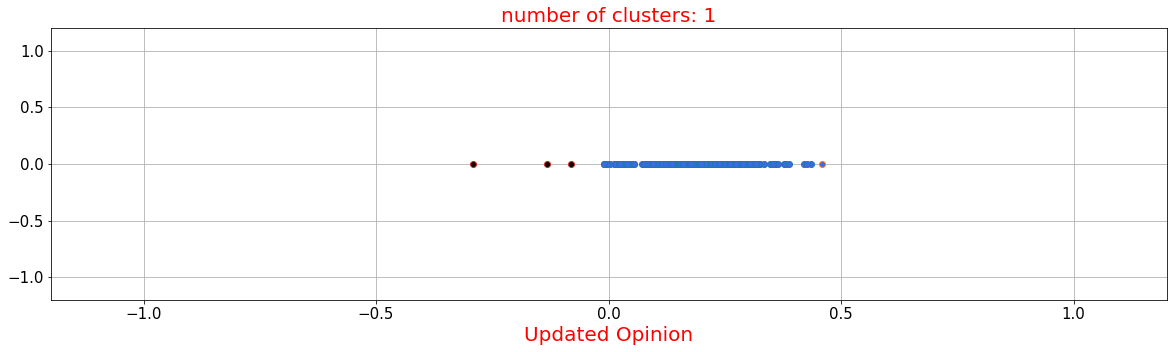

Silhouette Co-efficient: 0.760


percentage difference: 97.72727272727273 %
----------------------------------------------------------
484
iteration  2
scale of w2:  [ -0.061013453816536875 , 0.4179625477466196 ]


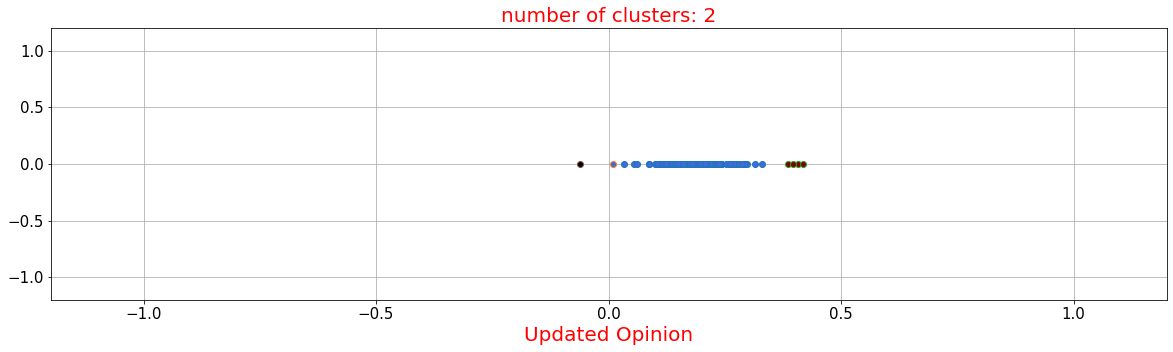

Silhouette Co-efficient: 0.790


percentage difference: 90.49586776859503 %
----------------------------------------------------------
484
iteration  3
scale of w2:  [ 0.03008437101990422 , 0.40750786346574897 ]


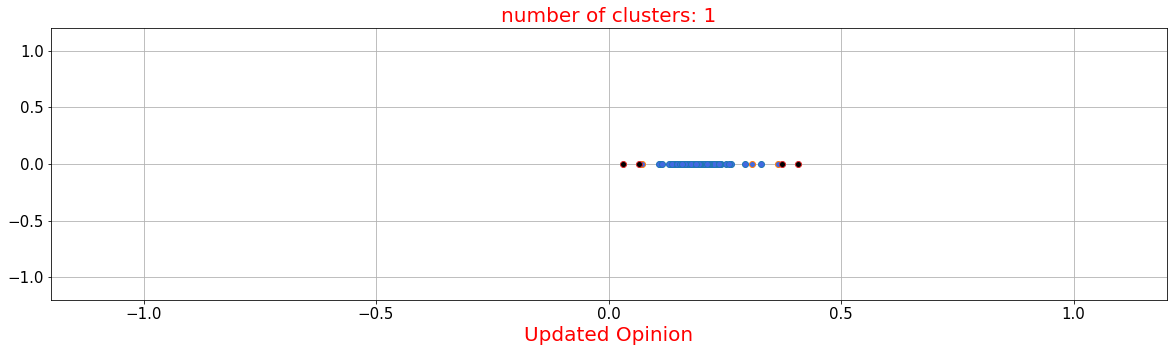

Silhouette Co-efficient: 0.851


percentage difference: 76.44628099173553 %
----------------------------------------------------------
484
iteration  4
scale of w2:  [ 0.060317463484548535 , 0.39735066355734755 ]


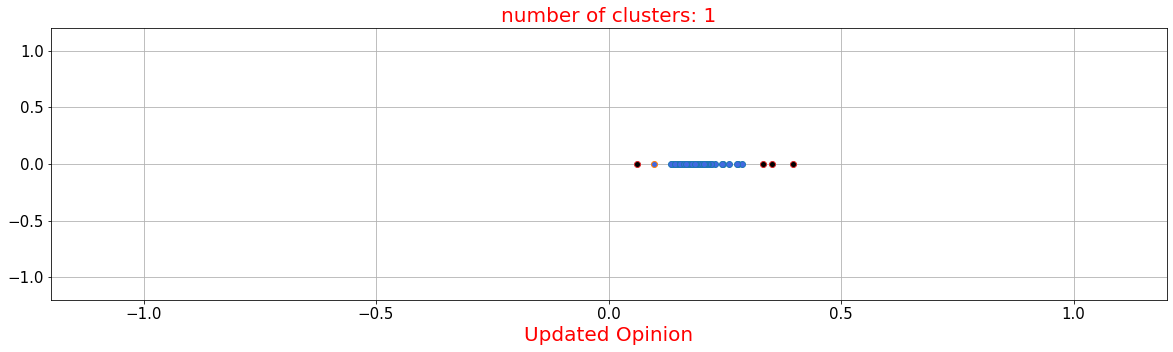

Silhouette Co-efficient: 0.893


percentage difference: 59.29752066115702 %
----------------------------------------------------------
484
iteration  5
scale of w2:  [ 0.0907864353860468 , 0.38721728259309185 ]


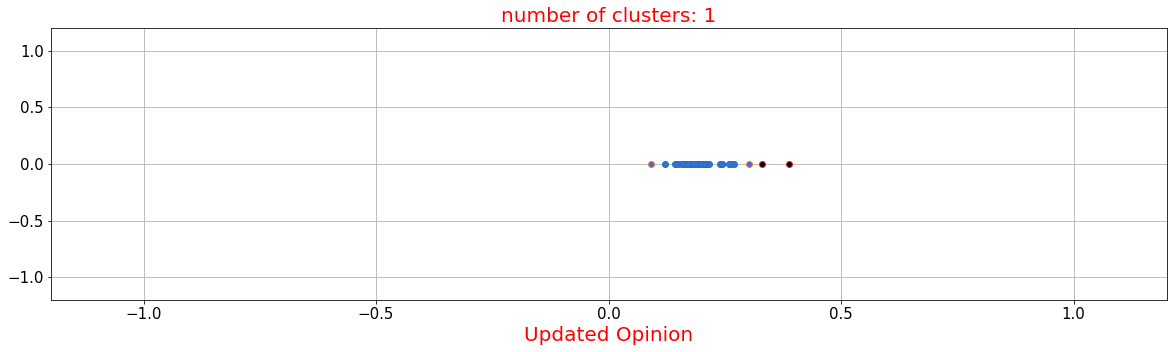

Silhouette Co-efficient: 0.925


percentage difference: 37.60330578512397 %
----------------------------------------------------------
484
iteration  6
scale of w2:  [ 0.11578101094373912 , 0.3773760297215465 ]


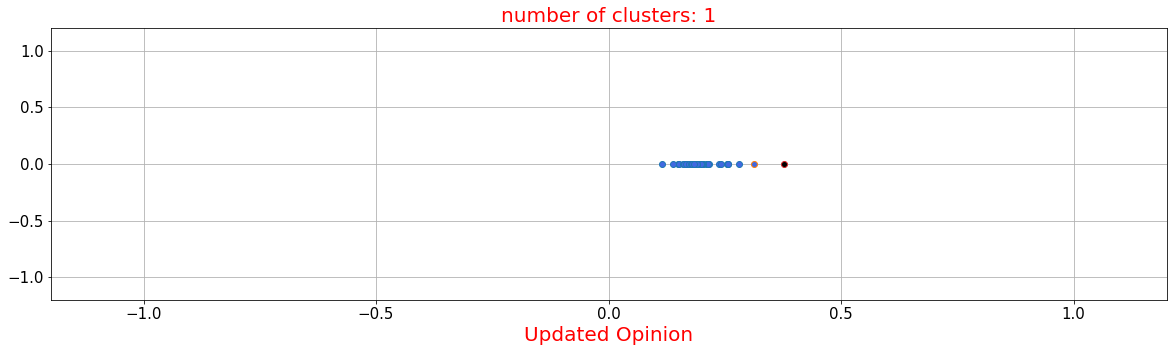

Silhouette Co-efficient: 0.944


percentage difference: 22.520661157024794 %
----------------------------------------------------------
484
iteration  7
scale of w2:  [ 0.1345113652831541 , 0.36790707656907 ]


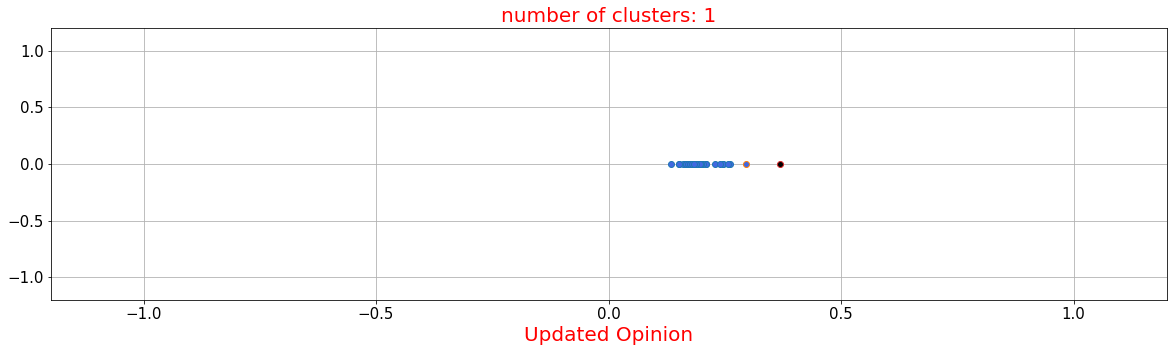

Silhouette Co-efficient: 0.953


percentage difference: 13.636363636363635 %
----------------------------------------------------------
484
iteration  8
scale of w2:  [ 0.14817945829707024 , 0.3588439995645627 ]


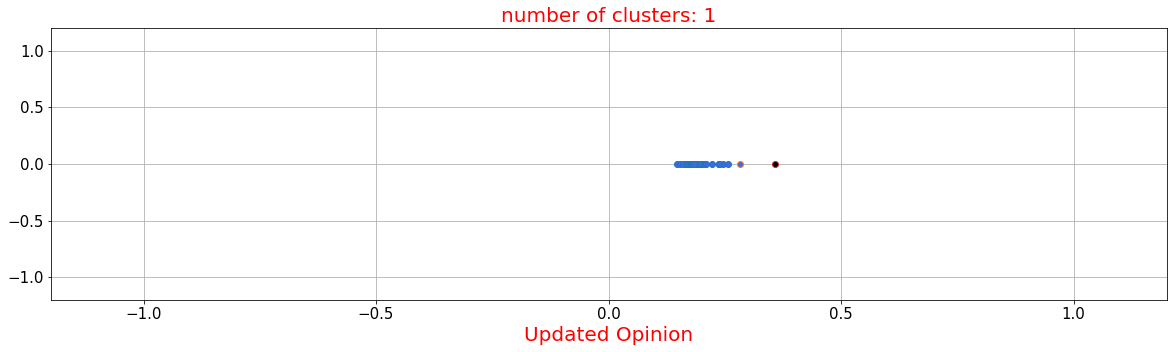

Silhouette Co-efficient: 0.958


percentage difference: 9.297520661157025 %
----------------------------------------------------------
484
iteration  9
scale of w2:  [ 0.15458928871690375 , 0.3502052412243694 ]


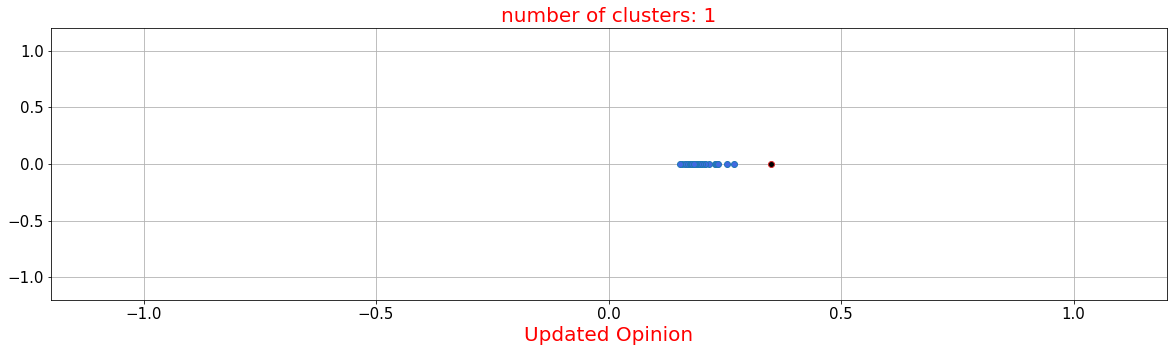

Silhouette Co-efficient: 0.962


percentage difference: 10.12396694214876 %
----------------------------------------------------------
484
iteration  10
scale of w2:  [ 0.15598912098624565 , 0.3419932035210755 ]


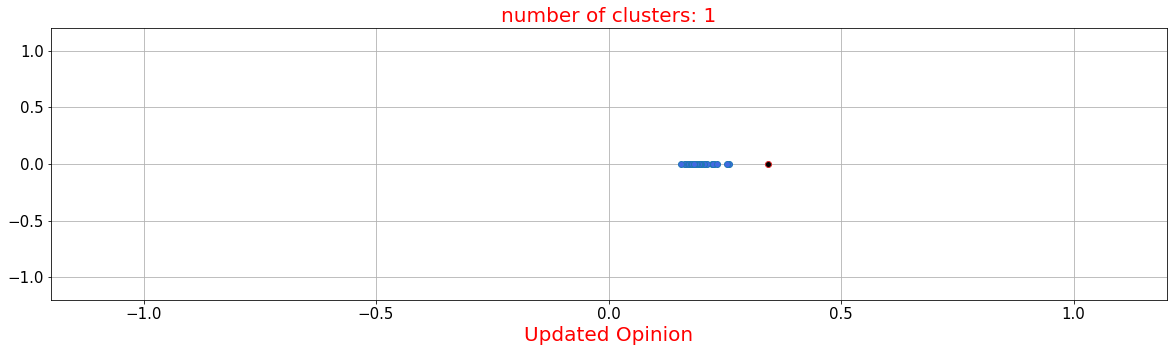

Silhouette Co-efficient: 0.965


percentage difference: 5.578512396694215 %
----------------------------------------------------------
484
iteration  11
scale of w2:  [ 0.15731461206163752 , 0.33419803996602787 ]


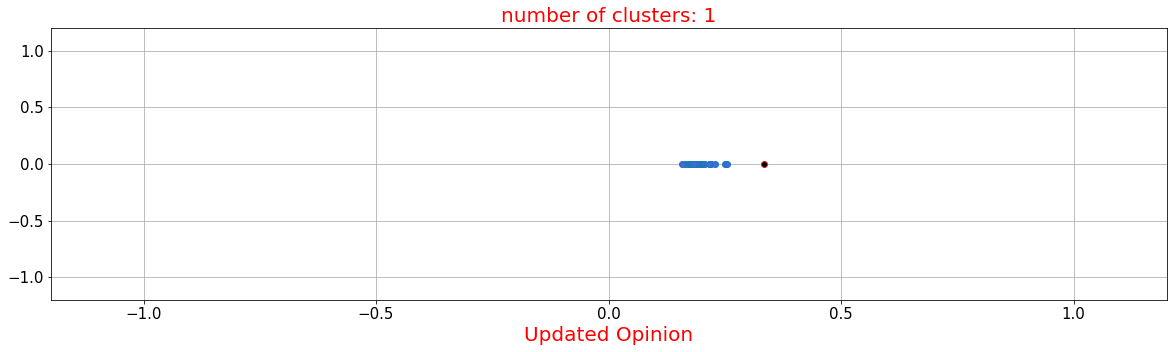

Silhouette Co-efficient: 0.967


percentage difference: 4.132231404958678 %
----------------------------------------------------------
484
iteration  12
scale of w2:  [ 0.1585748928446052 , 0.32680233034133344 ]


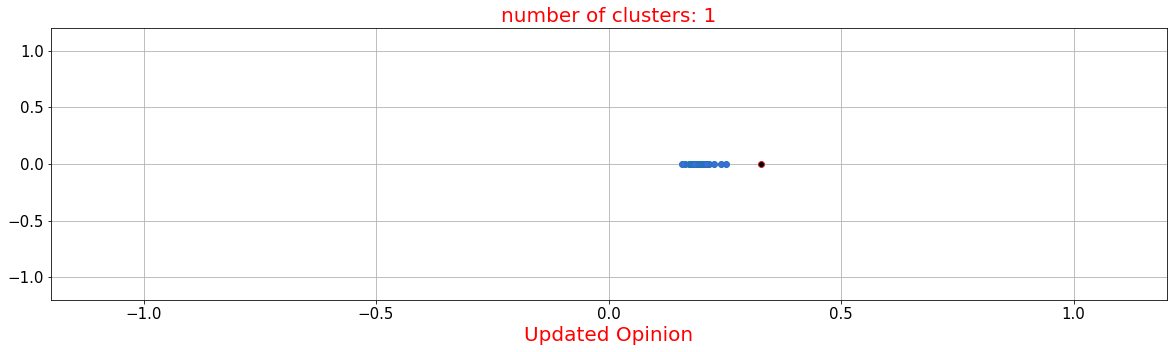

Silhouette Co-efficient: 0.969


percentage difference: 2.479338842975207 %
----------------------------------------------------------
484
iteration  13
scale of w2:  [ 0.15977602056442752 , 0.319785474819214 ]


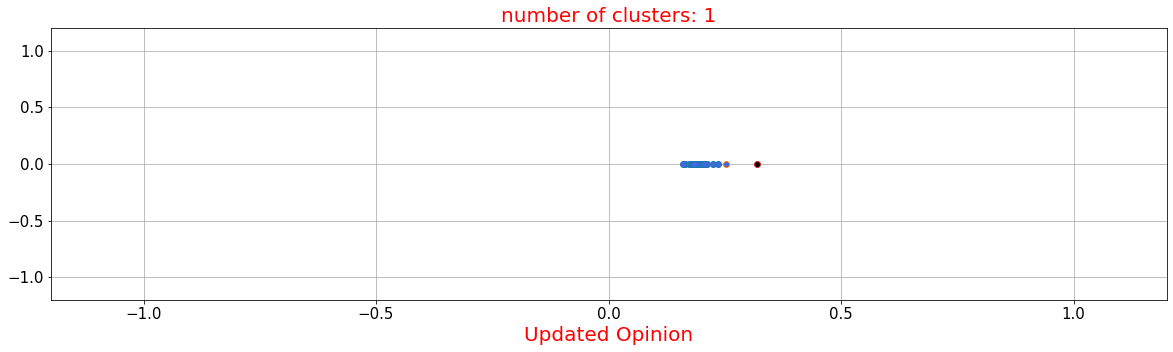

Silhouette Co-efficient: 0.970


percentage difference: 2.8925619834710745 %
----------------------------------------------------------
484
iteration  14
scale of w2:  [ 0.16092226221568004 , 0.31312651526048124 ]


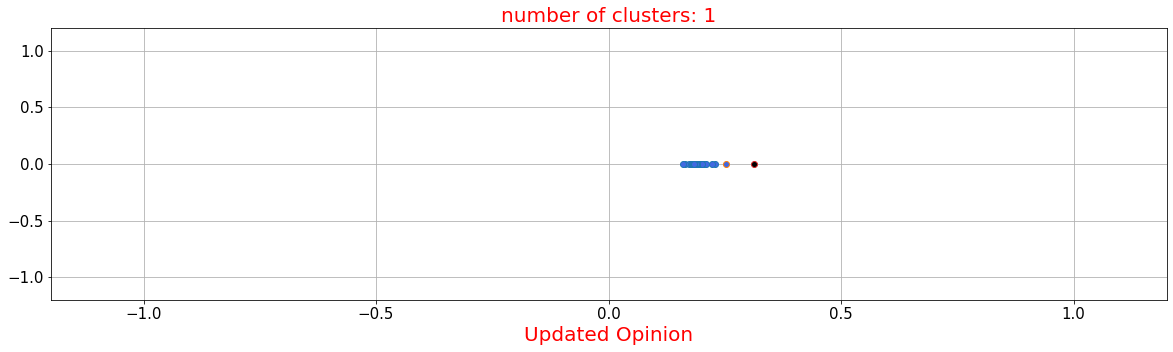

Silhouette Co-efficient: 0.971


percentage difference: 1.6528925619834711 %
----------------------------------------------------------
484
iteration  15
scale of w2:  [ 0.16201684479935968 , 0.3068054277574576 ]


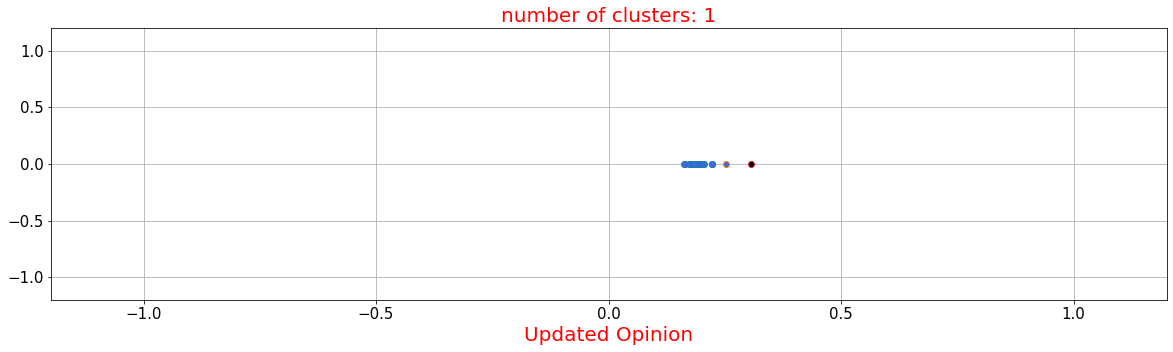

Silhouette Co-efficient: 0.972


percentage difference: 1.2396694214876034 %
----------------------------------------------------------
484
iteration  16
scale of w2:  [ 0.16306241729176402 , 0.30080352664820315 ]


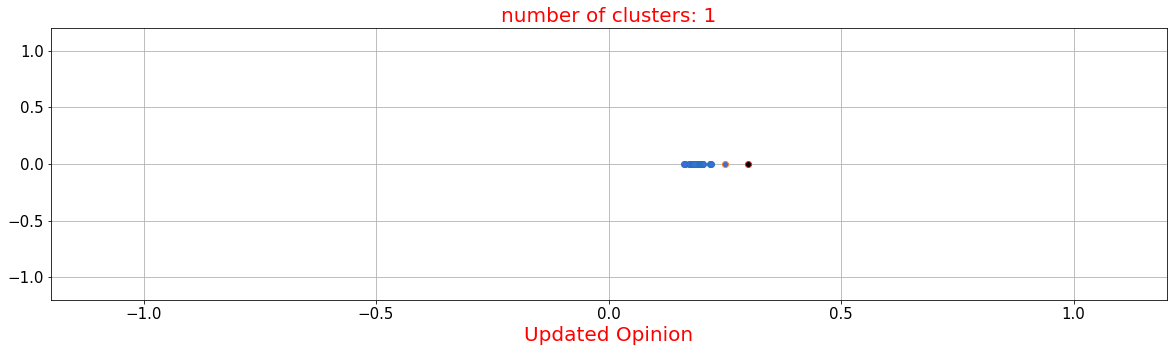

Silhouette Co-efficient: 0.973


percentage difference: 0.8264462809917356 %
----------------------------------------------------------


In [ ]:
# updated opinion in w2 
# Formula with Opinion Difference opinion(-1,1) convin(0,1) bias(0,1) DEGROOT
x=1
while(1):
   
    colmap = {1: 'r', 2: 'g', 3: 'b'}
    w2=[]
    for i in range (0,484):
        
        I=opinion[i];
        l=str(my_data['following'][i])
        l=l[1:-1]
        l=l.split(',')
        sumCp=0
        followerOpinion=0
        for j in range(len(l)):
          ind=int(l[j])
          
          cp=convin[ind]
          followerOpinion= followerOpinion + (cp * opinion[ind])
          sumCp = sumCp + cp

#         print(s)

        sumCp= sumCp + convin[i]
        followerOpinion=followerOpinion +(convin[i]* opinion[i])
        if(sumCp>0):
          followerOpinion= followerOpinion/sumCp
        else:
          followerOpinion=opinion[i]
        w2.append(followerOpinion)     
          
    lenw2=len(w2)
   

    #----------------------------------------------------------------------------------
  
    print("iteration ",x)
    x=x+1
    print("scale of w2: ","[" ,min(w2), "," , max(w2), "]")
    mn=[]
    for p in range(0,484):
        mn.append({'x':w2[p]})
        cluster = pd.DataFrame(mn,columns=['x'])
        cluster.head()
    dbscan(cluster,0.0375,4)
    
   
    #----------------------------------------------------------------------------------
    strf="{0:.2f}"
    cnt=0;
    for i in range(lenw2):      
      if( (strf.format(w2[i]))  !=  (strf.format(opinion[i]))   ):
        cnt=cnt+1

    cnt=(cnt/lenw2)*100
    print('\n')
    print("percentage difference:",cnt,"%")
    print("----------------------------------------------------------")
   
    
    if(cnt<1):
      break

    for i in range(len(w2)):
      opinion[i]=w2[i]
    print(len(opinion))